# Data


In [2]:
print("Dennis war hier")

Dennis war hier


##Installation

In [3]:
!pip install openml

##Packages

In [4]:
#Data
import openml

#Analyzis
import pandas as pd
import numpy as np
import math

#Machine learning
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

#Graphik
import matplotlib.pyplot as plt
import seaborn as sns

##Unpacking

In [5]:
dataset = openml.datasets.get_dataset(42742)

X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

df = pd.DataFrame(X)
df['target'] = y
X = pd.DataFrame(X)

C:\Users\Dennis\AppData\Local\Temp\ipykernel_14168\2563754152.py:1: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = openml.datasets.get_dataset(42742)


In [6]:
pd.set_option('display.max_columns',None)

    Values of -1 indicate that the feature was missing from the observation.
    target columns signifies whether or not a claim was filed for that policy holder.
    Ind is related to individual or driver
    reg is related to region
    car is related to car itself
    calc is an calculated feature

# Metadata

In [7]:
def categorize_column(col):
    if 'cat' in col:
        return 'categorical'
    elif df[col].nunique() == 2:
        return 'binary'
    elif col == 'target' or 'bin' in col:
        return 'binary'
    elif df[col].dtype == np.uint8:
        return 'continuous'
    elif df[col].dtype in [np.float64, np.int64]:
        return 'continuous'
    else:
        return 'other'

def feature_context(col):
    if 'ind' in col:
        return 'ind'
    elif 'reg' in col:
        return 'reg'
    elif 'car' in col:
        return 'car'
    elif 'calc' in col:
        return 'cal'
    elif col == 'target':
        return 'target'
    else:
        return 'other'

metadata = [(col, df[col].dtype, categorize_column(col), feature_context(col)) for col in df.columns]
metadata_df = pd.DataFrame(metadata, columns=['Feature Name', 'Data Type', 'Category', 'Context'])

In [8]:
metadata = [(col, df[col].dtype, categorize_column(col), feature_context(col), df[col].isna().any(), df[col].isna().sum()) for col in df.columns]
metadata_df = pd.DataFrame(metadata, columns=['Feature Name', 'Data Type', 'Category', 'Context', 'NAs', 'NAs_n'])


In [9]:
metadata = [(col, df[col].dtype, categorize_column(col), feature_context(col), df[col].isna().any(), df[col].isna().sum(), df[col].min(), df[col].max()) for col in df.columns]
metadata_df = pd.DataFrame(metadata, columns=['Feature Name', 'Data Type', 'Category', 'Context', 'NAs', 'NAs_n', 'Min', 'Max'])

In [10]:
categorical_cols = metadata_df[(metadata_df['Category'] == 'categorical') & (metadata_df['Feature Name'] != 'target')]['Feature Name'].tolist()
binary_cols = metadata_df[(metadata_df['Category'] == 'binary') & (metadata_df['Feature Name'] != 'target')]['Feature Name'].tolist()
continuous_cols = metadata_df[(metadata_df['Category'] == 'continuous') & (metadata_df['Feature Name'] != 'target')]['Feature Name'].tolist()

##**Variablen Feature Category**##

In [11]:
target_variable = 'target'
categorical_features = df[metadata_df[metadata_df['Data Type'] == 'category']['Feature Name']]
categorical_features = categorical_features.drop(columns=[target_variable], errors='ignore')
continuous_int_features  = df[list(metadata_df[(metadata_df['Category'] == 'continuous') & (metadata_df['Data Type'] == 'uint8')]['Feature Name'])]
continuous_float_features  = df[list(metadata_df[(metadata_df['Category'] == 'continuous') & (metadata_df['Data Type'] == 'float64')]['Feature Name'])]
continuous_columns = metadata_df[metadata_df['Category'] == 'continuous']['Feature Name']
categorical_features_with_nas = metadata_df[(metadata_df['Category'] == 'categorical') & (metadata_df['NAs'] == True)]
binary_cols = metadata_df[(metadata_df['Category'] == 'binary') & (metadata_df['Feature Name'] != 'target')]['Feature Name'].tolist()

# EDA I: Data Profiling

In [34]:
df.info()
# Dtype: uint8, float64, category
# missing values exists
# index starts at 2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   ps_ind_01       595212 non-null  uint8   
 1   ps_ind_02_cat   594996 non-null  category
 2   ps_ind_03       595212 non-null  uint8   
 3   ps_ind_04_cat   595129 non-null  category
 4   ps_ind_05_cat   589403 non-null  category
 5   ps_ind_06_bin   595212 non-null  category
 6   ps_ind_07_bin   595212 non-null  category
 7   ps_ind_08_bin   595212 non-null  category
 8   ps_ind_09_bin   595212 non-null  category
 9   ps_ind_10_bin   595212 non-null  category
 10  ps_ind_11_bin   595212 non-null  category
 11  ps_ind_12_bin   595212 non-null  category
 12  ps_ind_13_bin   595212 non-null  category
 13  ps_ind_14       595212 non-null  uint8   
 14  ps_ind_15       595212 non-null  uint8   
 15  ps_ind_16_bin   595212 non-null  category
 16  ps_ind_17_bin   595212 non-null  categ

In [35]:
X.describe(include='category')
# ps_ind_04_cat, ps_ind_05_cat ,ps_ind_06_cat top category 0
# ps_ind_07_bin, ps_ind_08_bin, ps_ind_09_bin, ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_17_bin, ps_ind_18_bin,
# ps_car_04_cat, ps_calc_15_bin, ps_calc_18_bin, ps_calc_19_bin, ps_calc_20_bin

ps_ind_02_cat ps_ind_04_cat ps_ind_05_cat ps_ind_06_bin ps_ind_07_bin  \
count         594996        595129        589403        595212        595212   
unique             4             2             7             2             2   
top                1             0             0             0             0   
freq          431859        346965        528009        360852        442223   

       ps_ind_08_bin ps_ind_09_bin ps_ind_10_bin ps_ind_11_bin ps_ind_12_bin  \
count         595212        595212        595212        595212        595212   
unique             2             2             2             2             2   
top                0             0             0             0             0   
freq          497644        484917        594990        594205        589594   

       ps_ind_13_bin ps_ind_16_bin ps_ind_17_bin ps_ind_18_bin ps_car_01_cat  \
count         595212        595212        595212        595212        595105   
unique             2             2             2             2            12   
top                0             1             0             0            11   
freq          594648        393330        523143        503879        207573   

       ps_car_02_cat ps_car_03_cat ps_car_04_cat ps_car_05_cat ps_car_06_cat  \
count         595207        183981        595212        328661        595212   
unique             2             2            10             2            18   
top                1             1             0             1            11   
freq          493990        110709        496581        172667        131527   

       ps_car_07_cat ps_car_08_cat ps_car_09_cat ps_car_10_cat ps_car_11_cat  \
count         583723        595212        594643        595212        595212   
unique             2             2             5             3           104   
top                1             1             2             1           104   
freq          553148        495264        353482        590179         85083   

       ps_calc_15_bin ps_calc_16_bin ps_calc_17_bin ps_calc_18_bin  \
count          595212         595212         595212         595212   
unique              2              2              2              2   
top                 0              1              1              0   
freq           522342         373698         329856         424278   

       ps_calc_19_bin ps_calc_20_bin  
count          595212         595212  
unique              2              2  
top                 0              0  
freq           387469         503955

In [36]:
X.describe()


ps_ind_01      ps_ind_03      ps_ind_14      ps_ind_15  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        1.900378       4.423318       0.012451       7.299922   
std         1.983789       2.699902       0.127545       3.546042   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       2.000000       0.000000       5.000000   
50%         1.000000       4.000000       0.000000       7.000000   
75%         3.000000       6.000000       0.000000      10.000000   
max         7.000000      11.000000       4.000000      13.000000   

           ps_reg_01      ps_reg_02      ps_reg_03      ps_car_11  \
count  595212.000000  595212.000000  487440.000000  595207.000000   
mean        0.610991       0.439184       0.894047       2.346100   
std         0.287643       0.404264       0.345413       0.832495   
min         0.000000       0.000000       0.061237       0.000000   
25%         0.400000       0.200000       0.633443       2.000000   
50%         0.700000       0.300000       0.801561       3.000000   
75%         0.900000       0.600000       1.083974       3.000000   
max         0.900000       1.800000       4.037945       3.000000   

           ps_car_12      ps_car_13      ps_car_14      ps_car_15  \
count  595211.000000  595212.000000  552592.000000  595212.000000   
mean        0.379947       0.813265       0.374691       3.065899   
std         0.058300       0.224588       0.045610       0.731366   
min         0.100000       0.250619       0.109545       0.000000   
25%         0.316228       0.670867       0.350428       2.828427   
50%         0.374166       0.765811       0.373497       3.316625   
75%         0.400000       0.906190       0.398121       3.605551   
max         1.264911       3.720626       0.636396       3.741657   

          ps_calc_01     ps_calc_02     ps_calc_03     ps_calc_04  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        0.449756       0.449589       0.449849       2.372081   
std         0.287198       0.286893       0.287153       1.117219   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.200000       0.200000       0.200000       2.000000   
50%         0.500000       0.400000       0.500000       2.000000   
75%         0.700000       0.700000       0.700000       3.000000   
max         0.900000       0.900000       0.900000       5.000000   

          ps_calc_05     ps_calc_06     ps_calc_07     ps_calc_08  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        1.885886       7.689445       3.005823       9.225904   
std         1.134927       1.334312       1.414564       1.459672   
min         0.000000       0.000000       0.000000       2.000000   
25%         1.000000       7.000000       2.000000       8.000000   
50%         2.000000       8.000000       3.000000       9.000000   
75%         3.000000       9.000000       4.000000      10.000000   
max         6.000000      10.000000       9.000000      12.000000   

          ps_calc_09     ps_calc_10     ps_calc_11     ps_calc_12  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        2.339034       8.433590       5.441382       1.441918   
std         1.246949       2.904597       2.332871       1.202963   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       6.000000       4.000000       1.000000   
50%         2.000000       8.000000       5.000000       1.000000   
75%         3.000000      10.000000       7.000000       2.000000   
max         7.000000      25.000000      19.000000      10.000000   

          ps_calc_13     ps_calc_14  
count  595212.000000  595212.000000  
mean        2.872288       7.539026  
std         1.694887       2.746652  
min         0.000000       0.000000  
25%         2.000000       6.000000  
50%         3.000000       7.000000  
75%         4

In [37]:
y.describe()

count     595212
unique         2
top            0
freq      573518
Name: target, dtype: object

##**Kategorien untersuchen**

In [38]:
print(metadata_df)

      Feature Name Data Type     Category Context    NAs   NAs_n       Min  \
0        ps_ind_01     uint8   continuous     ind  False       0         0   
1    ps_ind_02_cat  category  categorical     ind   True     216         1   
2        ps_ind_03     uint8   continuous     ind  False       0         0   
3    ps_ind_04_cat  category  categorical     ind   True      83         0   
4    ps_ind_05_cat  category  categorical     ind   True    5809         0   
5    ps_ind_06_bin  category       binary     ind  False       0         0   
6    ps_ind_07_bin  category       binary     ind  False       0         0   
7    ps_ind_08_bin  category       binary     ind  False       0         0   
8    ps_ind_09_bin  category       binary     ind  False       0         0   
9    ps_ind_10_bin  category       binary     ind  False       0         0   
10   ps_ind_11_bin  category       binary     ind  False       0         0   
11   ps_ind_12_bin  category       binary     ind  False       0

C:\Users\Dennis\AppData\Local\Temp\ipykernel_14220\16781526.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(category_counts.index, rotation=45)
C:\Users\Dennis\AppData\Local\Temp\ipykernel_14220\16781526.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(context_counts.index, rotation=45)


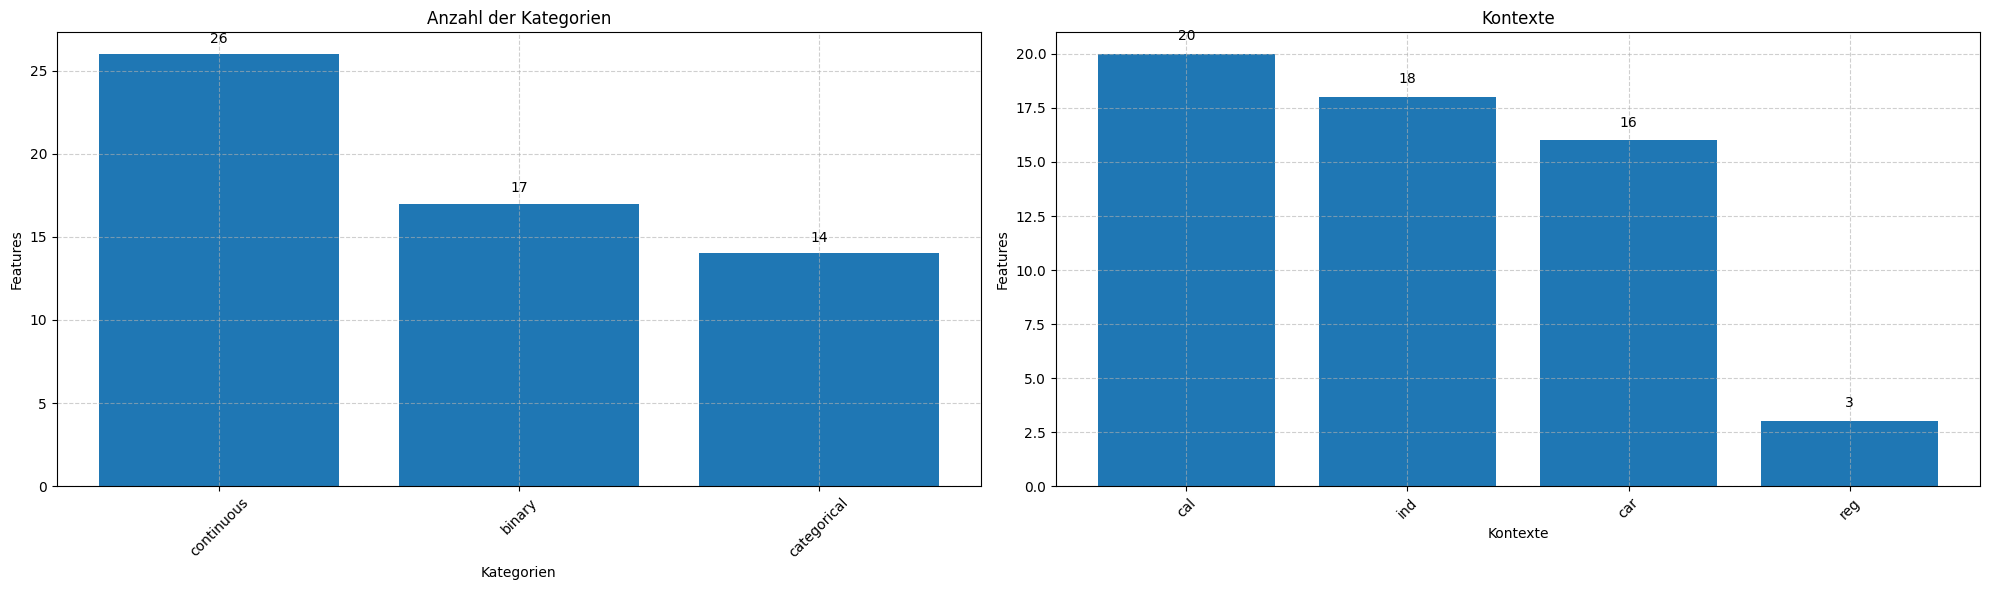

In [39]:
filtered_metadata_df = metadata_df[metadata_df['Feature Name'] != 'target']

category_counts = filtered_metadata_df['Category'].value_counts()
context_counts = filtered_metadata_df['Context'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

bars1 = ax1.bar(category_counts.index, category_counts.values)
ax1.set_title('Anzahl der Kategorien')
ax1.set_xlabel('Kategorien')
ax1.set_ylabel('Features')
ax1.set_xticklabels(category_counts.index, rotation=45)
ax1.grid(True, linestyle='--', alpha=0.6)

for bar in bars1:
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, str(int(bar.get_height())),
             ha='center', va='bottom')

bars2 = ax2.bar(context_counts.index, context_counts.values)
ax2.set_title('Kontexte')
ax2.set_xlabel('Kontexte')
ax2.set_ylabel('Features')
ax2.set_xticklabels(context_counts.index, rotation=45)
ax2.grid(True, linestyle='--', alpha=0.6)

for bar in bars2:
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, str(int(bar.get_height())),
             ha='center', va='bottom')

plt.tight_layout()

plt.show()


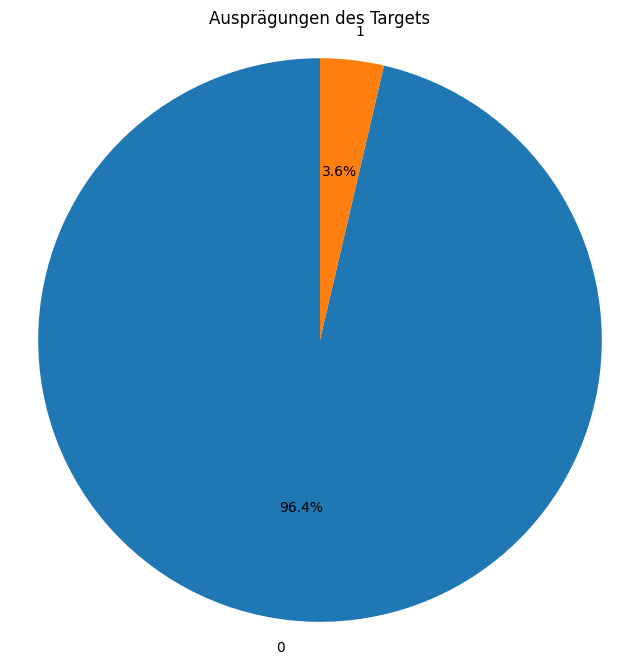

In [40]:
target_counts = df['target'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Ausprägungen des Targets')
plt.axis('equal')

plt.show()


No NAs in Target

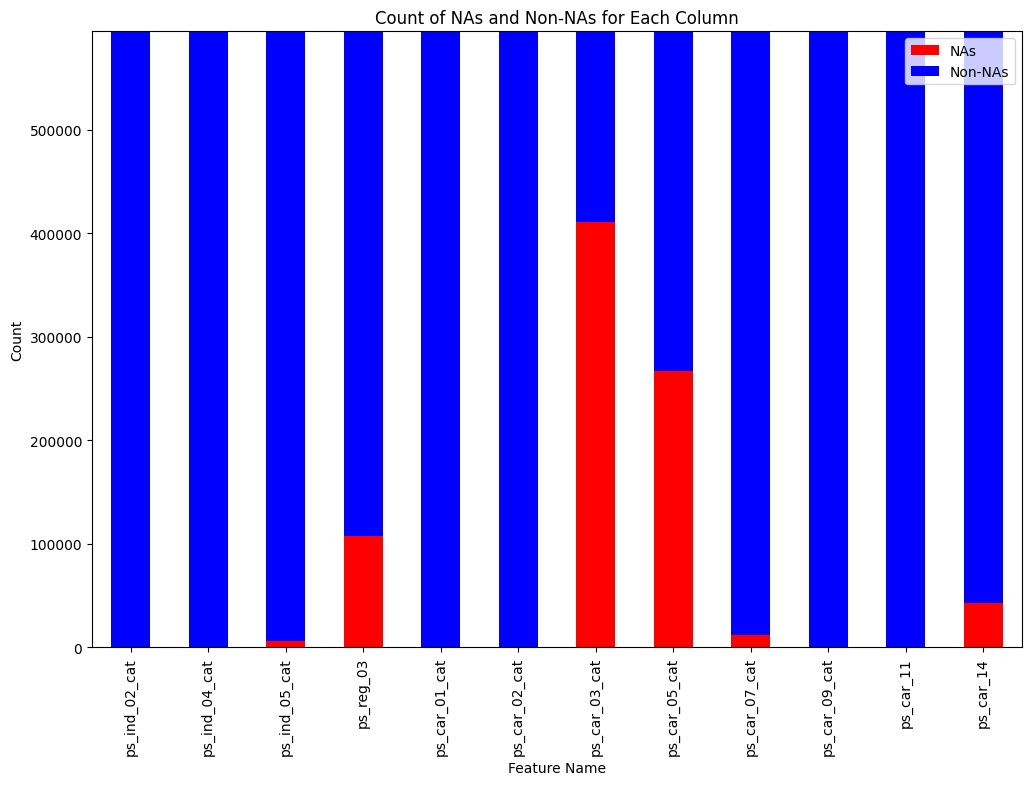

In [41]:
num_rows = len(df)
na_counts = metadata_df.set_index('Feature Name')['NAs_n']
na_counts_filtered = na_counts[na_counts>1]
non_na_counts = num_rows - na_counts_filtered

fig, ax = plt.subplots(figsize=(12, 8))

na_counts_filtered.plot(kind='bar', ax=ax, color='red', label='NAs')
non_na_counts.plot(kind='bar', ax=ax, color='blue', bottom=na_counts_filtered, label='Non-NAs')

ax.set_ylim(0, num_rows)
ax.set_ylabel('Count')
ax.set_title('Count of NAs and Non-NAs for Each Column')
ax.legend()
plt.show()

##**Duplicates**

In [42]:
metadata_df.columns

Index(['Feature Name', 'Data Type', 'Category', 'Context', 'NAs', 'NAs_n',
       'Min', 'Max'],
      dtype='object')

##Univariate Categorial

In [43]:
categorical_features = df[metadata_df[metadata_df['Data Type'] == 'category']['Feature Name']]


Visualization without NAs

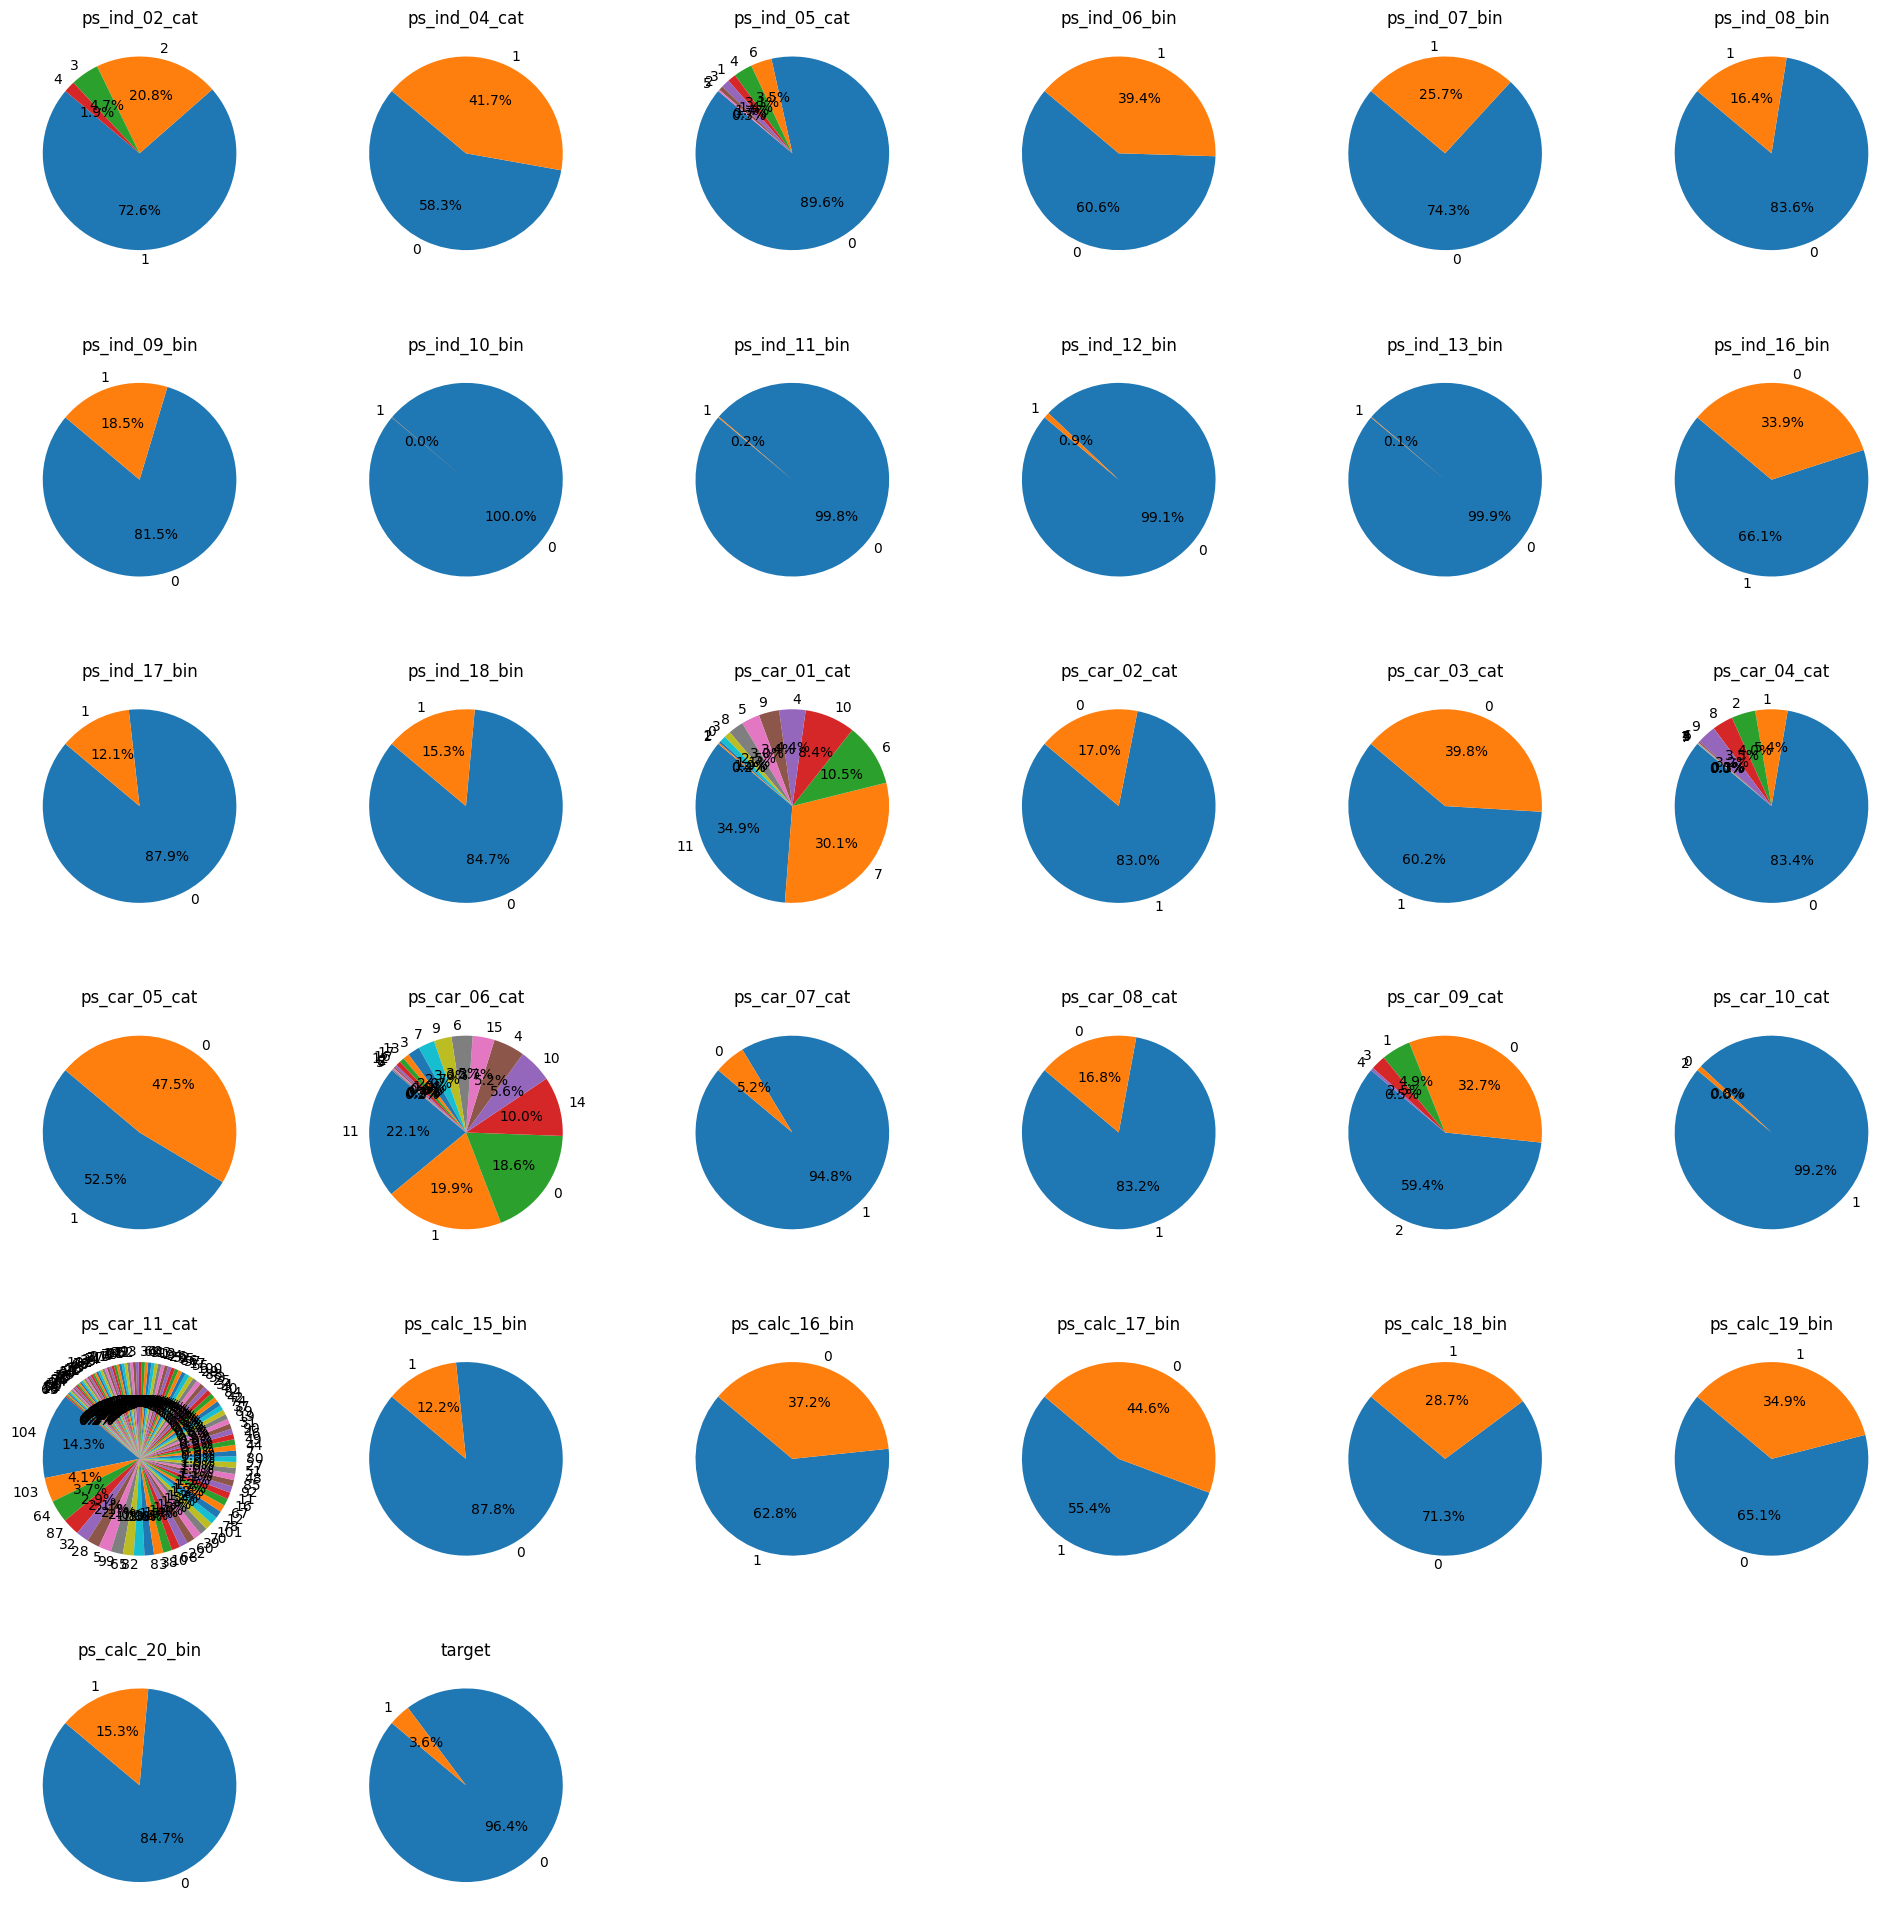

In [44]:
length_categorical = len(categorical_features.columns)

rows = 6
cols = 6

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 20))
fig.tight_layout(pad=3.0)
axes = axes.flatten()

for i, feature in enumerate(categorical_features.columns):
    counts = df[feature].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(feature)

for j in range(length_categorical, len(axes)):
    axes[j].axis('off')

plt.show()


In [45]:
categorical_features_with_nas_df = metadata_df[(metadata_df['NAs']==True) & (metadata_df['Data Type']=='category')]['Feature Name']
categorical_features_with_nas_df

1     ps_ind_02_cat
3     ps_ind_04_cat
4     ps_ind_05_cat
21    ps_car_01_cat
22    ps_car_02_cat
23    ps_car_03_cat
25    ps_car_05_cat
27    ps_car_07_cat
29    ps_car_09_cat
Name: Feature Name, dtype: object

**Visualization** with NAs

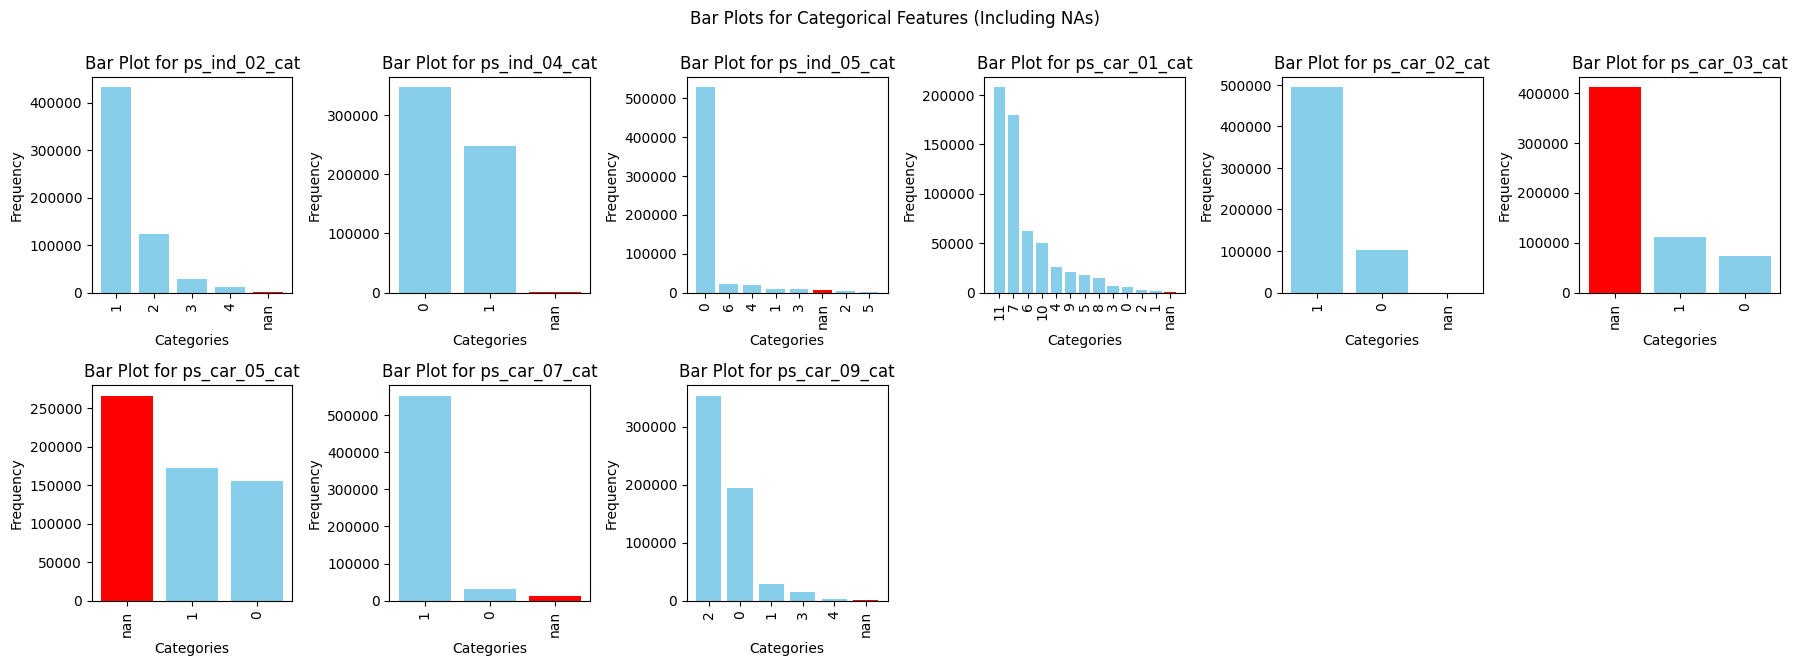

In [46]:
length_categorical_with_NAs = len(categorical_features_with_nas_df)
num_rows = 5
num_cols = 6

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 15))
axes = axes.flatten()

for idx, col in enumerate(categorical_features_with_nas_df):
    if idx < len(axes):
        data = df[col].value_counts(dropna=False)
        colors = ['skyblue' if not pd.isna(value) else 'red' for value in data.index]
        axes[idx].bar(data.index.astype(str), data.values, color=colors)
        axes[idx].set_title(f'Bar Plot for {col}')
        axes[idx].set_xlabel('Categories')
        axes[idx].set_ylabel('Frequency')
        axes[idx].tick_params(axis='x', rotation=90)


for ax in axes[length_categorical_with_NAs:]:
    ax.set_visible(False)

plt.tight_layout()
plt.suptitle('Bar Plots for Categorical Features (Including NAs)', y=1.02)
plt.show()

##Univariat Continous

In [47]:
continuous_int_features  = df[list(metadata_df[(metadata_df['Category'] == 'continuous') & (metadata_df['Data Type'] == 'uint8')]['Feature Name'])]
continuous_float_features  = df[list(metadata_df[(metadata_df['Category'] == 'continuous') & (metadata_df['Data Type'] == 'float64')]['Feature Name'])]

In [48]:
continuous_float_features.describe()

ps_reg_01      ps_reg_02      ps_reg_03      ps_car_11  \
count  595212.000000  595212.000000  487440.000000  595207.000000   
mean        0.610991       0.439184       0.894047       2.346100   
std         0.287643       0.404264       0.345413       0.832495   
min         0.000000       0.000000       0.061237       0.000000   
25%         0.400000       0.200000       0.633443       2.000000   
50%         0.700000       0.300000       0.801561       3.000000   
75%         0.900000       0.600000       1.083974       3.000000   
max         0.900000       1.800000       4.037945       3.000000   

           ps_car_12      ps_car_13      ps_car_14      ps_car_15  \
count  595211.000000  595212.000000  552592.000000  595212.000000   
mean        0.379947       0.813265       0.374691       3.065899   
std         0.058300       0.224588       0.045610       0.731366   
min         0.100000       0.250619       0.109545       0.000000   
25%         0.316228       0.670867       0.350428       2.828427   
50%         0.374166       0.765811       0.373497       3.316625   
75%         0.400000       0.906190       0.398121       3.605551   
max         1.264911       3.720626       0.636396       3.741657   

          ps_calc_01     ps_calc_02     ps_calc_03  
count  595212.000000  595212.000000  595212.000000  
mean        0.449756       0.449589       0.449849  
std         0.287198       0.286893       0.287153  
min         0.000000       0.000000       0.000000  
25%         0.200000       0.200000       0.200000  
50%         0.500000       0.400000       0.500000  
75%         0.700000       0.700000       0.700000  
max         0.900000       0.900000       0.900000

In [49]:
continuous_int_features.describe()

ps_ind_01      ps_ind_03      ps_ind_14      ps_ind_15  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        1.900378       4.423318       0.012451       7.299922   
std         1.983789       2.699902       0.127545       3.546042   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       2.000000       0.000000       5.000000   
50%         1.000000       4.000000       0.000000       7.000000   
75%         3.000000       6.000000       0.000000      10.000000   
max         7.000000      11.000000       4.000000      13.000000   

          ps_calc_04     ps_calc_05     ps_calc_06     ps_calc_07  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        2.372081       1.885886       7.689445       3.005823   
std         1.117219       1.134927       1.334312       1.414564   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.000000       1.000000       7.000000       2.000000   
50%         2.000000       2.000000       8.000000       3.000000   
75%         3.000000       3.000000       9.000000       4.000000   
max         5.000000       6.000000      10.000000       9.000000   

          ps_calc_08     ps_calc_09     ps_calc_10     ps_calc_11  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        9.225904       2.339034       8.433590       5.441382   
std         1.459672       1.246949       2.904597       2.332871   
min         2.000000       0.000000       0.000000       0.000000   
25%         8.000000       1.000000       6.000000       4.000000   
50%         9.000000       2.000000       8.000000       5.000000   
75%        10.000000       3.000000      10.000000       7.000000   
max        12.000000       7.000000      25.000000      19.000000   

          ps_calc_12     ps_calc_13     ps_calc_14  
count  595212.000000  595212.000000  595212.000000  
mean        1.441918       2.872288       7.539026  
std         1.202963       1.694887       2.746652  
min         0.000000       0.000000       0.000000  
25%         1.000000       2.000000       6.000000  
50%         1.000000       3.000000       7.000000  
75%         2.000000       4.000000       9.000000  
max        10.000000      13.000000      23.000000

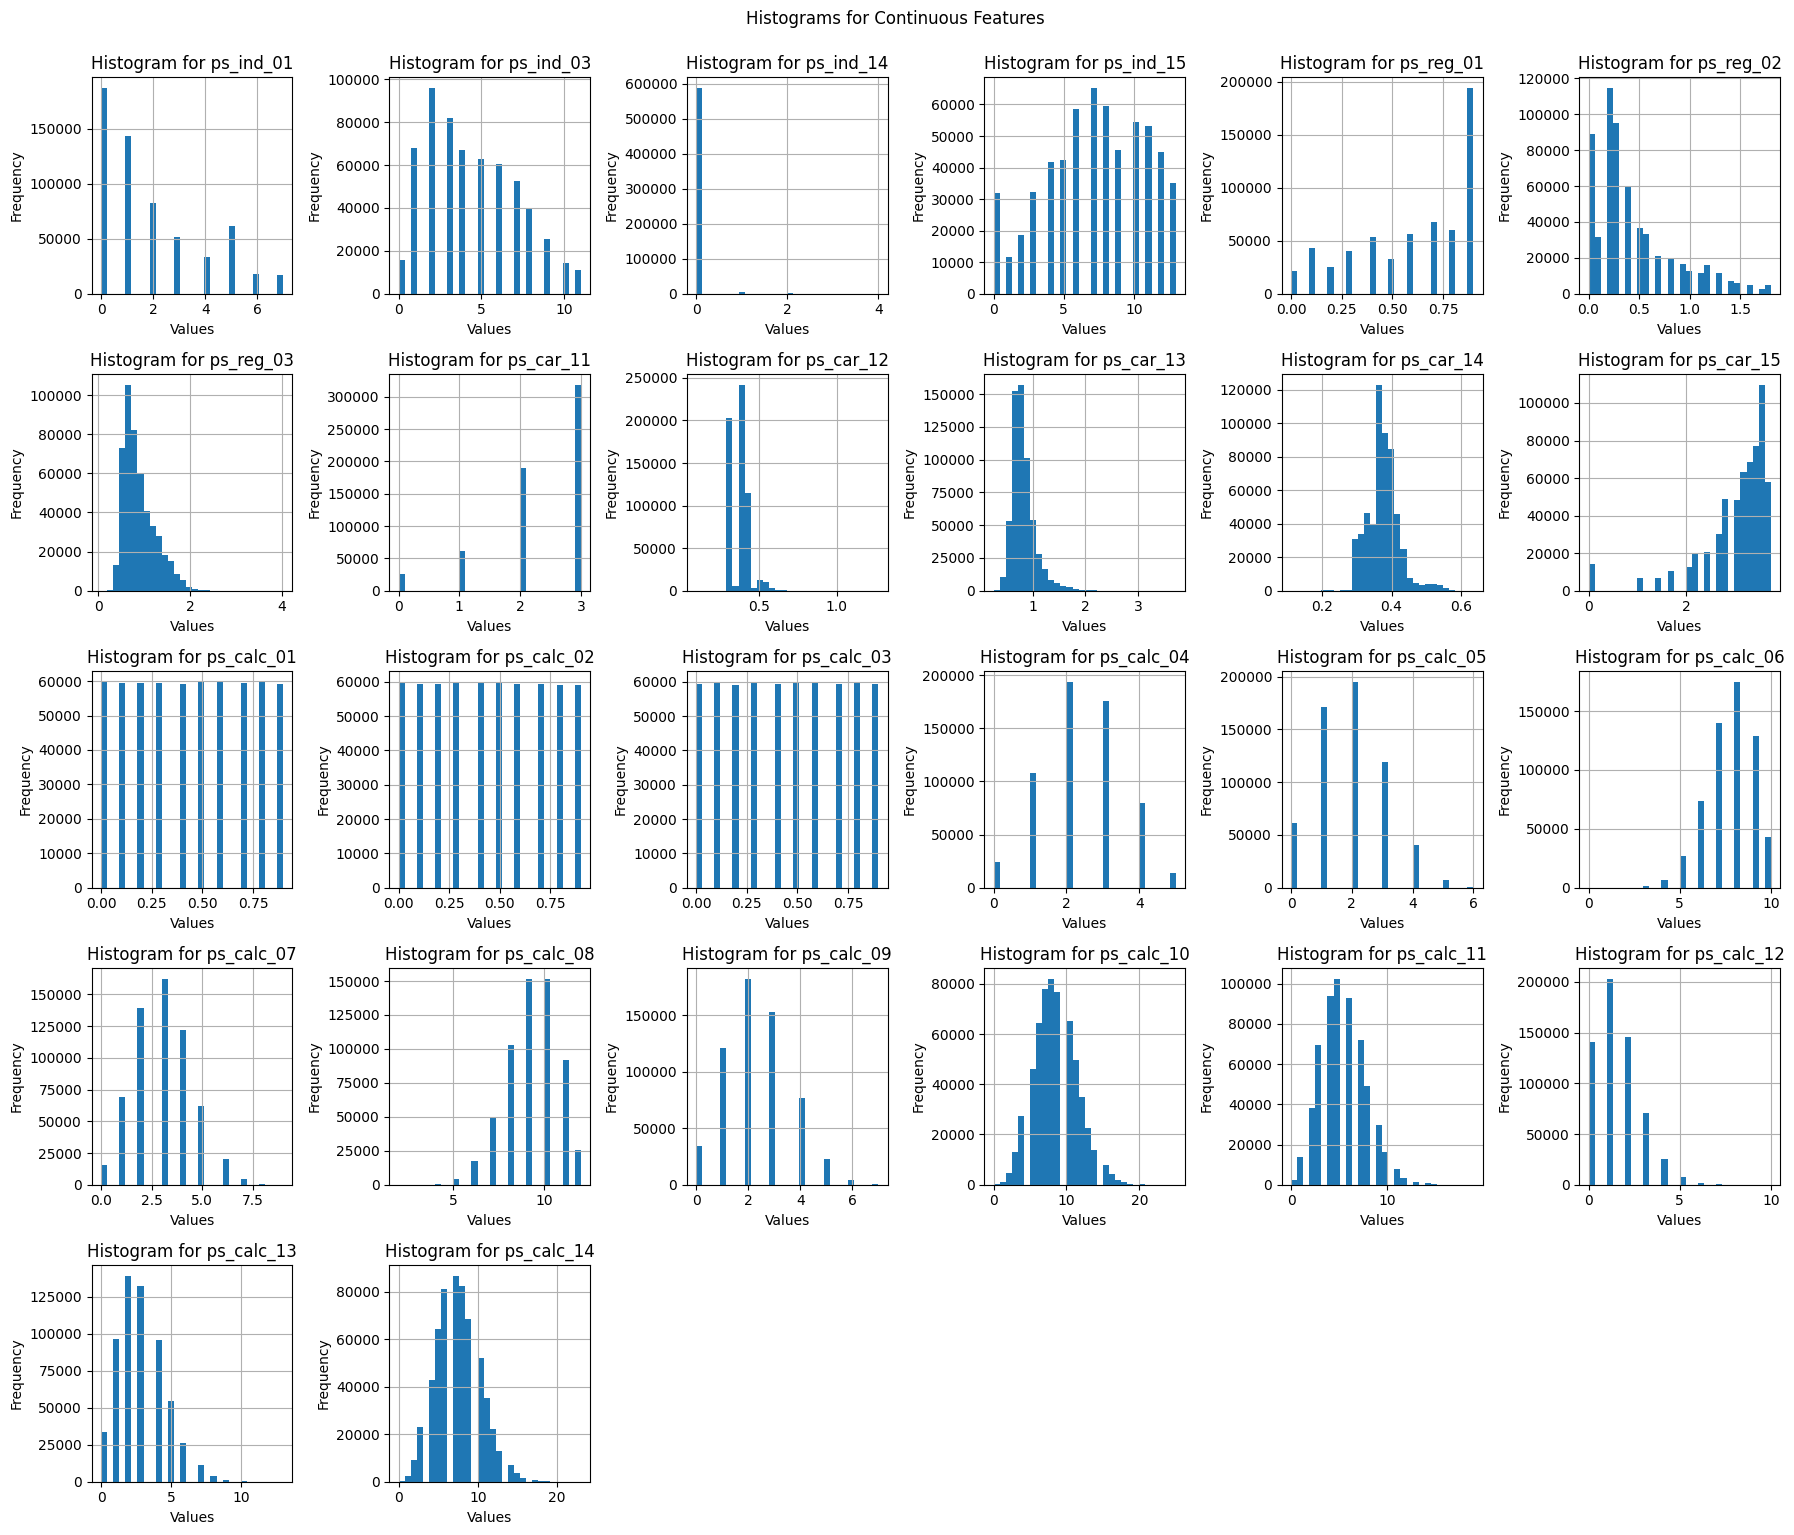

In [50]:
continuous_columns = metadata_df[metadata_df['Category'] == 'continuous']['Feature Name']


num_plots = len(continuous_columns)
num_rows = 5
num_cols = 6

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 15))
axes = axes.flatten()

for idx, col in enumerate(continuous_columns):
    if idx < len(axes):
        df[col].hist(bins=30, ax=axes[idx])
        axes[idx].set_title(f'Histogram for {col}')
        axes[idx].set_xlabel('Values')
        axes[idx].set_ylabel('Frequency')

for ax in axes[num_plots:]:
    ax.set_visible(False)

plt.tight_layout()
plt.suptitle('Histograms for Continuous Features', y=1.02)
plt.show()

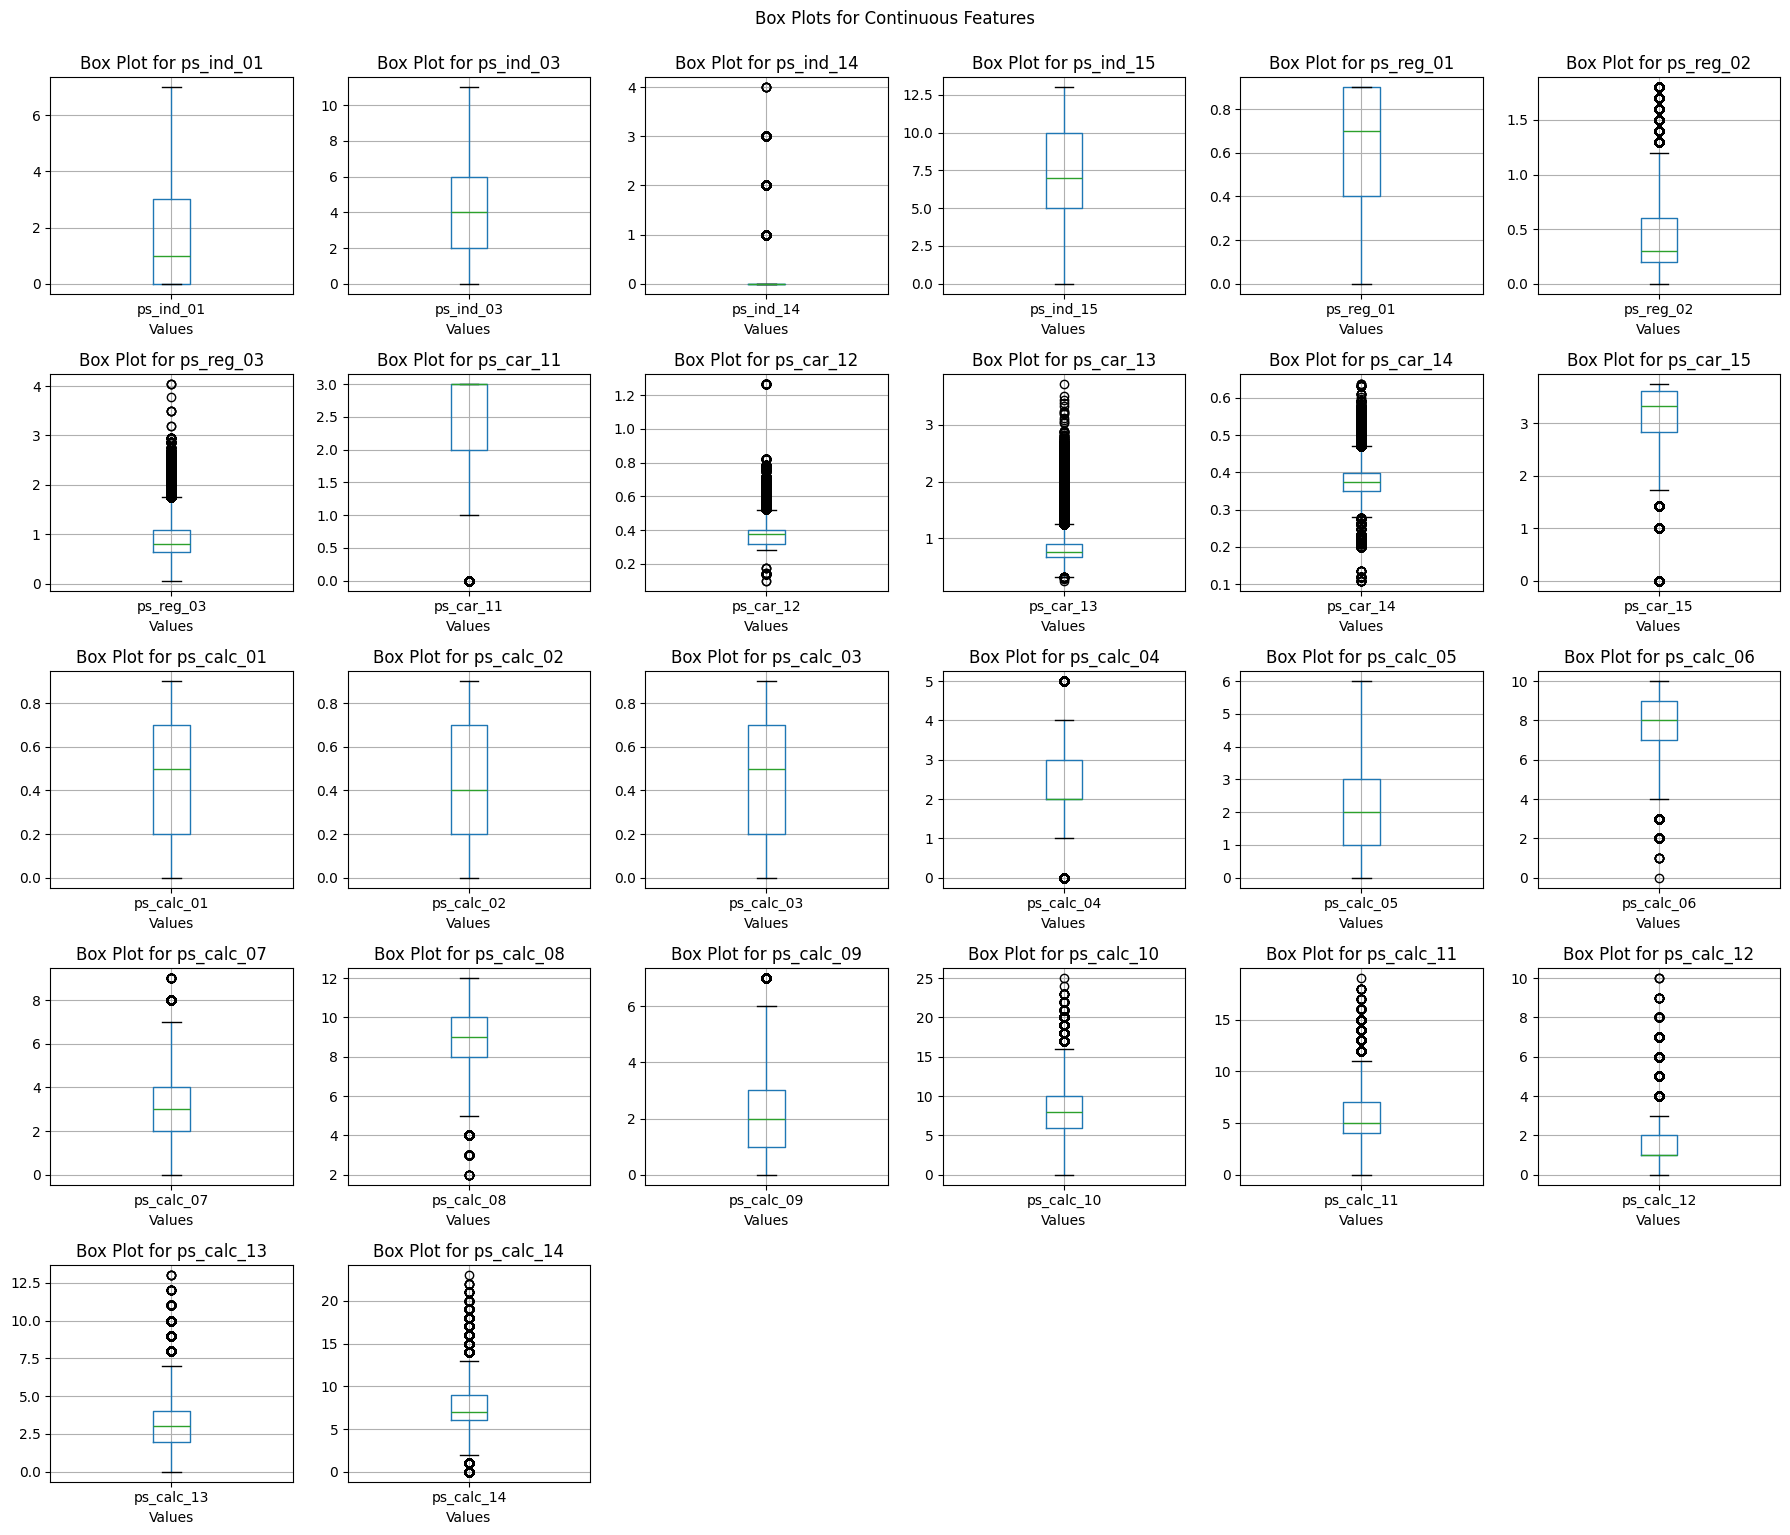

In [51]:
continuous_columns = metadata_df[metadata_df['Category'] == 'continuous']['Feature Name']

num_plots = len(continuous_columns)
num_rows = 5
num_cols = 6

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 15))
axes = axes.flatten()

for idx, col in enumerate(continuous_columns):
    if idx < len(axes):
        df.boxplot(column=col, ax=axes[idx])
        axes[idx].set_title(f'Box Plot for {col}')
        axes[idx].set_xlabel('Values')

for ax in axes[num_plots:]:
    ax.set_visible(False)

plt.tight_layout()
plt.suptitle('Box Plots for Continuous Features', y=1.02)
plt.show()

# Splitting

In [12]:
from sklearn.model_selection import train_test_split

random_state = 42

# 70 - 30 with stratify
train_df, temp_df = train_test_split(df, test_size=0.30, stratify=df['target'], random_state=42)
X_train = train_df

# 15 - 15 with stratify
val_df, test_df = train_test_split(temp_df, test_size=0.50, stratify=temp_df['target'], random_state=42)

X_train = train_df.drop(columns=['target'])
y_train = train_df['target']

X_val = val_df.drop(columns=['target'])
y_val = val_df['target']

X_test = test_df.drop(columns=['target'])
y_test = test_df['target']

train_target_dist = train_df['target'].value_counts(normalize=True)
val_target_dist = val_df['target'].value_counts(normalize=True)
test_target_dist = test_df['target'].value_counts(normalize=True)

print("Train target distribution:\n", train_target_dist)
print("Validation target distribution:\n", val_target_dist)
print("Test target distribution:\n", test_target_dist)


Train target distribution:
 target
0    0.963552
1    0.036448
Name: proportion, dtype: float64
Validation target distribution:
 target
0    0.963554
1    0.036446
Name: proportion, dtype: float64
Test target distribution:
 target
0    0.963554
1    0.036446
Name: proportion, dtype: float64


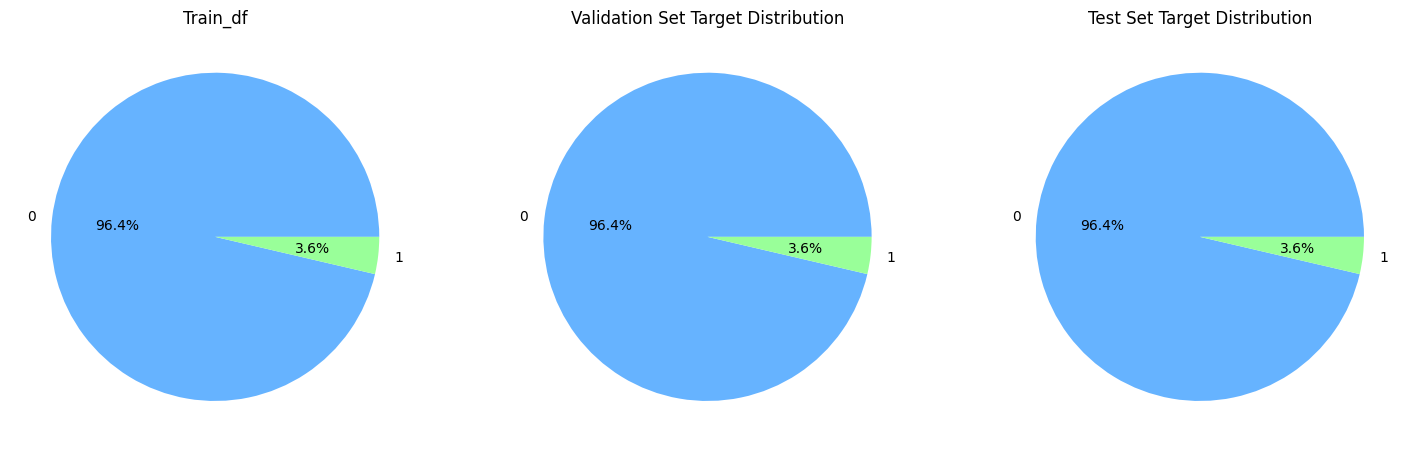

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].pie(train_target_dist, labels=train_target_dist.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ffcc99'])
axs[0].set_title('Train_df')

axs[1].pie(val_target_dist, labels=val_target_dist.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ffcc99'])
axs[1].set_title('Validation Set Target Distribution')

axs[2].pie(test_target_dist, labels=test_target_dist.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ffcc99'])
axs[2].set_title('Test Set Target Distribution')

plt.show()

# Ausreißer einfügen
# orginal als X_train_orginal
# Ausreißer als X_train

Überprüfen der Verteilungen der Features in Trainings-, Validierungs- und Testdatensatz

# EDA II

## Kategoriale Features zusammenfassen

In [118]:
categorical_features_above_10 = []

for col in categorical_features.columns:
    unique_values_count = df[col].nunique()

    if unique_values_count > 10:
        categorical_features_above_10.append(col)
        categorical_features_above_10.append(unique_values_count)


print("Kategorische Features mit mehr als 10 verschiedenen Ausprägungen:")
print(categorical_features_above_10)


Kategorische Features mit mehr als 10 verschiedenen Ausprägungen:
['ps_car_01_cat', 12, 'ps_car_06_cat', 18, 'ps_car_11_cat', 104]


ps_car_11_cat
104    85083
103    24262
64     22278
87     17106
32     12578
       ...  
58      1464
81      1433
56      1272
18      1233
63      1103
Name: count, Length: 104, dtype: int64

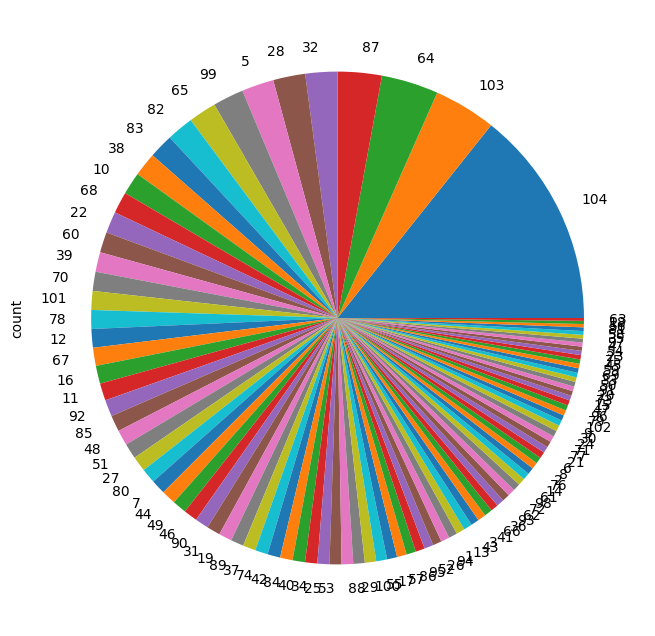

In [119]:
df['ps_car_11_cat'].value_counts().plot.pie(figsize=(8, 8))
df['ps_car_11_cat'].value_counts()

Hyperparmeter Suche bester Schwellenwert

In [42]:
from sklearn.metrics import roc_auc_score
import numpy as np

# Liste der Schwellenwerte, die getestet werden sollen
threshold_values = np.arange(0.015, 0.02, 0.001)  
best_roc_auc = 0
best_threshold = None

# Loop über verschiedene Schwellenwerte
for relative_threshold in threshold_values:
    print(f"Testing threshold: {relative_threshold}")
    
    # Kopien der ursprünglichen Datensätze erstellen
    X_train_categorical = X_train.copy()
    X_val_categorical = X_val.copy()

    # Zähle die Kategorien in den Trainingsdaten
    train_category_counts = X_train_categorical['ps_car_11_cat'].value_counts()

    # Berechne den Schwellenwert für seltene Kategorien im Trainingsdatensatz
    train_threshold_count = relative_threshold * len(X_train_categorical)

    # Identifiziere seltene Kategorien im Trainingsdatensatz
    train_rare_categories = train_category_counts[train_category_counts < train_threshold_count].index

    # Ersetze die ursprüngliche Spalte 'ps_car_11_cat' durch die aggregierte Version im Trainings- und Validierungsdatensatz
    X_train_categorical['ps_car_11_cat'] = X_train_categorical['ps_car_11_cat'].apply(
        lambda x: 'Other' if x in train_rare_categories else x
    )

    X_val_categorical['ps_car_11_cat'] = X_val_categorical['ps_car_11_cat'].apply(
        lambda x: 'Other' if x in train_rare_categories else x  # Gleiche seltene Kategorien wie im Training verwenden
    )

    # Trainiere das Modell
    pipeline_RF_2.fit(X_train_categorical, y_train)

    # Vorhersagen für die Validierungsdaten treffen
    y_pred_RF = pipeline_RF_2.predict(X_val_categorical)
    y_prob_RF = pipeline_RF_2.predict_proba(X_val_categorical)[:, 1]

    # Berechne die ROC AUC für die aktuelle Konfiguration
    roc_auc_RF = roc_auc_score(y_val, y_prob_RF)
    print(f"ROC AUC for threshold {relative_threshold}: {roc_auc_RF}")

    # Speichere die beste Konfiguration
    if roc_auc_RF > best_roc_auc:
        best_roc_auc = roc_auc_RF
        best_threshold = relative_threshold

# Beste Ergebnisse ausgeben
print(f"\nBest threshold: {best_threshold} with ROC AUC: {best_roc_auc}")


Testing threshold: 0.015
ROC AUC for threshold 0.015: 0.63006211596636
Testing threshold: 0.016
ROC AUC for threshold 0.016: 0.6307295992222655
Testing threshold: 0.017
ROC AUC for threshold 0.017: 0.6307295992222655
Testing threshold: 0.018000000000000002


## Splitting

Continuous Features überprüfen: Mann-Whitney-u

In [ ]:
import seaborn as sns

for col in X_train.select_dtypes(include=["float64", "uint8"]).columns:
    plt.figure(figsize=(4, 2))
    sns.kdeplot(X_train[col], label='Training')
    sns.kdeplot(X_val[col], label='Validation')
    sns.kdeplot(X_test[col], label='Test')
    plt.title(f'Verteilung von {col}')
    plt.legend()
    plt.show()

In [ ]:
# Überprüfen der Continuous Features

import pandas as pd
from scipy.stats import mannwhitneyu

results_train_val = []
results_train_test = []

for col in X_train.select_dtypes(include=["float64","uint8"]).columns:
    u_stat_train_val, p_value_train_val = mannwhitneyu(X_train[col], X_val[col], alternative='two-sided')
    u_stat_train_test, p_value_train_test = mannwhitneyu(X_train[col], X_test[col], alternative='two-sided')
    results_train_val.append((col, p_value_train_val))
    results_train_test.append((col, p_value_train_test))

df_results = pd.DataFrame({
    "Feature": [col for col, _ in results_train_val],
    "p-Wert (Train vs Validation)": [p_val for _, p_val in results_train_val],
    "p-Wert (Train vs Test)": [p_val for _, p_val in results_train_test]
})

print(df_results)


In [ ]:
p_val_signifikant = []
p_test_signifikant = []


for col, p_val in results_train_val:
    if p_val < 0.05:
        p_val_signifikant.append([col,p_val])
for col, p_test in results_train_test:
    if p_test < 0.05:
        p_test_signifikant.append([col,p_test])

if p_val_signifikant == []:
    print("Keine signifikanten Abweichungen zwischen Trainings- und Validierungsdaten.")
else:
    print(f"Folgende Features müssen überprüft werden zwischen Trainings- und Validierungsdaten: {p_val_signifikant}")

if p_test_signifikant == []:
    print("Keine signifikanten Abweichungen zwischen Trainings- und Testdaten.")
else:
    print(f"Folgende Features müssen überprüft werden zwischen Trainings- und Testdaten: {p_test_signifikant}")

if p_val_signifikant == [] and p_test_signifikant == []:
    print("Erfolgreich überprüft!")

Kategoriale Features überprüfen

In [ ]:
# DataFrame zur Speicherung der relativen Häufigkeiten
relative_freq_train_val = []
relative_freq_train_test = []
problematic_columns = []

# Vergleich der relativen Häufigkeiten für jede kategoriale Variable
for col in X_train.select_dtypes(include=["object", "category"]).columns:
    freq_train = X_train[col].value_counts(normalize=True)
    freq_val = X_val[col].value_counts(normalize=True)
    freq_test = X_test[col].value_counts(normalize=True)

    # Zusammenführen der Frequenzen in einem DataFrame
    combined = pd.DataFrame({
        'Train': freq_train,
        'Validation': freq_val,
        'Test': freq_test
    }).fillna(0)

    # Berechnen der absoluten Unterschiede
    diff_val = (combined['Train'] - combined['Validation']).abs().sum()
    diff_test = (combined['Train'] - combined['Test']).abs().sum()

    # Ergebnisse speichern
    relative_freq_train_val.append((col, diff_val))
    relative_freq_train_test.append((col, diff_test))

    # Überprüfung, ob der Unterschied größer als 0,1 ist
    if diff_val > 0.1 or diff_test > 0.1:
        problematic_columns.append(col)

# Erstellen des DataFrames für die Ergebnisse
df_relative_freq = pd.DataFrame({
    "Feature": [col for col, _ in relative_freq_train_val],
    "Absoluter Unterschied (Train vs Validation)": [diff for _, diff in relative_freq_train_val],
    "Absoluter Unterschied (Train vs Test)": [diff for _, diff in relative_freq_train_test]
})

# Ausgabe des DataFrames
print(df_relative_freq)

# Ausgabe der Spalten mit Problemen
if problematic_columns:
    print("\nDie folgenden Spalten haben einen Unterschied größer als 0,1:")
    for col in problematic_columns:
        print(col)
else:
    print("\nAlle Unterschiede sind kleiner oder gleich 0.1.")


In [ ]:
# Anzahl der getesteten numerischen Spalten (floats,uints)
num_floats_tested = len(X_train.select_dtypes(include=["float64","uint8"]).columns)

# Anzahl der getesteten kategorialen Spalten
num_categorical_tested = len(X_train.select_dtypes(include=["object", "category"]).columns)

# Berechnung der Gesamtsumme der getesteten Spalten
total_columns_tested = num_floats_tested + num_categorical_tested

# Gesamtanzahl der Spalten im Datensatz X
total_columns_X = X_train.shape[1]

# Ausgabe der Anzahl der getesteten Spalten, der Gesamtsumme und Vergleich mit Gesamtanzahl
print(f"Anzahl der getesteten numerischen Spalten: {num_floats_tested}")
print(f"Anzahl der getesteten kategorialen Spalten: {num_categorical_tested}")
print(f"Gesamtanzahl der getesteten Spalten: {total_columns_tested}")
print(f"Gesamtanzahl der Spalten im Datensatz: {total_columns_X}")

# Überprüfung, ob alle Spalten getestet wurden
if total_columns_tested == total_columns_X:
    print("Alle Spalten wurden getestet.")
else:
    print("Nicht alle Spalten wurden getestet.")

## Duplicates

In [ ]:
duplicates = X_train.duplicated()
num_duplicates = duplicates.sum()
num_duplicates

##**NA Imputation**

Categorical Features:

    Last Observation Carried Forward (LOCF): Forward filling
    Next Observation Carried Backward (NOCB): Backward filling

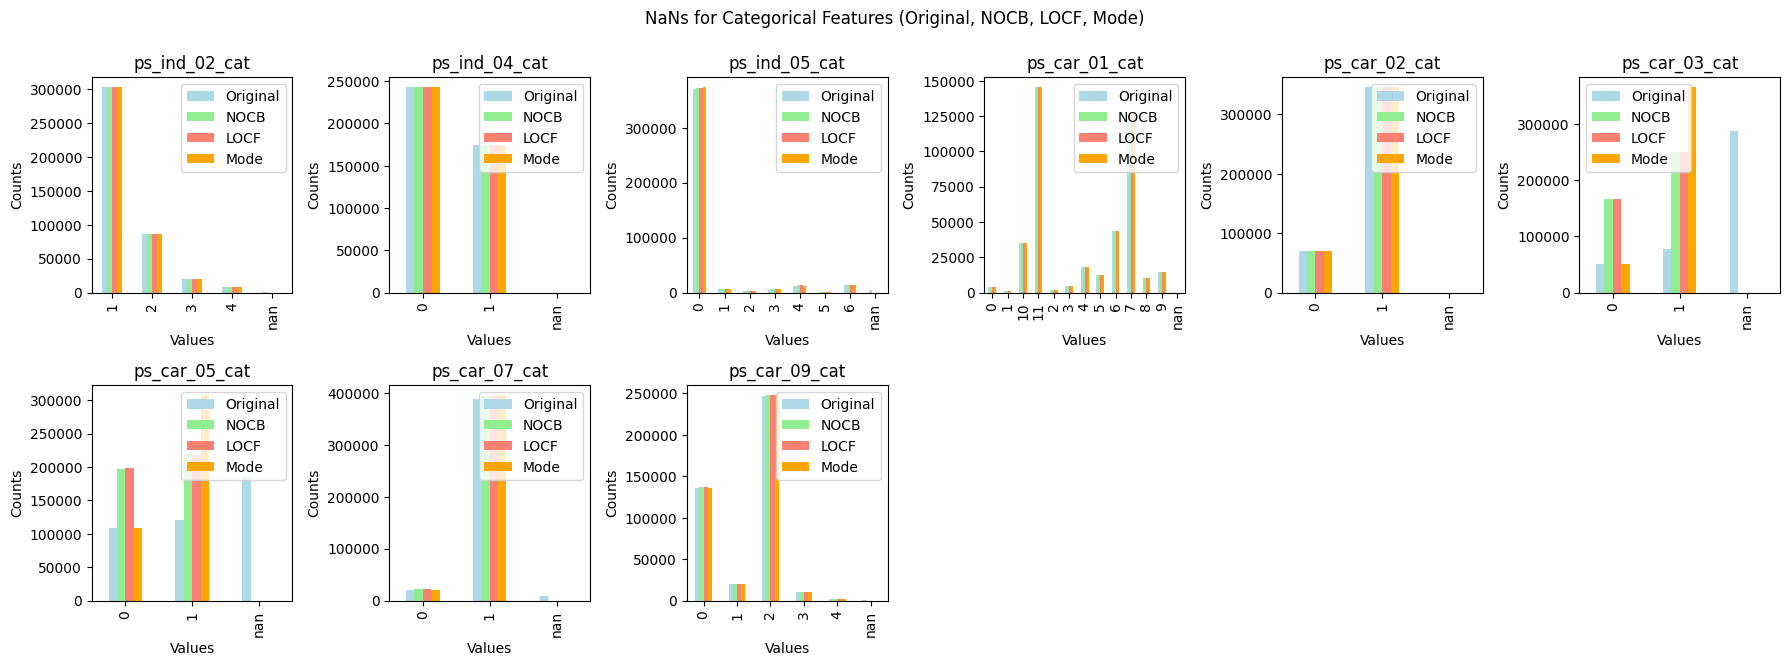

In [ ]:
# Filter mithilfe von Metadaten
categorical_features_with_nas = metadata_df[
    (metadata_df['Category'] == 'categorical') &
    (metadata_df['NAs'] == True)
]['Feature Name'].tolist()

num_plots = len(categorical_features_with_nas)
num_rows = 5
num_cols = 6

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 15))
axes = axes.flatten()

for idx, feature in enumerate(categorical_features_with_nas):
    if idx < len(axes):
        X_train[feature] = X_train[feature].astype(str).replace('nan', np.nan)

        X_train = X_train.assign(
            original=X_train[feature],
            nocb=X_train[feature].bfill(),
            locf=X_train[feature].ffill(),
            mode=X_train[feature].fillna(X_train[feature].mode()[0])
        )

        counts_original = X_train['original'].value_counts(dropna=False).sort_index()
        counts_nocb = X_train['nocb'].value_counts(dropna=False).sort_index()
        counts_locf = X_train['locf'].value_counts(dropna=False).sort_index()
        counts_mode = X_train['mode'].value_counts(dropna=False).sort_index()

        counts = pd.DataFrame({
            'Original': counts_original,
            'NOCB': counts_nocb,
            'LOCF': counts_locf,
            'Mode': counts_mode
        }).fillna(0)

        counts.plot(kind='bar', ax=axes[idx], color=['lightblue', 'lightgreen', 'salmon', 'orange'])
        axes[idx].set_title(f'{feature}')
        axes[idx].set_xlabel('Values')
        axes[idx].set_ylabel('Counts')

for ax in axes[num_plots:]:
    ax.set_visible(False)

plt.tight_layout()
plt.suptitle('NaNs for Categorical Features (Original, NOCB, LOCF, Mode)', y=1.02)
plt.show()

==> Ist das überhaupt Sinvoll? müssen es dann im Pipeline prüfen

Continous Features:

    Last Observation Carried Forward (LOCF): Forward filling
    Next Observation Carried Backward (NOCB): Backward filling
    Linear interpolation
    Spline interpolation

In [ ]:
metadata_df[(metadata_df['NAs']==True) & (metadata_df['Category']=='continuous')]

Feature Name Data Type    Category Context   NAs   NAs_n       Min  \
20    ps_reg_03   float64  continuous     reg  True  107772  0.061237   
32    ps_car_11   float64  continuous     car  True       5       0.0   
33    ps_car_12   float64  continuous     car  True       1       0.1   
35    ps_car_14   float64  continuous     car  True   42620  0.109545   

         Max  
20  4.037945  
32       3.0  
33  1.264911  
35  0.636396

ps_reg_03

In [ ]:
X_train['ps_reg_03'].isna().sum()

75462

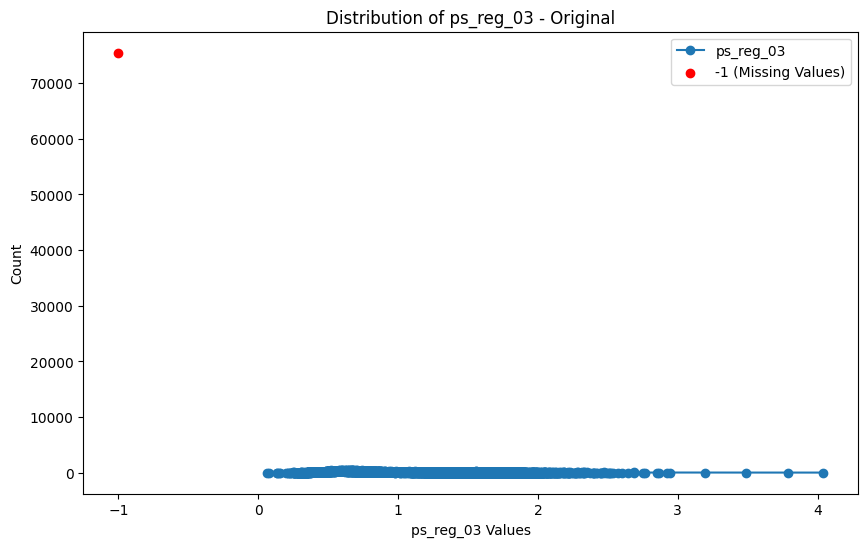

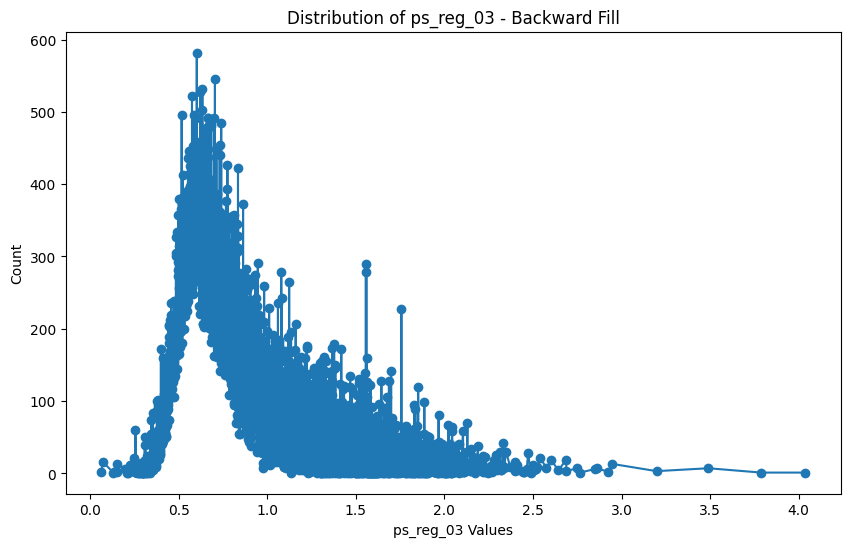

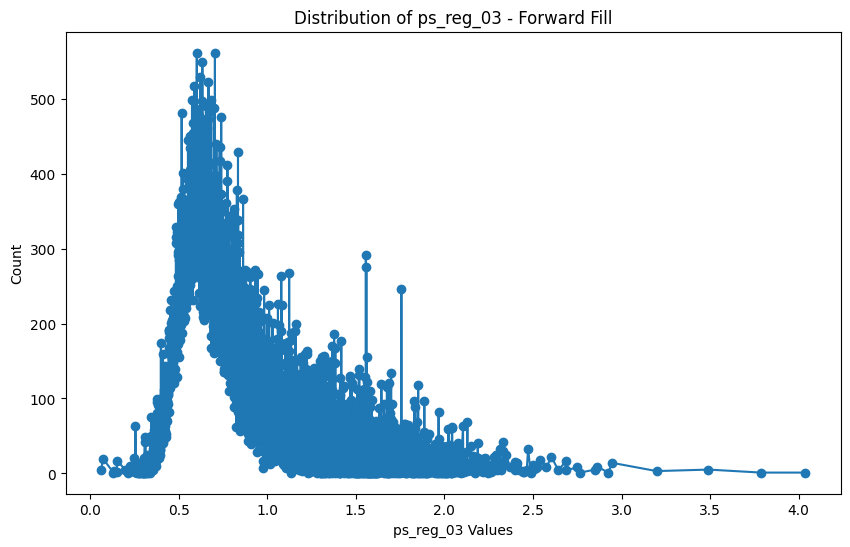

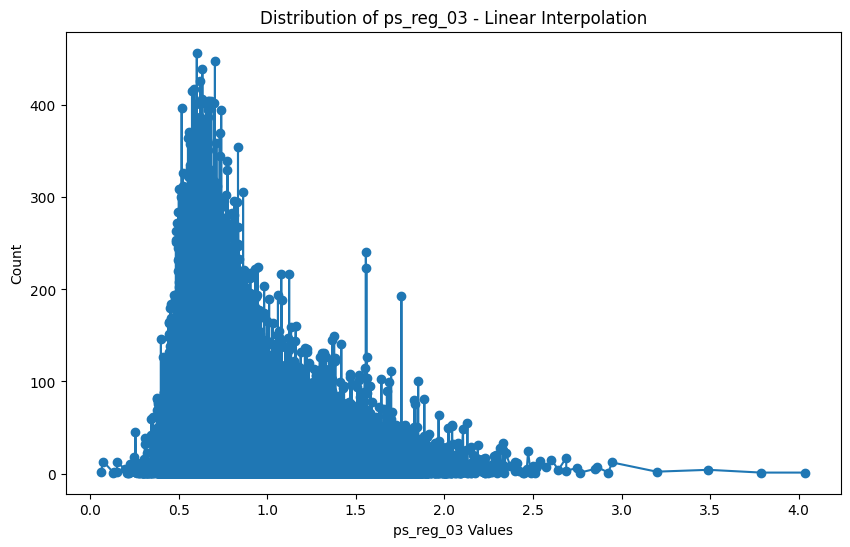

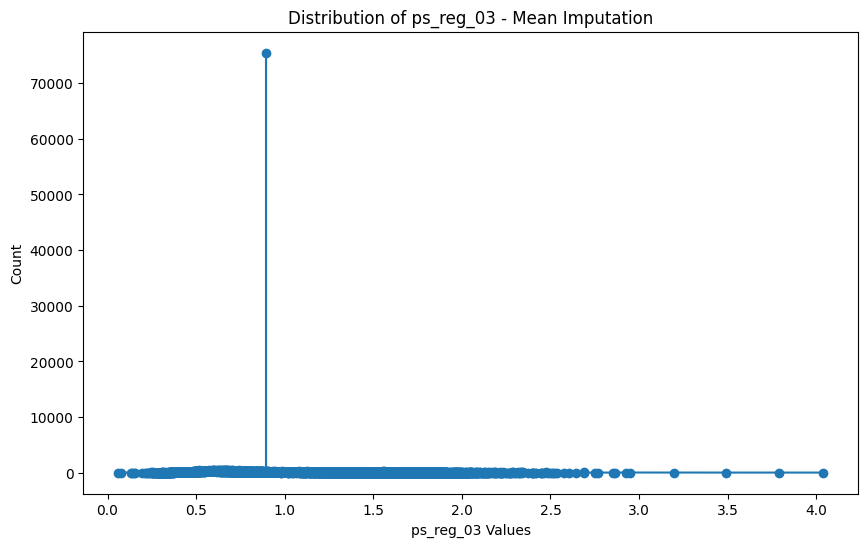

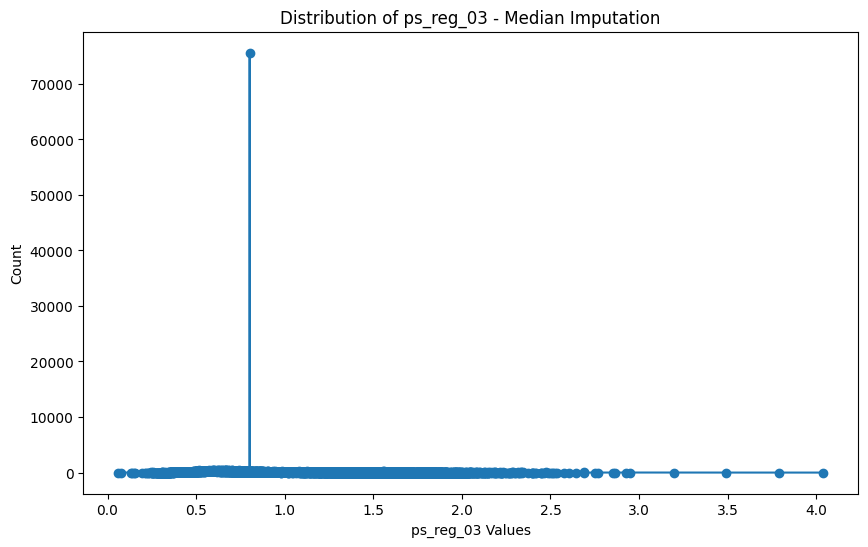

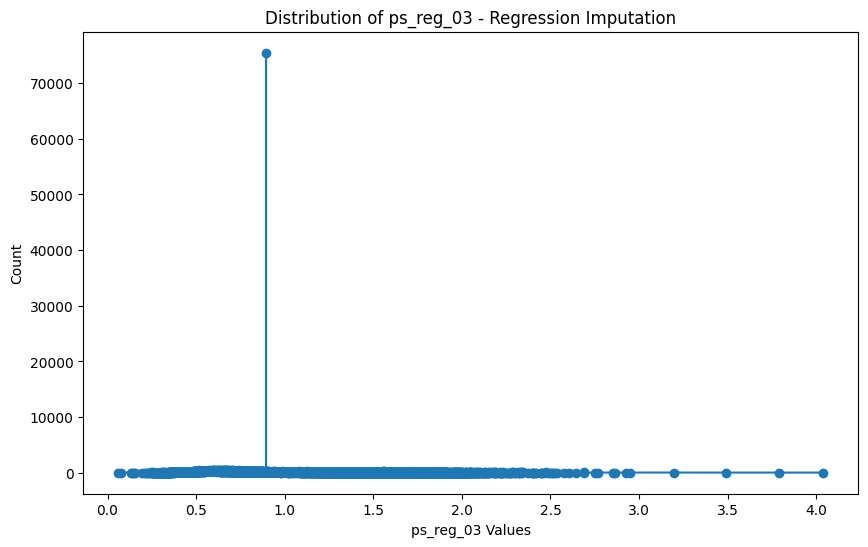

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

X_train_replaced = X_train.replace(np.nan, -1)

replaced_value_counts = X_train_replaced["ps_reg_03"].value_counts().sort_index()

negative_one_count = replaced_value_counts.loc[-1] if -1 in replaced_value_counts.index else 0
replaced_value_counts_without_negative_one = replaced_value_counts.drop(-1, errors='ignore')

plt.figure(figsize=(10, 6))
plt.plot(replaced_value_counts_without_negative_one.index, replaced_value_counts_without_negative_one.values, marker="o", linestyle="-", label="ps_reg_03")

if negative_one_count > 0:
    plt.scatter([-1], [negative_one_count], color='red', label="-1 (Missing Values)", zorder=5)

plt.title("Distribution of ps_reg_03 - Original")
plt.xlabel("ps_reg_03 Values")
plt.ylabel("Count")
plt.legend()
plt.show()

regression_imputer = IterativeImputer(estimator=LinearRegression(), max_iter=10, random_state=0)

methods = {
    "Backward Fill": lambda df_: df_["ps_reg_03"].replace(-1, np.nan).bfill(),
    "Forward Fill": lambda df_: df_["ps_reg_03"].replace(-1, np.nan).ffill(),
    "Linear Interpolation": lambda df_: df_["ps_reg_03"].replace(-1, np.nan).interpolate(method="linear"),
    "Mean Imputation": lambda df_: df_["ps_reg_03"].replace(-1, df_["ps_reg_03"].replace(-1, np.nan).mean()),
    "Median Imputation": lambda df_: df_["ps_reg_03"].replace(-1, df_["ps_reg_03"].replace(-1, np.nan).median()),
    "Regression Imputation": lambda df_: regression_imputer.fit_transform(df_[["ps_reg_03"]].replace(-1 , np.nan)).flatten()
}

for method_name, method_func in methods.items():
    plt.figure(figsize=(10, 6))
    ps_reg_03_method = method_func(X_train_replaced)
    value_counts = pd.Series(ps_reg_03_method).value_counts().sort_index()

    plt.plot(value_counts.index, value_counts.values, marker="o", linestyle="-")
    plt.title(f"Distribution of ps_reg_03 - {method_name}")
    plt.xlabel("ps_reg_03 Values")
    plt.ylabel("Count")
    plt.show()


In [ ]:
X_train['ps_reg_03'].describe()

count    341186.000000
mean          0.894577
std           0.345604
min           0.061237
25%           0.633936
50%           0.802340
75%           1.085127
max           4.037945
Name: ps_reg_03, dtype: float64

ps_car_11

In [ ]:
X_train['ps_car_11'].isna().sum()

3

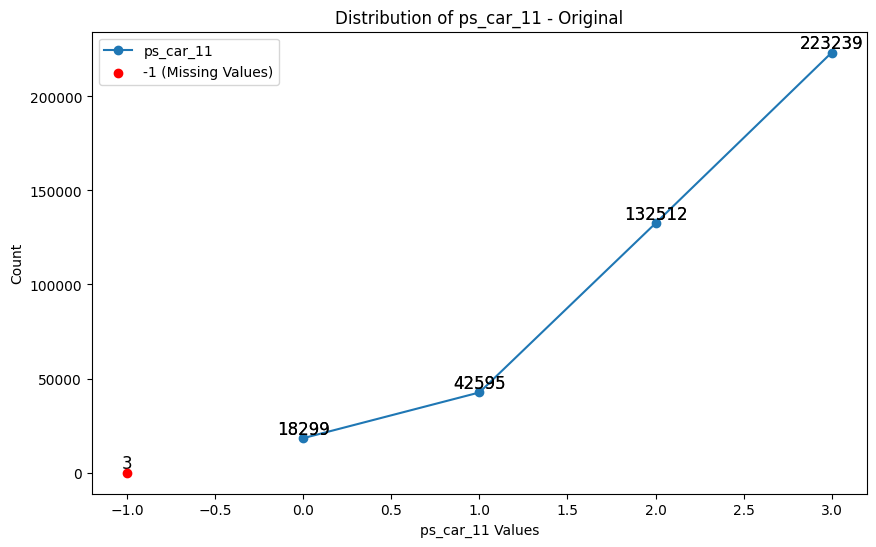

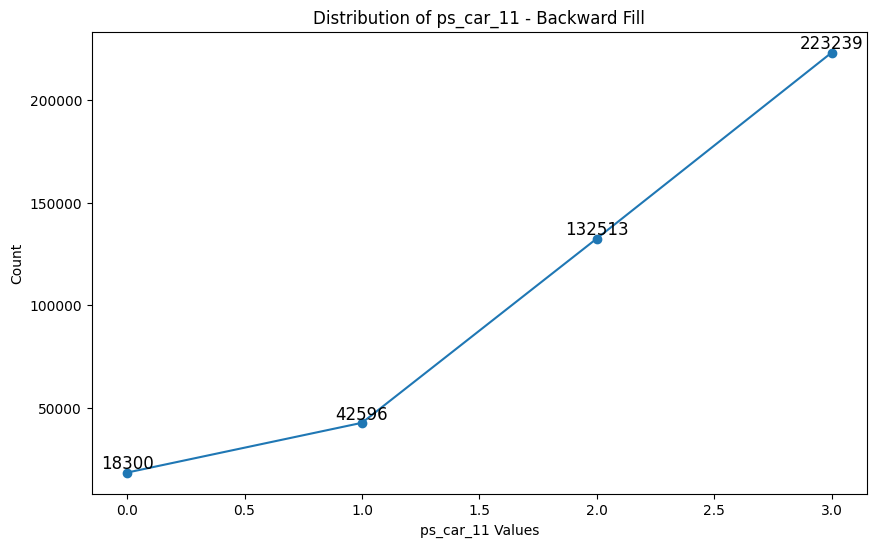

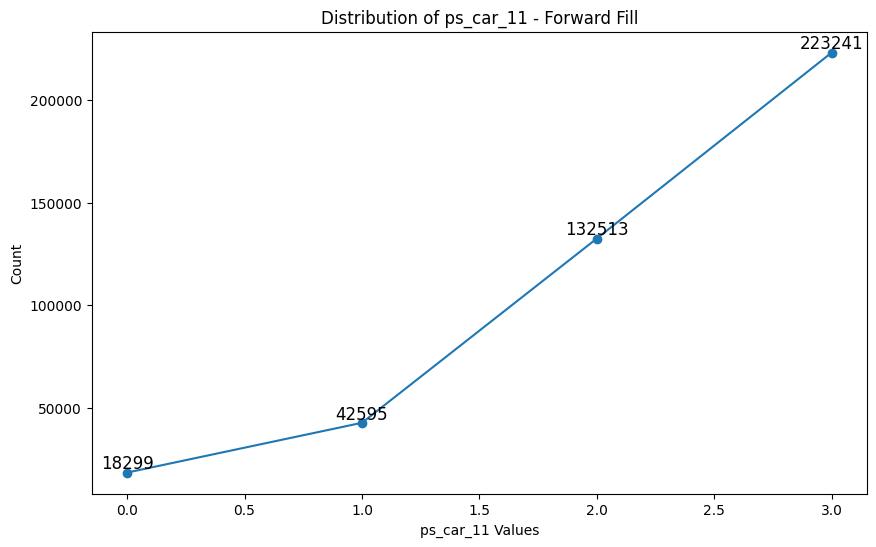

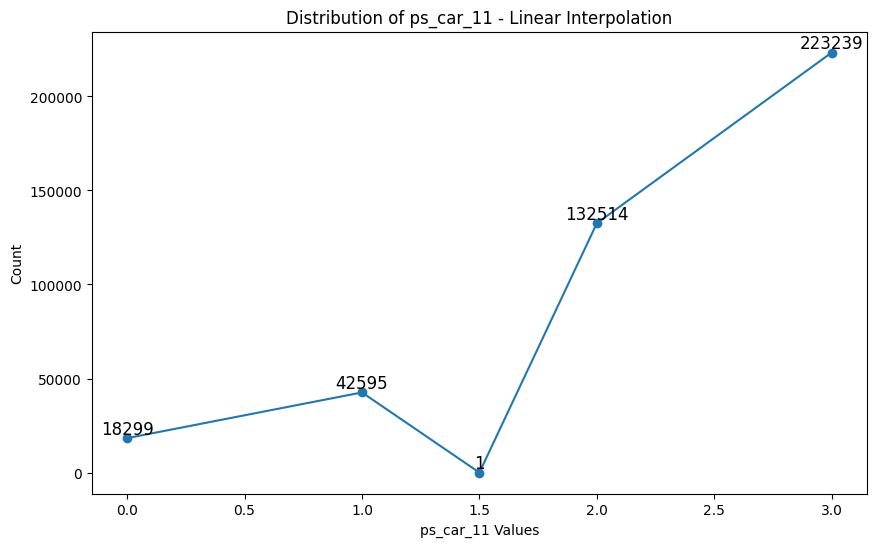

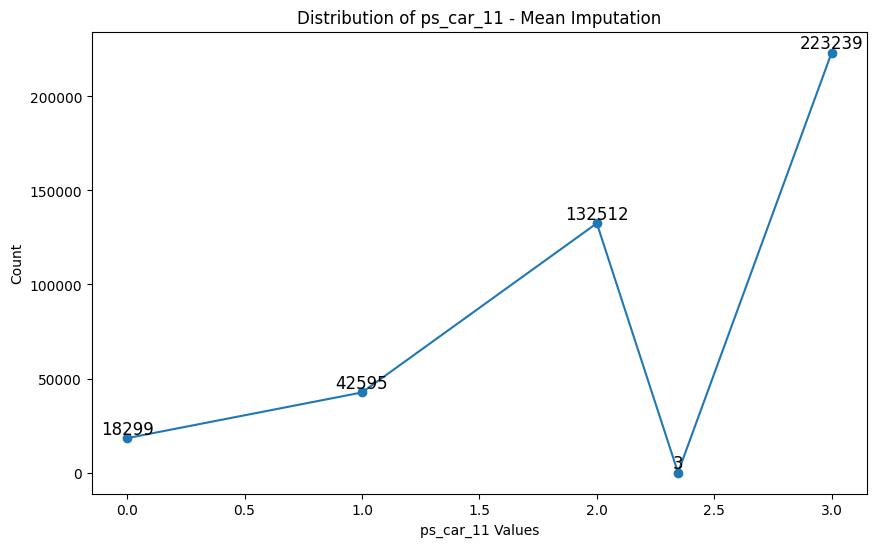

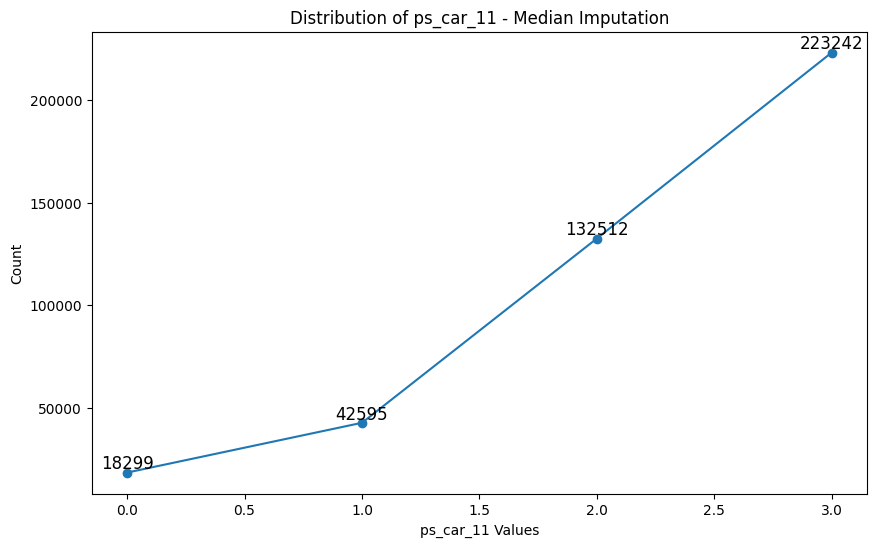

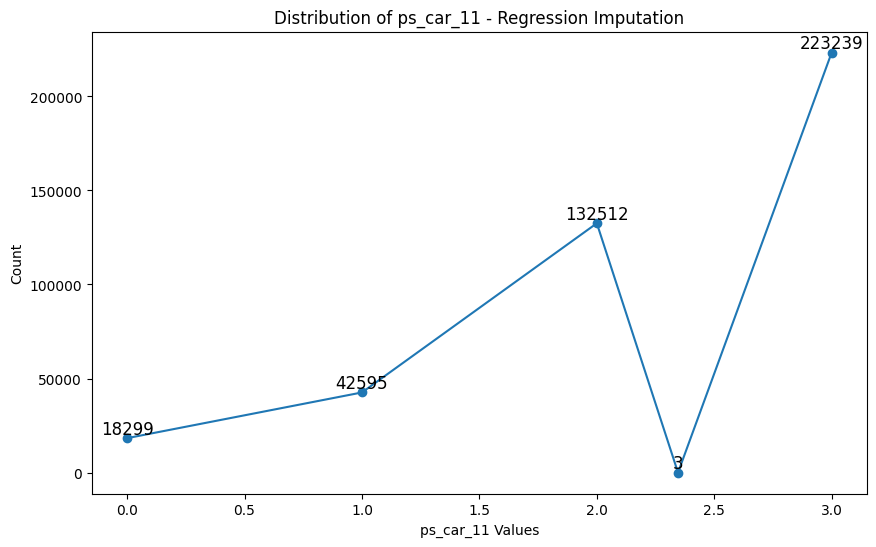

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

X_train_replaced = X_train.replace(np.nan, -1)

replaced_value_counts = X_train_replaced["ps_car_11"].value_counts().sort_index()

negative_one_count = replaced_value_counts.loc[-1] if -1 in replaced_value_counts.index else 0
replaced_value_counts_without_negative_one = replaced_value_counts.drop(-1, errors='ignore')

plt.figure(figsize=(10, 6))
plt.plot(replaced_value_counts_without_negative_one.index, replaced_value_counts_without_negative_one.values, marker="o", linestyle="-", label="ps_car_11")

# Neuer Code: Anzahlen auf den x-Werten anzeigen
for i, (x, y) in enumerate(zip(replaced_value_counts_without_negative_one.index, replaced_value_counts_without_negative_one.values)):
    plt.text(x, y, str(y), fontsize=12, ha='center', va='bottom')

for i, (x, y) in enumerate(zip(replaced_value_counts_without_negative_one.index, replaced_value_counts_without_negative_one.values)):
    plt.text(x, y, str(y), fontsize=12, ha='center', va='bottom')

if negative_one_count > 0:
    plt.scatter([-1], [negative_one_count], color='red', label="-1 (Missing Values)", zorder=5)
    # Neuer Code: Anzahl der -1-Werte anzeigen
    plt.text(-1, negative_one_count, str(negative_one_count), fontsize=12, ha='center', va='bottom')

plt.title("Distribution of ps_car_11 - Original")
plt.xlabel("ps_car_11 Values")
plt.ylabel("Count")
plt.legend()
plt.show()

regression_imputer = IterativeImputer(estimator=LinearRegression(), max_iter=10, random_state=0)

methods = {
    "Backward Fill": lambda df_: df_["ps_car_11"].replace(-1, np.nan).bfill(),
    "Forward Fill": lambda df_: df_["ps_car_11"].replace(-1, np.nan).ffill(),
    "Linear Interpolation": lambda df_: df_["ps_car_11"].replace(-1, np.nan).interpolate(method="linear"),
    "Mean Imputation": lambda df_: df_["ps_car_11"].replace(-1, df_["ps_car_11"].replace(-1, np.nan).mean()),
    "Median Imputation": lambda df_: df_["ps_car_11"].replace(-1, df_["ps_car_11"].replace(-1, np.nan).median()),
    "Regression Imputation": lambda df_: regression_imputer.fit_transform(df_[["ps_car_11"]].replace(-1 , np.nan)).flatten()
}

for method_name, method_func in methods.items():
    plt.figure(figsize=(10, 6))
    ps_car_11_method = method_func(X_train_replaced)
    value_counts = pd.Series(ps_car_11_method).value_counts().sort_index()

    plt.plot(value_counts.index, value_counts.values, marker="o", linestyle="-")

    # Neuer Code: Anzahlen auf den x-Werten anzeigen
    for i, (x, y) in enumerate(zip(value_counts.index, value_counts.values)):
        plt.text(x, y, str(y), fontsize=12, ha='center', va='bottom')

    plt.title(f"Distribution of ps_car_11 - {method_name}")
    plt.xlabel("ps_car_11 Values")
    plt.ylabel("Count")
    plt.show()


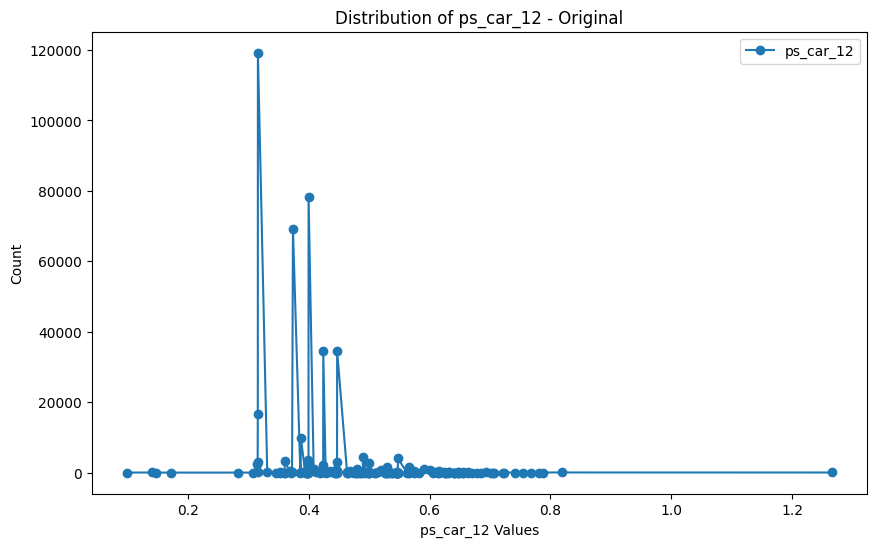

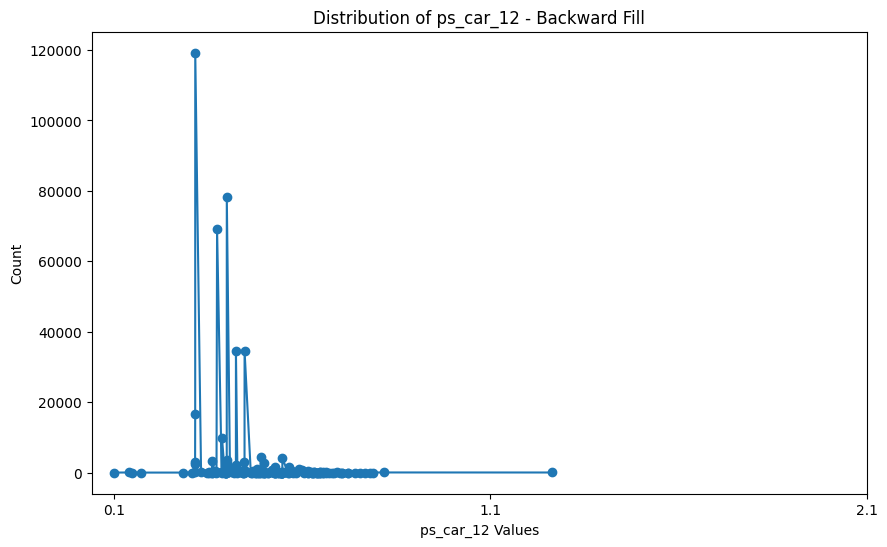

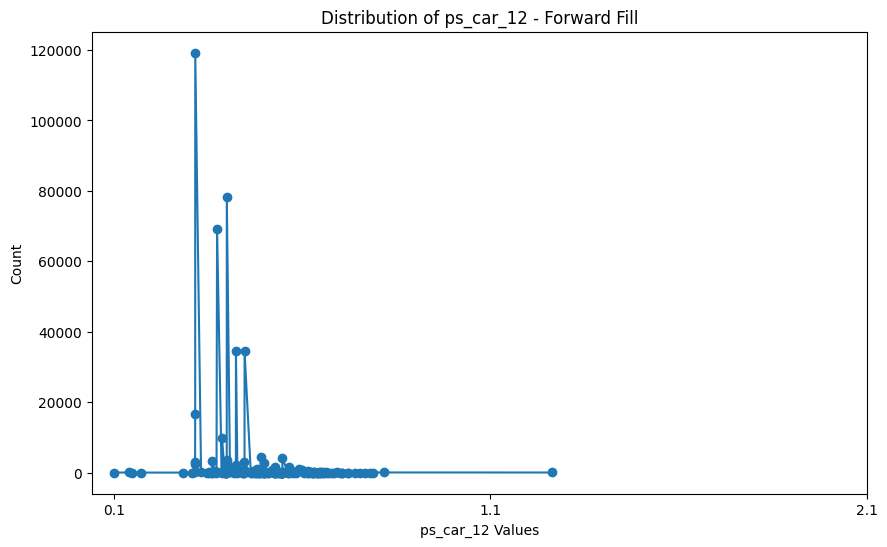

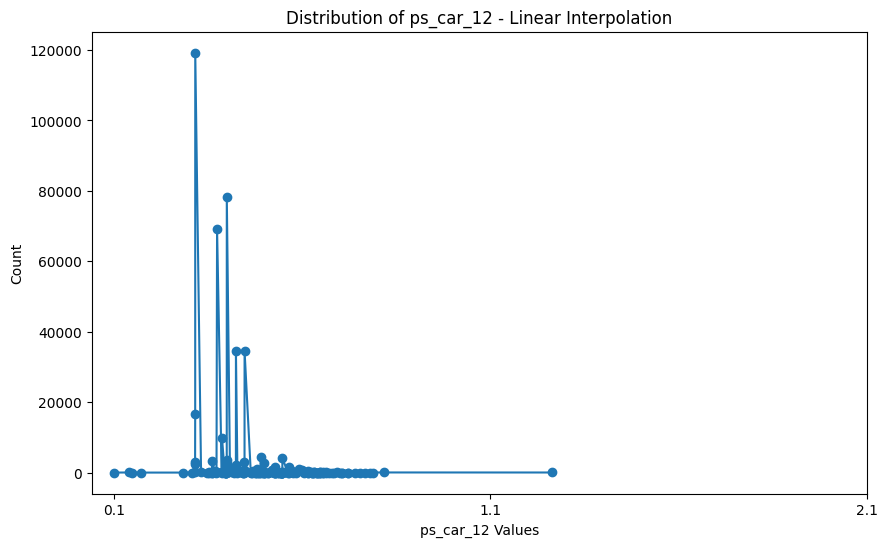

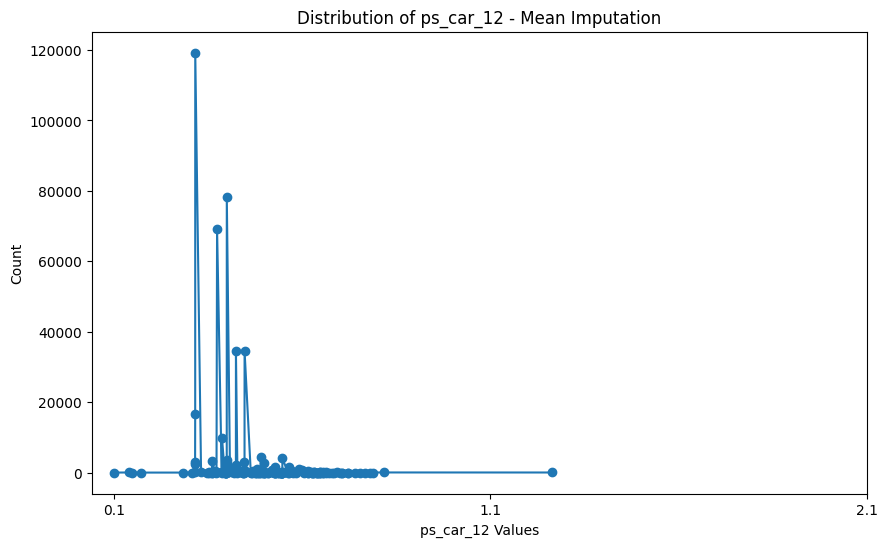

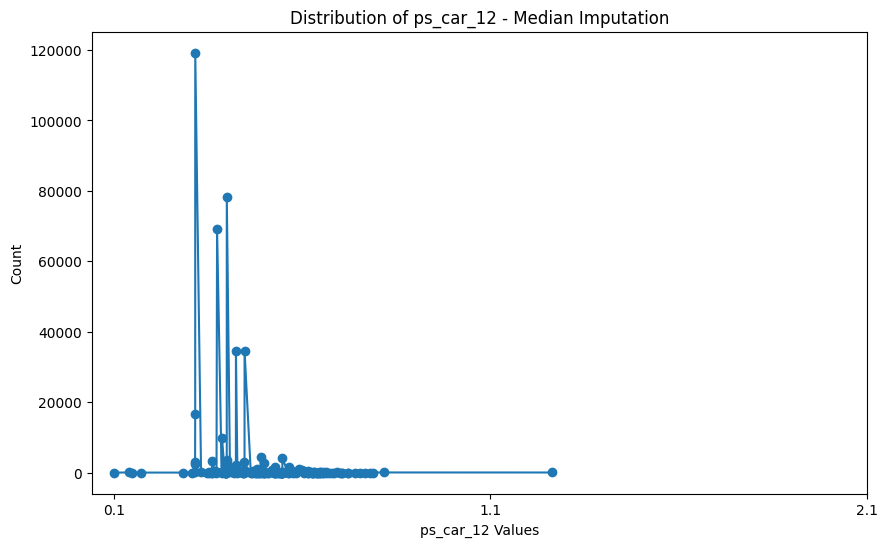

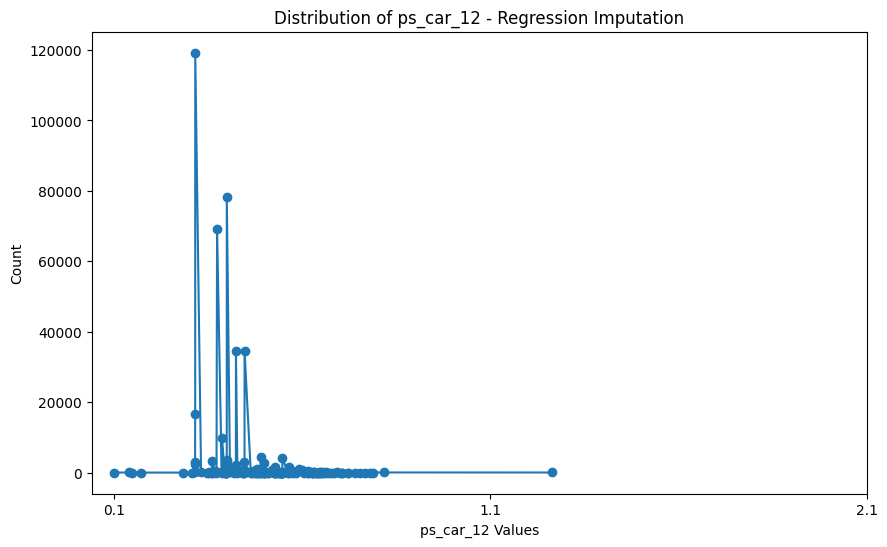

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

X_train_replaced = X_train.replace(np.nan, -1)

replaced_value_counts = X_train_replaced["ps_car_12"].value_counts().sort_index()

negative_one_count = replaced_value_counts.loc[-1] if -1 in replaced_value_counts.index else 0
replaced_value_counts_without_negative_one = replaced_value_counts.drop(-1, errors='ignore')

plt.figure(figsize=(10, 6))
plt.plot(replaced_value_counts_without_negative_one.index, replaced_value_counts_without_negative_one.values, marker="o", linestyle="-", label="ps_car_12")

if negative_one_count > 0:
    plt.scatter([-1], [negative_one_count], color='red', label="-1 (Missing Values)", zorder=5)

plt.title("Distribution of ps_car_12 - Original")
plt.xlabel("ps_car_12 Values")
plt.ylabel("Count")
plt.legend()
plt.show()

regression_imputer = IterativeImputer(estimator=LinearRegression(), max_iter=10, random_state=0)

methods = {
    "Backward Fill": lambda df_: df_["ps_car_12"].replace(-1, np.nan).bfill(),
    "Forward Fill": lambda df_: df_["ps_car_12"].replace(-1, np.nan).ffill(),
    "Linear Interpolation": lambda df_: df_["ps_car_12"].replace(-1, np.nan).interpolate(method="linear"),
    "Mean Imputation": lambda df_: df_["ps_car_12"].replace(-1, df_["ps_car_12"].replace(-1, np.nan).mean()),
    "Median Imputation": lambda df_: df_["ps_car_12"].replace(-1, df_["ps_car_12"].replace(-1, np.nan).median()),
    "Regression Imputation": lambda df_: regression_imputer.fit_transform(df_[["ps_car_12"]].replace(-1, np.nan)).flatten()
}

for method_name, method_func in methods.items():
    plt.figure(figsize=(10, 6))
    ps_car_12_method = method_func(X_train_replaced)
    value_counts = pd.Series(ps_car_12_method).value_counts().sort_index()

    plt.plot(value_counts.index, value_counts.values, marker="o", linestyle="-")

    plt.title(f"Distribution of ps_car_12 - {method_name}")
    plt.xlabel("ps_car_12 Values")
    plt.ylabel("Count")
    plt.xticks(ticks=np.arange(value_counts.index.min(), value_counts.index.max()+1, 1))
    plt.show()



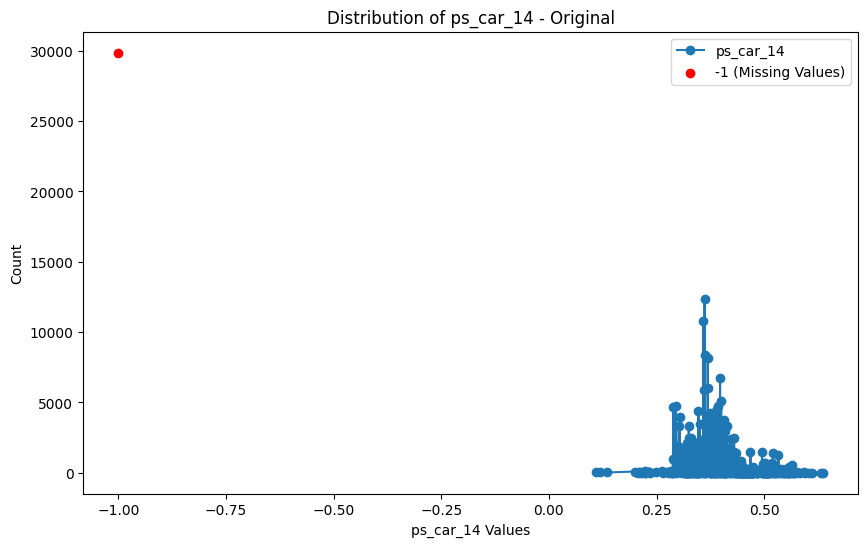

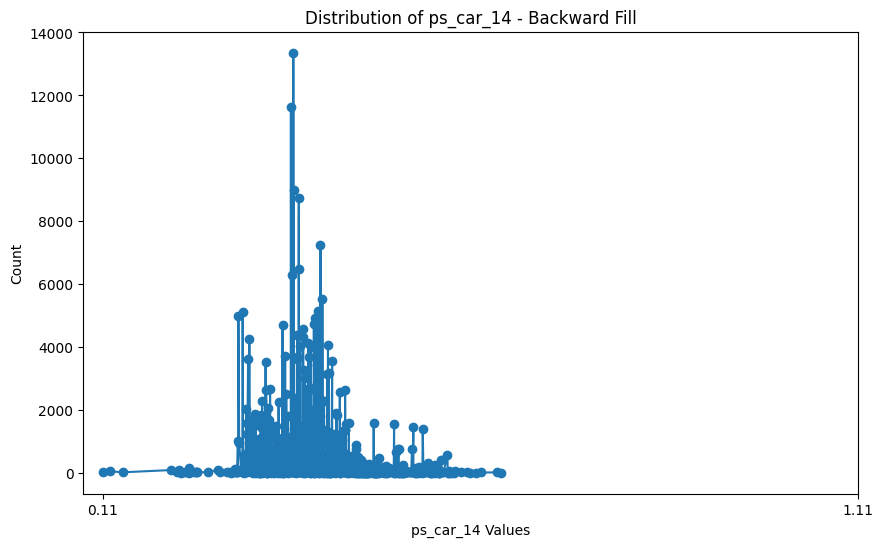

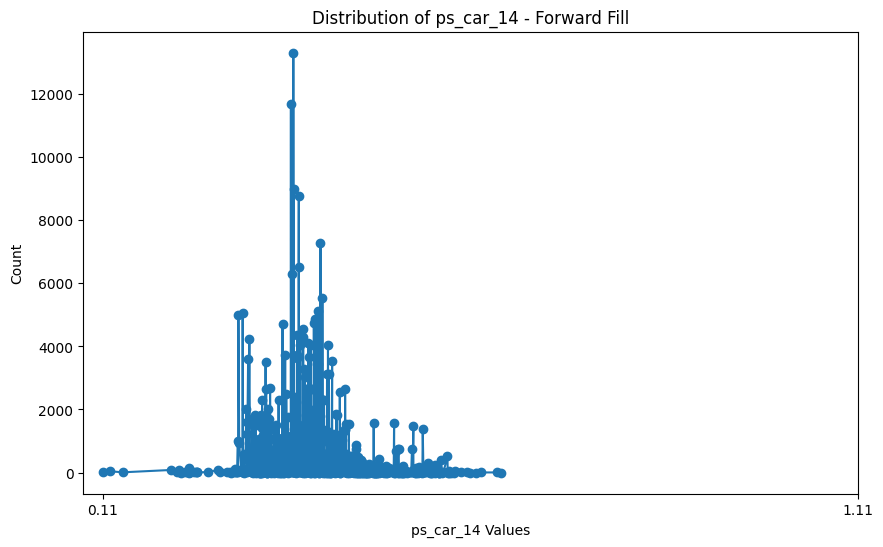

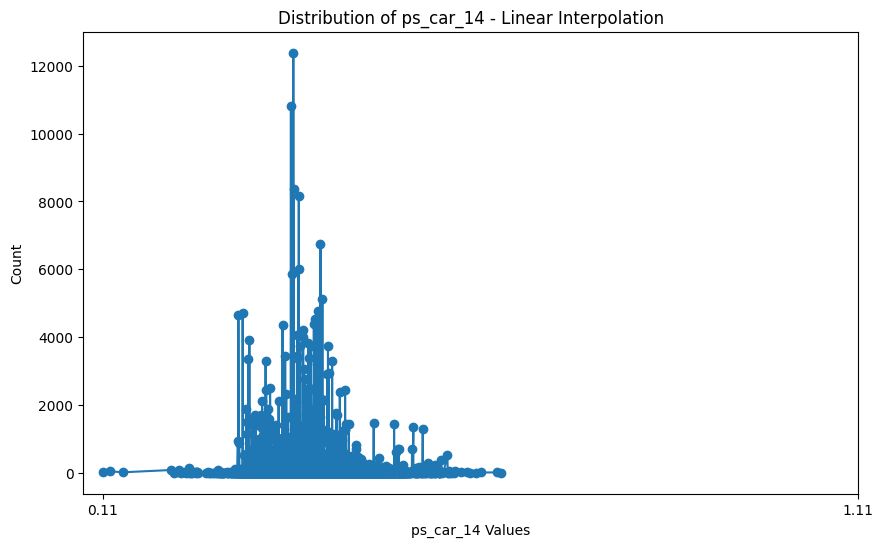

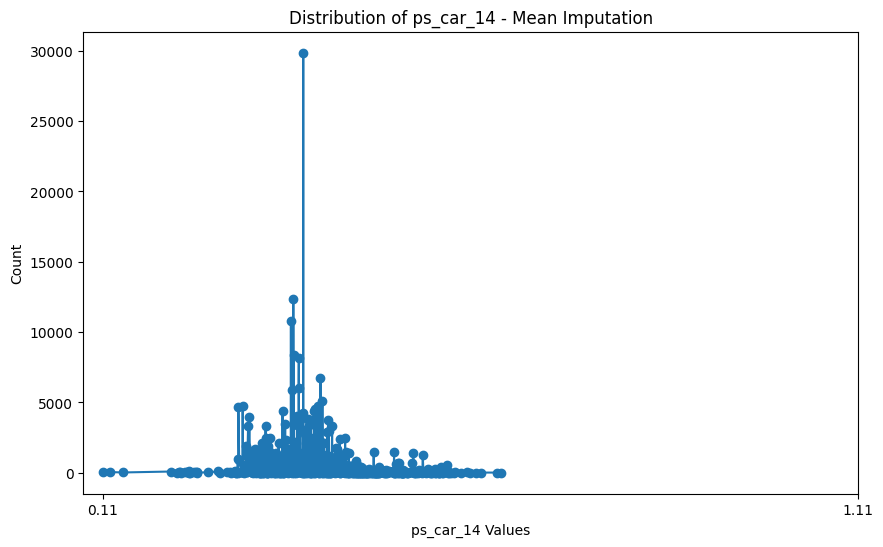

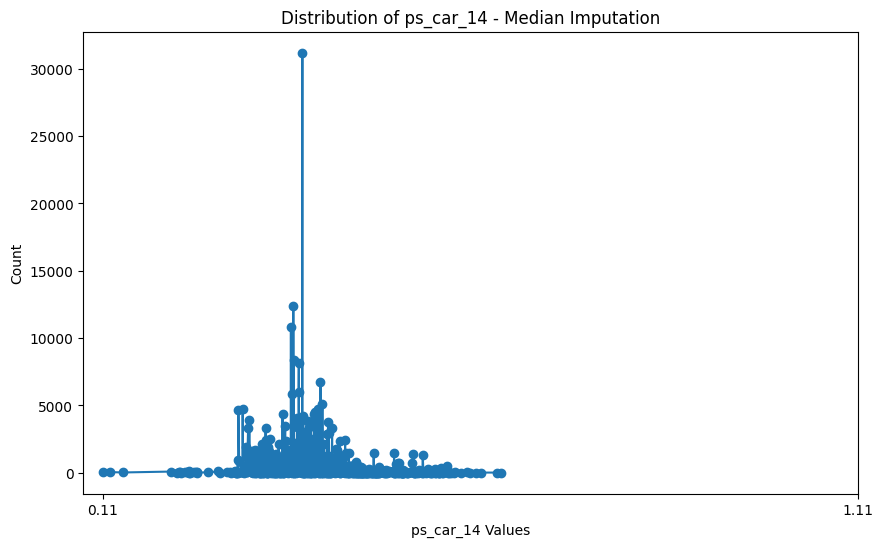

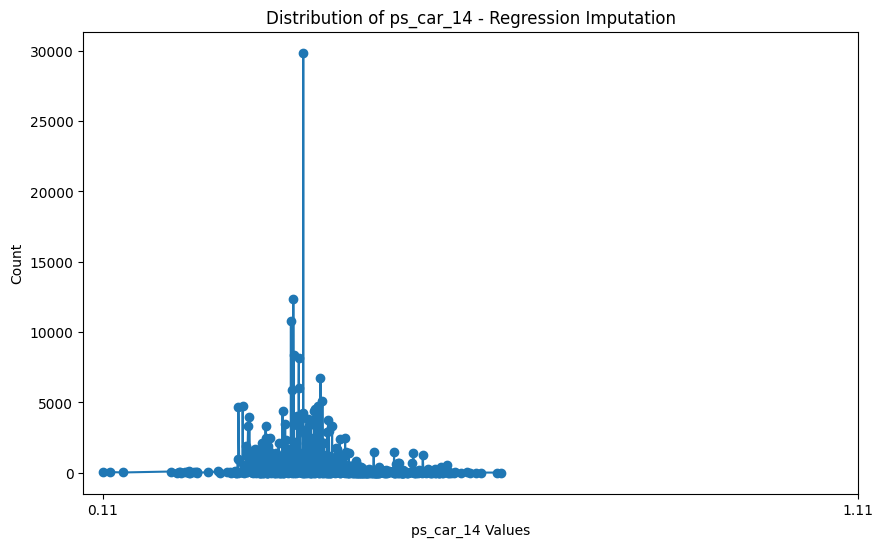

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

X_train_replaced = X_train.replace(np.nan, -1)

replaced_value_counts = X_train_replaced["ps_car_14"].value_counts().sort_index()

negative_one_count = replaced_value_counts.loc[-1] if -1 in replaced_value_counts.index else 0
replaced_value_counts_without_negative_one = replaced_value_counts.drop(-1, errors='ignore')

plt.figure(figsize=(10, 6))
plt.plot(replaced_value_counts_without_negative_one.index, replaced_value_counts_without_negative_one.values, marker="o", linestyle="-", label="ps_car_14")

if negative_one_count > 0:
    plt.scatter([-1], [negative_one_count], color='red', label="-1 (Missing Values)", zorder=5)

plt.title("Distribution of ps_car_14 - Original")
plt.xlabel("ps_car_14 Values")
plt.ylabel("Count")
plt.legend()
plt.show()

regression_imputer = IterativeImputer(estimator=LinearRegression(), max_iter=10, random_state=0)

methods = {
    "Backward Fill": lambda df_: df_["ps_car_14"].replace(-1, np.nan).bfill(),
    "Forward Fill": lambda df_: df_["ps_car_14"].replace(-1, np.nan).ffill(),
    "Linear Interpolation": lambda df_: df_["ps_car_14"].replace(-1, np.nan).interpolate(method="linear"),
    "Mean Imputation": lambda df_: df_["ps_car_14"].replace(-1, df_["ps_car_14"].replace(-1, np.nan).mean()),
    "Median Imputation": lambda df_: df_["ps_car_14"].replace(-1, df_["ps_car_14"].replace(-1, np.nan).median()),
    "Regression Imputation": lambda df_: regression_imputer.fit_transform(df_[["ps_car_14"]].replace(-1, np.nan)).flatten()
}

for method_name, method_func in methods.items():
    plt.figure(figsize=(10, 6))
    ps_car_14_method = method_func(X_train_replaced)
    value_counts = pd.Series(ps_car_14_method).value_counts().sort_index()

    plt.plot(value_counts.index, value_counts.values, marker="o", linestyle="-")

    plt.title(f"Distribution of ps_car_14 - {method_name}")
    plt.xlabel("ps_car_14 Values")
    plt.ylabel("Count")
    plt.xticks(ticks=np.arange(value_counts.index.min(), value_counts.index.max()+1, 1))
    plt.show()


In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np
from sklearn.impute import SimpleImputer

In [ ]:
#Ersetzt die Nans mit dem Mittelwert
#Nur wichtig für den Isolation Forest

imputer = SimpleImputer(strategy='mean')
X_train_imputed=pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

def isolation_forest(df,index_series):
  iso_forest = IsolationForest(n_estimators=1000, contamination=0.1, random_state=42)
  iso_forest.fit(df)

  return(pd.Series(iso_forest.predict(df),index=index_series).map({1:False,-1:True}))

isolation_forest_series = isolation_forest(X_train_imputed,X_train.index)
isolation_forest_counts = isolation_forest_series.sum()


In [ ]:
def log_transform(series):
    return np.log1p(series)

log_transformed_data = X_train[continuous_columns].apply(log_transform)
modified_z_scores_log = log_transformed_data.apply(modified_z_score)

outliers_modified_z_log = modified_z_scores_log > threshold_modified_z
outlier_counts_modified_z_log = outliers_modified_z_log.sum()

outlier_modified_z_log_series = outliers_modified_z_log.any(axis=1)

In [ ]:
outlier_counts_modified_z_log

ps_ind_01        0
ps_ind_03        0
ps_ind_14     4503
ps_ind_15        0
ps_reg_01        0
ps_reg_02     3337
ps_reg_03        0
ps_car_11        0
ps_car_12      312
ps_car_13     8085
ps_car_14        0
ps_car_15        0
ps_calc_01       0
ps_calc_02       0
ps_calc_03       0
ps_calc_04       0
ps_calc_05       0
ps_calc_06       0
ps_calc_07       0
ps_calc_08       0
ps_calc_09       0
ps_calc_10       1
ps_calc_11       0
ps_calc_12       0
ps_calc_13       0
ps_calc_14       0
dtype: int64

## Outliers

In [ ]:
def modified_z_score(series):
    median = np.median(series)
    mad = np.median(np.abs(series - median))
    return 0.6745 * (series - median) / mad

z_scores = np.abs((X_train[continuous_columns] - X_train[continuous_columns].mean()) / X_train[continuous_columns].std())
modified_z_scores = X_train[continuous_columns].apply(modified_z_score)

threshold_z = 3
threshold_modified_z = 3.5

outliers_z = z_scores > threshold_z
outliers_modified_z = modified_z_scores > threshold_modified_z

outlier_z_series = outliers_z.any(axis=1)
outlier_modified_z_series = outliers_modified_z.any(axis=1)


outlier_counts_z = outliers_z.sum()
outlier_counts_modified_z = outliers_modified_z.sum()


def iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3.0 * IQR
    upper_bound = Q3 + 3.0 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

outlier_counts_iqr = X_train[continuous_columns].apply(iqr_outliers)

outlier_iqr_series = X_train[continuous_columns].apply(iqr_outliers).any(axis=0)


def log_transform(series):
    return np.log1p(series)

log_transformed_data = X_train[continuous_columns].apply(log_transform)
modified_z_scores_log = log_transformed_data.apply(modified_z_score)

outliers_modified_z_log = modified_z_scores_log > threshold_modified_z
outlier_counts_modified_z_log = outliers_modified_z_log.sum()

outlier_modified_z_log_series = outliers_modified_z_log.any(axis=1)

def isolation_forest(df,index_series):
  iso_forest = IsolationForest(n_estimators=1000, contamination=0.01, random_state=42)
  iso_forest.fit(df)

  return(pd.Series(iso_forest.predict(df),index=index_series).map({1:False,-1:True}))

isolation_forest_series = isolation_forest(X_train_imputed[continuous_columns],X_train.index)
isolation_forest_counts = pd.Series(data=isolation_forest_series.sum(),index=X_train[continuous_columns].columns)


outlier_all_df = pd.DataFrame({
    'Index': X_train.index,
    'Z-score': outlier_z_series.values,
    'Modified Z-score': outlier_modified_z_series.values,
    'IQR': outlier_iqr_series,
    'Log + Modified Z-score': outlier_modified_z_log_series.values,
    'Isolation Forest': isolation_forest_series.values
})

boolean_mask_aligned = outlier_all_df.all(axis=1)

filtered_outliers = outlier_all_df[boolean_mask_aligned]
filtered_outliers_index = list(filtered_outliers['Index'])

outliers_all_methods = ((outliers_z) &
                        (outliers_modified_z) &
                        (outliers_modified_z_log) &
                        (outlier_counts_iqr))

outlier_counts_all_methods = outliers_all_methods.loc[filtered_outliers_index].sum()

outlier_counts_df = pd.DataFrame({
    'Feature': continuous_columns,
    'Outlier Count (Z-score)': outlier_counts_z.values,
    'Outlier Count (Modified Z-score)': outlier_counts_modified_z.values,
    'Outlier Count (IQR)': outlier_counts_iqr.values,
    'Outlier Count (Log + Modified Z-score)': outlier_counts_modified_z_log.values,
    'Outlier Count (Isolation Forest)': isolation_forest_counts.values,
    'Outlier Count (All Methods)': outlier_counts_all_methods.values
})

outlier_counts_df

# eine modifizierte z score rausnehmen
# imputation einfügen für Isolaition forest

Feature  Outlier Count (Z-score)  Outlier Count (Modified Z-score)  \
0    ps_ind_01                        0                             12122   
2    ps_ind_03                        0                                 0   
13   ps_ind_14                     4503                              4503   
14   ps_ind_15                        0                                 0   
18   ps_reg_01                        0                                 0   
19   ps_reg_02                     5118                             17754   
20   ps_reg_03                     2440                                 0   
32   ps_car_11                        0                                 0   
33   ps_car_12                     4703                               447   
34   ps_car_13                     7531                             12349   
35   ps_car_14                     6983                                 0   
36   ps_car_15                     9950                                 0   
37  ps_calc_01                        0                                 0   
38  ps_calc_02                        0                                 0   
39  ps_calc_03                        0                                 0   
40  ps_calc_04                        0                                 0   
41  ps_calc_05                      376                                 0   
42  ps_calc_06                      970                                 0   
43  ps_calc_07                      390                                16   
44  ps_calc_08                      669                                 0   
45  ps_calc_09                      183                                 0   
46  ps_calc_10                     1114                               475   
47  ps_calc_11                     1764                                75   
48  ps_calc_12                     1502                               312   
49  ps_calc_13                     3858                              1126   
50  ps_calc_14                     2071                               357   

    Outlier Count (IQR)  Outlier Count (Log + Modified Z-score)  \
0                     0                                       0   
2                     0                                       0   
13                 4503                                    4503   
14                    0                                       0   
18                    0                                       0   
19                 3337                                    3337   
20                  162                                       0   
32                    0                                       0   
33                  312                                     312   
34                 4265                                    8085   
35                 2151                                       0   
36                 9950                                       0   
37                    0                                       0   
38                    0                                       0   
39                    0                                       0   
40                    0                                       0   
41                    0                                       0   
42                    1                                       0   
43                    0                                       0   
44                    0                                       0   
45                    0                                       0   
46                    7                                       1   
47                   25                                       0   
48                 1502                                       0   
49                   91                                       0   
50                  143                                       0   

    Outlier Count (Isolation Forest)  Outlier Count (All Methods)  
0                               4167             

## Standardization / Normalization

StandardScaler Method

In [ ]:
print(X_train)

from sklearn.preprocessing import StandardScaler

# numerical Data Type
numerical = X_train.select_dtypes(include=['float64', 'int64']).columns

# DataFrame with only numerical Data Type
X_train_numerical = X_train[numerical]

scaler = StandardScaler()

# Transform numerical data type
X_train_numerical_standardized = scaler.fit_transform(X_train_numerical)

# numpy array to a DataFrame
X_train_numerical_standardized = pd.DataFrame(X_train_numerical_standardized, columns=numerical)

print(X_train_numerical_standardized.head())

# Check mean and standard deviation of the standardized data
print("\nMean of standardized data:\n", X_train_numerical_standardized.mean())
print("\nStandard deviation of standardized data:\n", X_train_numerical_standardized.std())



NameError: name 'X_train' is not defined

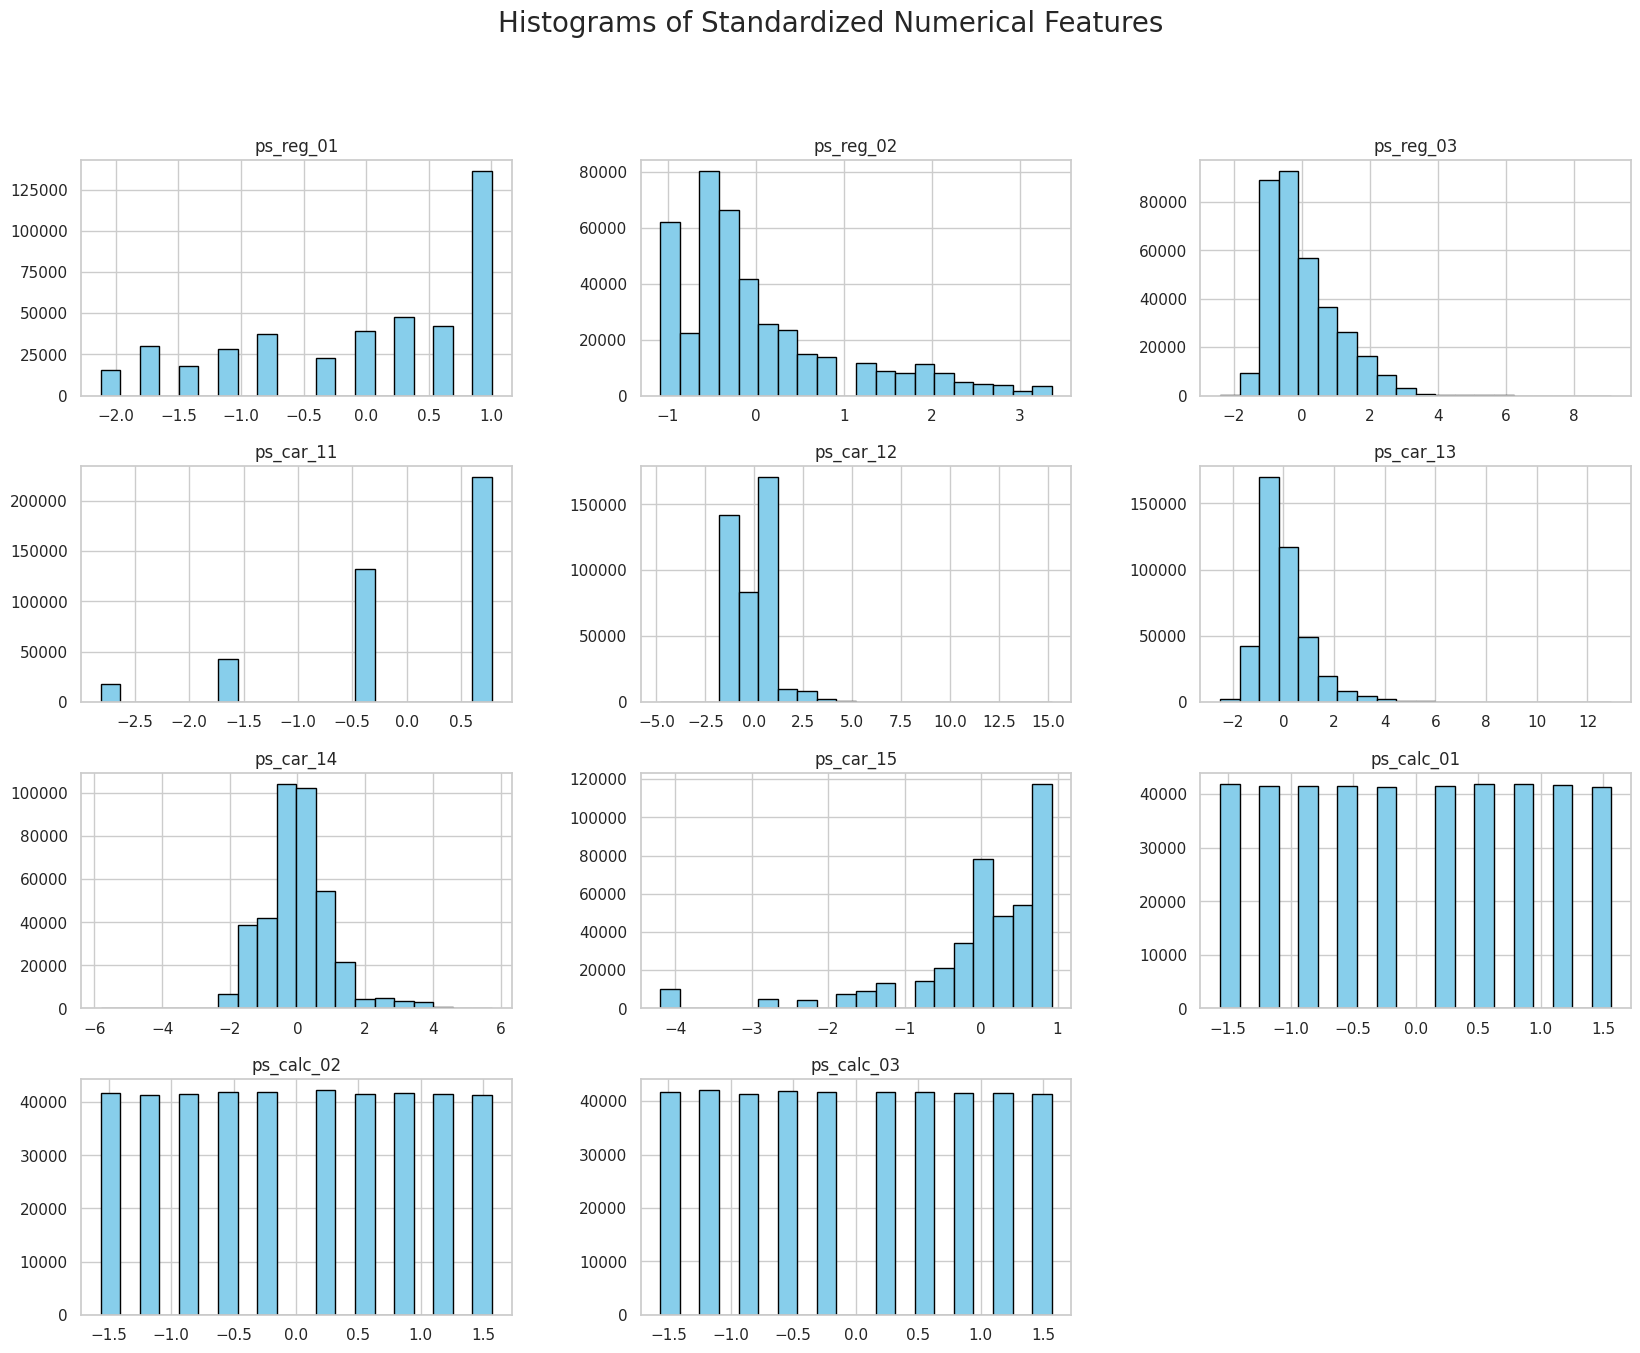

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

X_train_numerical_standardized.hist(bins=20, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Standardized Numerical Features', fontsize=20)
plt.show()



MinMaxScaler Method

> Add blockquote



In [ ]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

#  numerical Data Type
numerical = X_train.select_dtypes(include=['int64', 'float64', 'uint8'])

scaler = MinMaxScaler()

# Fit and transform the numerical data
X_train_minmax = scaler.fit_transform(numerical)

# Convert numpy array to DataFrame
X_train_minmax = pd.DataFrame(X_train_minmax, columns=numerical.columns)


print(X_train_minmax.head())

# Check the min and max values of the scaled data
print("\nMin values of scaled data:\n", X_train_minmax.min())
print("\nMax values of scaled data:\n", X_train_minmax.max())

   ps_ind_01  ps_ind_03  ps_ind_14  ps_ind_15  ps_reg_01  ps_reg_02  \
0   0.142857   0.636364        0.0   0.538462   1.000000   0.166667   
1   0.714286   0.272727        0.0   0.538462   0.777778   0.111111   
2   0.428571   0.636364        0.0   0.846154   0.222222   0.166667   
3   0.285714   0.454545        0.0   0.846154   0.666667   0.111111   
4   0.714286   0.454545        0.0   0.461538   1.000000   0.166667   

   ps_reg_03  ps_car_11  ps_car_12  ps_car_13  ps_car_14  ps_car_15  \
0        NaN   0.666667   0.257530   0.207331        NaN   1.000000   
1   0.134164   1.000000   0.298060   0.159773   0.598030   0.801784   
2        NaN   1.000000   0.235353   0.153840   0.533782   0.886405   
3   0.147083   0.666667   0.185617   0.146080   0.504801   0.886405   
4   0.147932   0.666667   0.288340   0.167052   0.578116   0.845154   

   ps_calc_01  ps_calc_02  ps_calc_03  ps_calc_04  ps_calc_05  ps_calc_06  \
0    0.555556    0.333333    0.222222         0.8    0.166667        

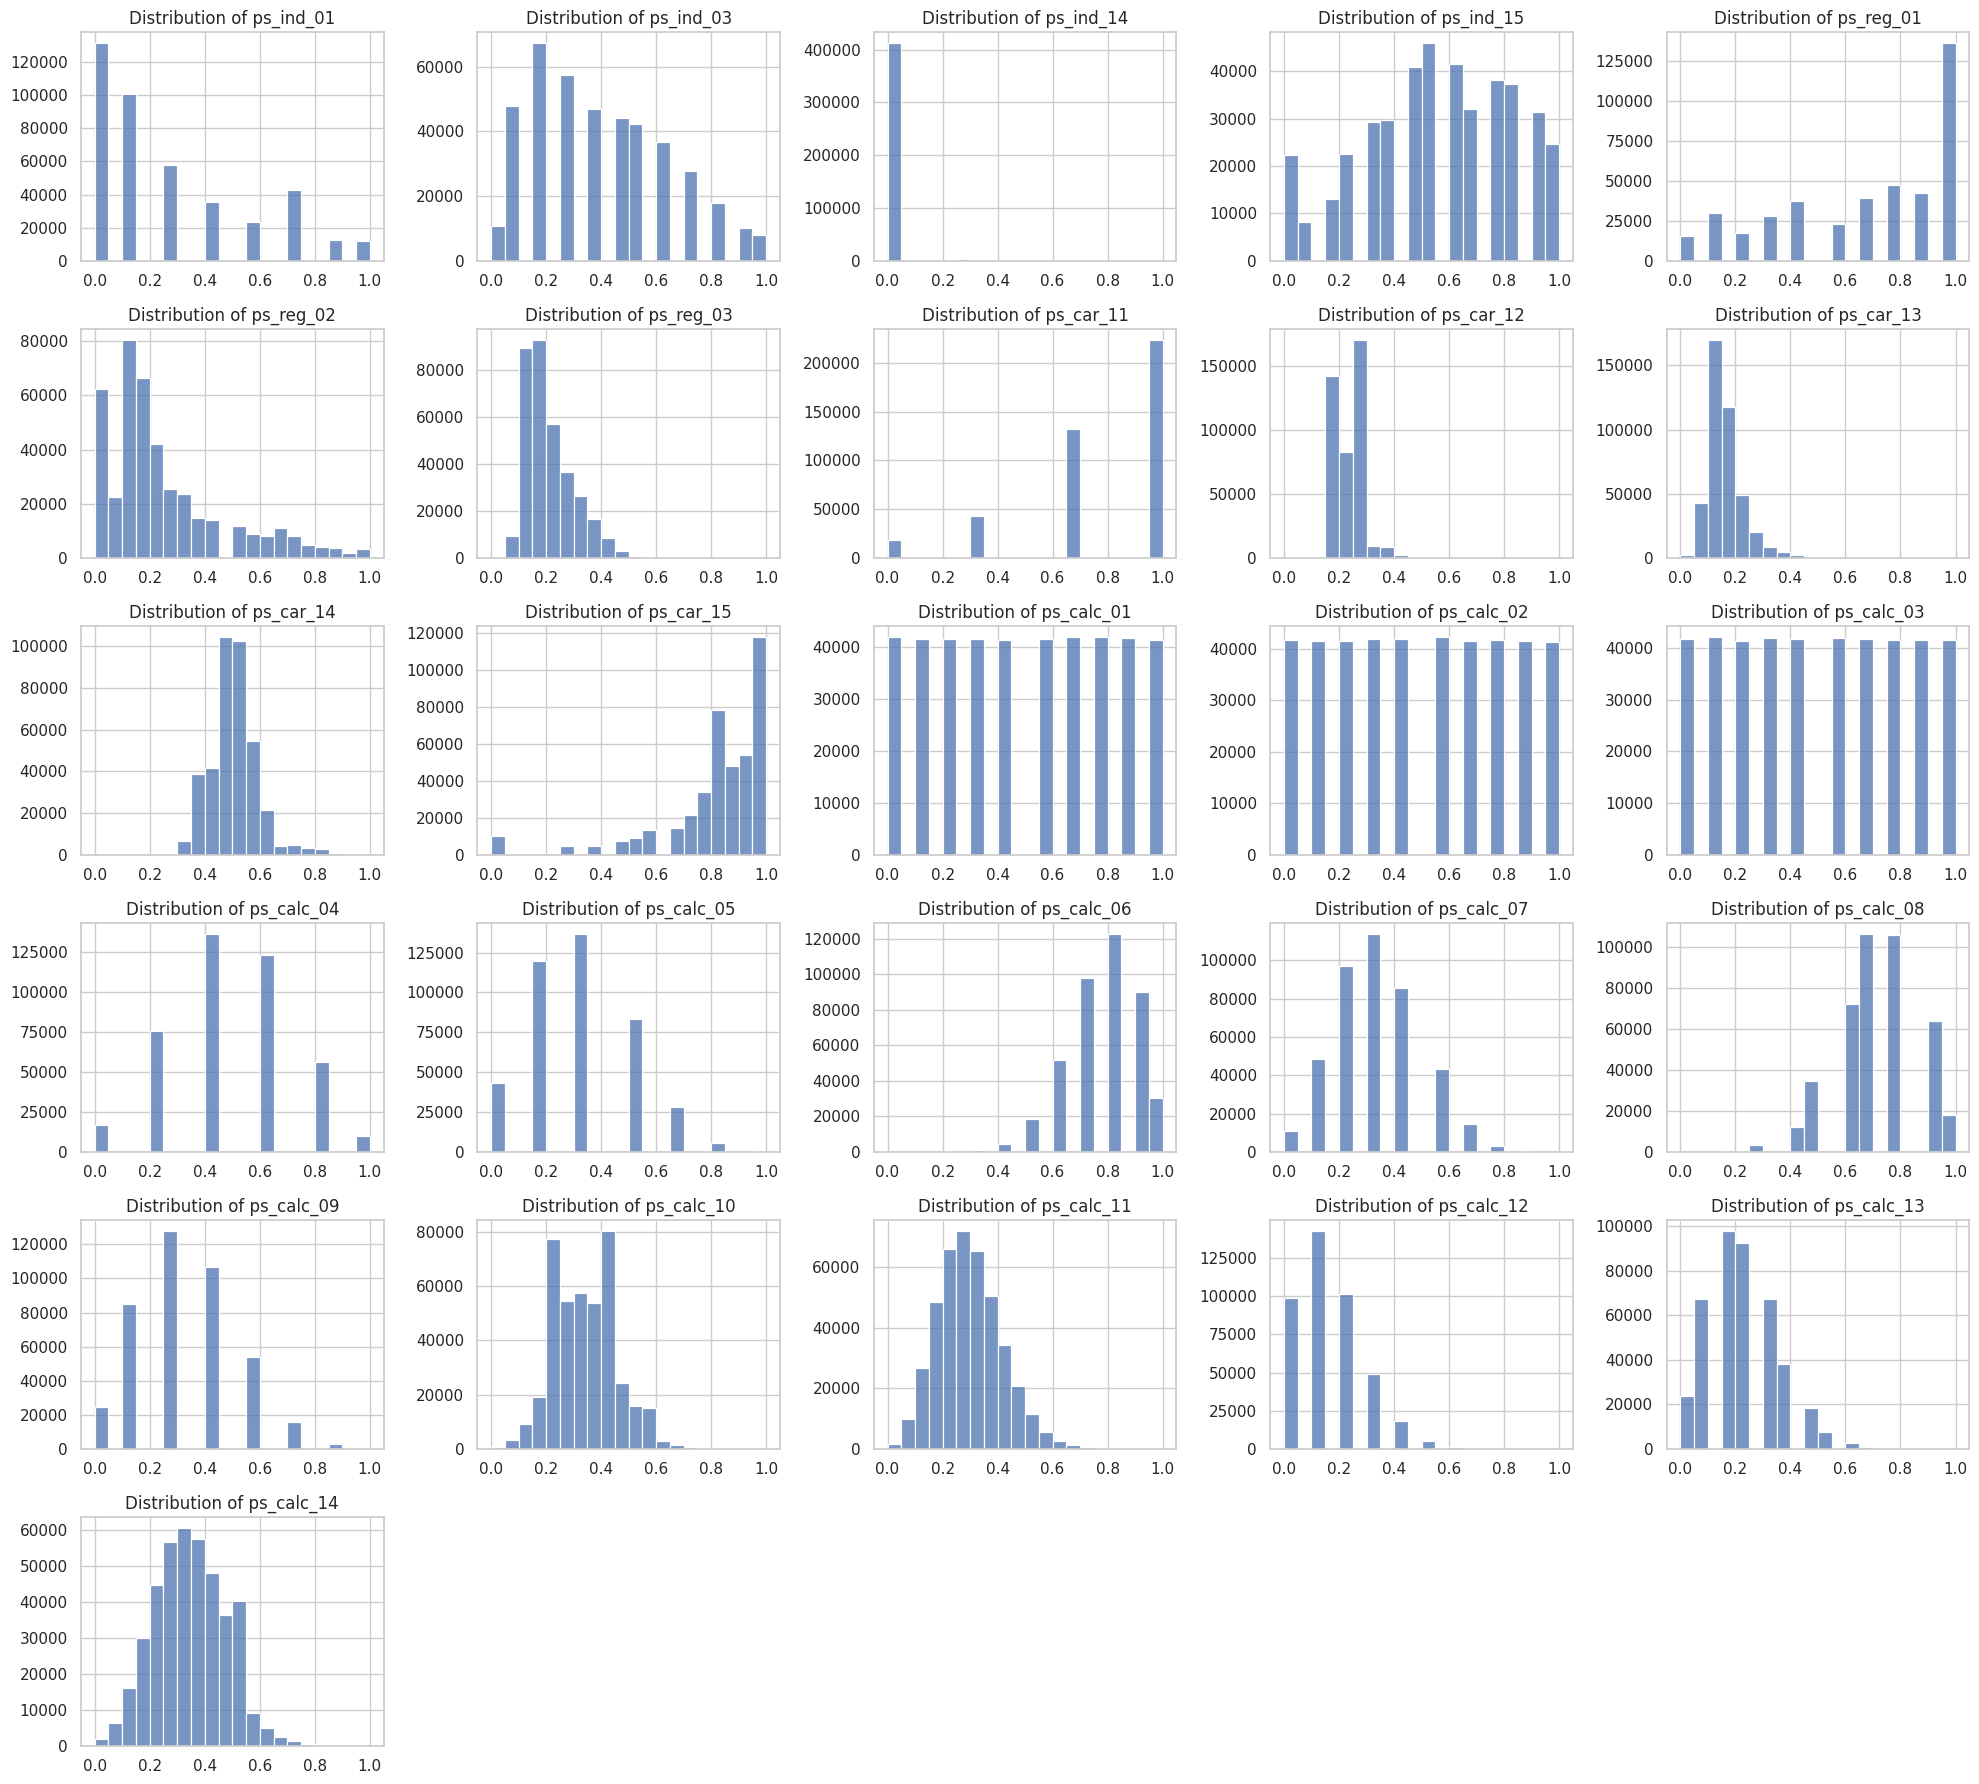

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import math


num_columns = len(X_train_minmax.columns)

num_rows = math.ceil(num_columns / 5)
num_cols = min(5, num_columns)

plt.figure(figsize=(num_cols * 4, num_rows * 3))

for i, column in enumerate(X_train_minmax.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(X_train_minmax[column], bins=20, kde=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


## RobustScaler Method

In [ ]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
import math


# numerical Data Type
numerical = X_train.select_dtypes(include=['int64', 'float64', 'uint8'])

scaler = RobustScaler()

# Fit and transform the numerical data
X_train_robust = scaler.fit_transform(numerical)

# Convert numpy array  to a DataFrame
X_train_robust = pd.DataFrame(X_train_robust, columns=numerical.columns)

# Visualizing the results

num_columns = len(X_train_robust.columns)

num_rows = math.ceil(num_columns / 5)
num_cols = min(5, num_columns)


plt.figure(figsize=(num_cols * 4, num_rows * 3))


for i, column in enumerate(X_train_robust.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(X_train_robust[column], bins=20, kde=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

## QuantileScaler Method

In [ ]:
from sklearn.preprocessing import QuantileTransformer

In [ ]:
quantile_scaler = QuantileTransformer(output_distribution='normal', random_state=0)

In [ ]:
#only for continous Features
X_scaled_quantile = quantile_scaler.fit_transform(X_train[continuous_columns])

In [ ]:
def plots(df,var,t):
  plt.figure(figsize=(13,5))
  plt.subplot(121)
  sns.kdeplot(df[var])
  plt.title('before'+str(t).split('(')[0])

  plt.subplot(122)
  p1 = t.fit_transform(df[[var]]).flatten()
  sns.kdeplot(p1)
  plt.title('after'+str(t).split('(')[0])

<ipython-input-15-67203991bbf4>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(13,5))


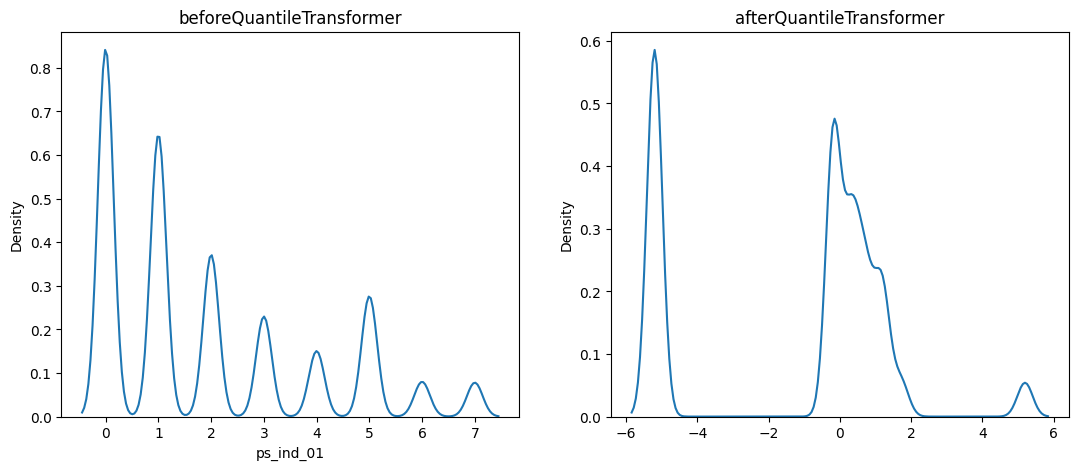

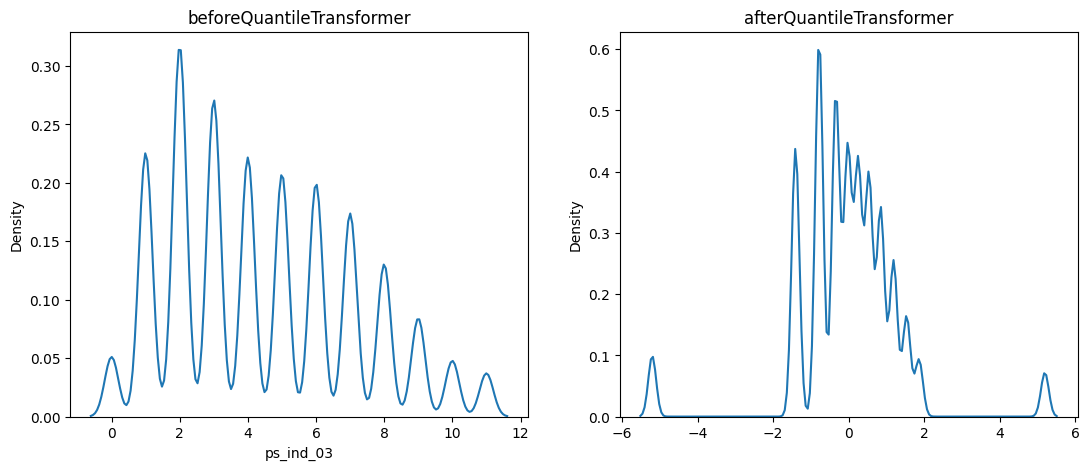

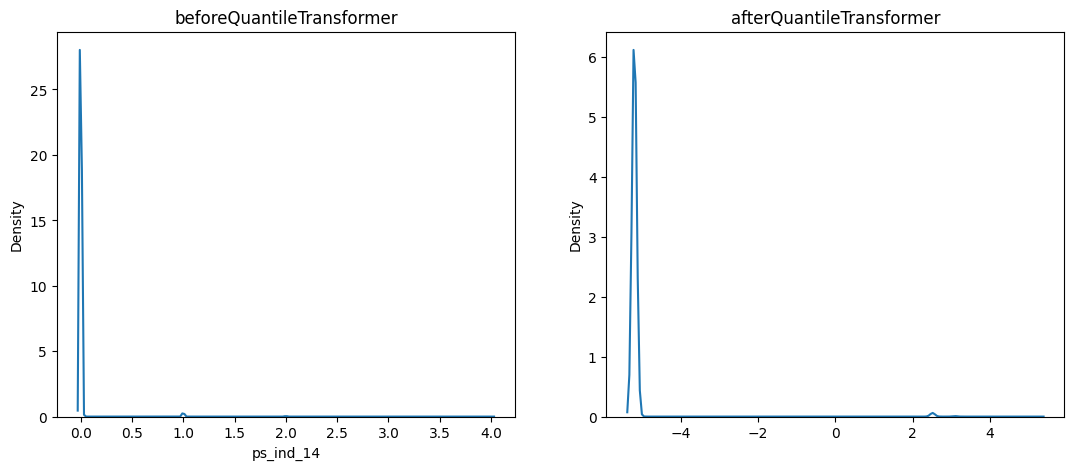

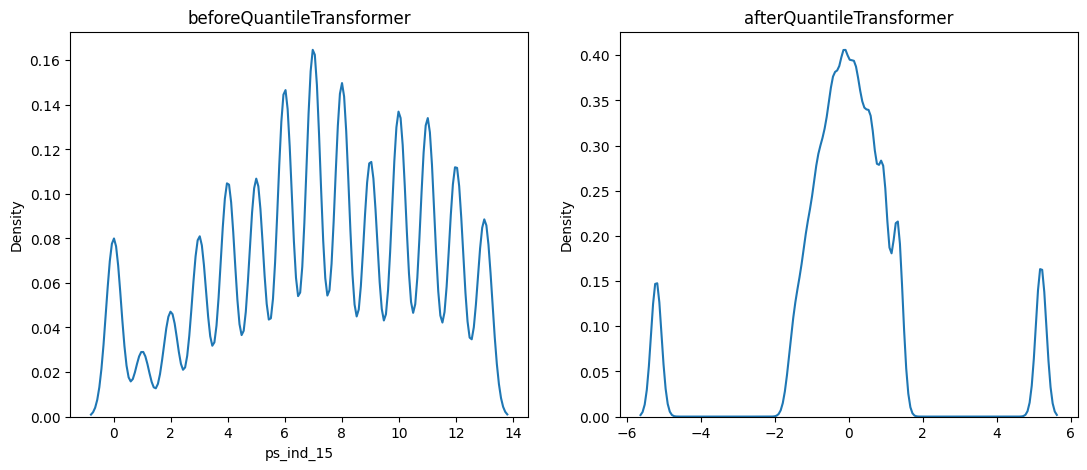

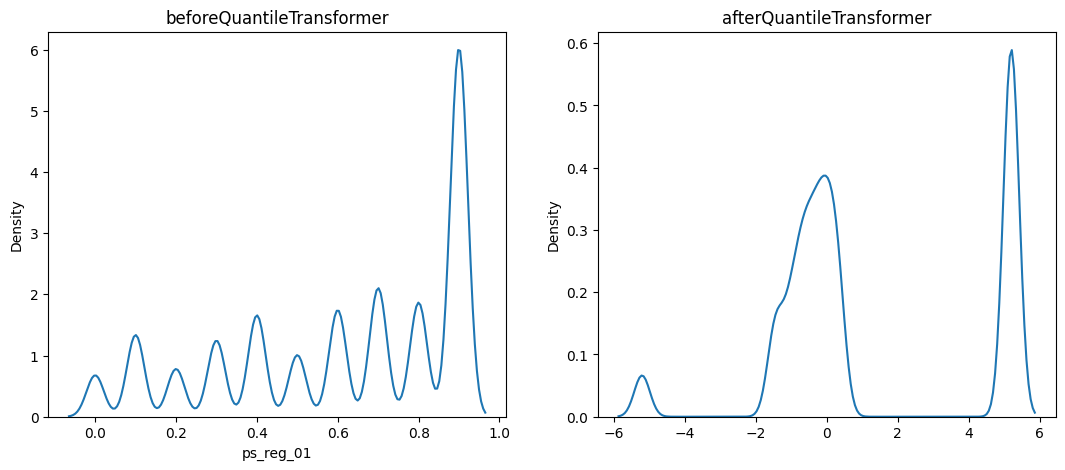

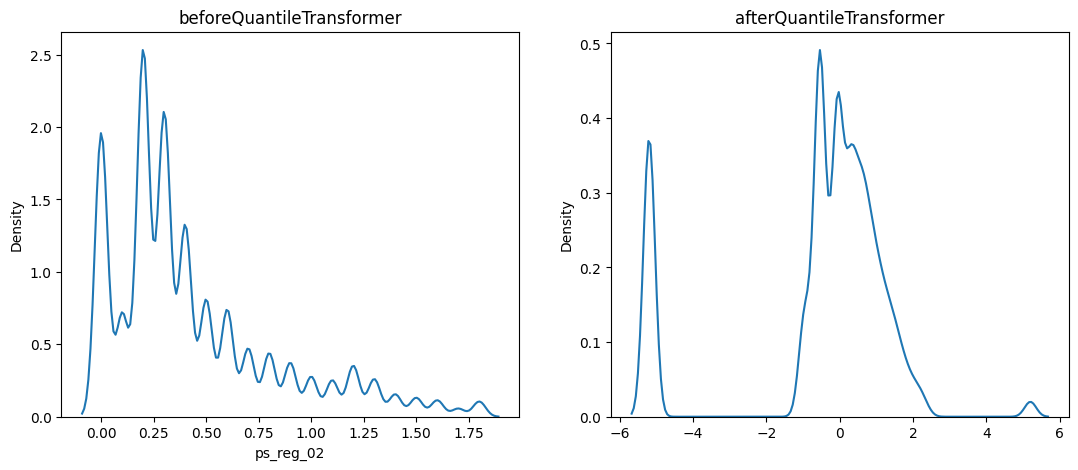

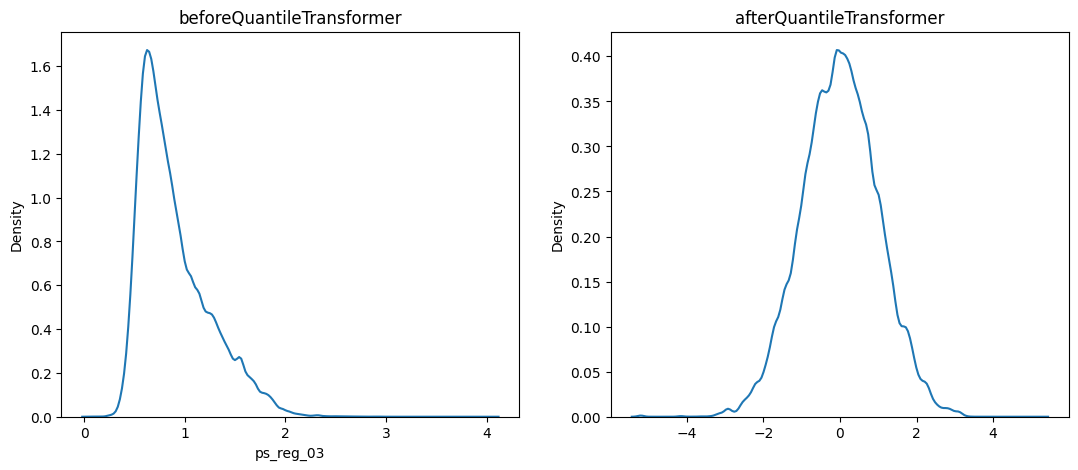

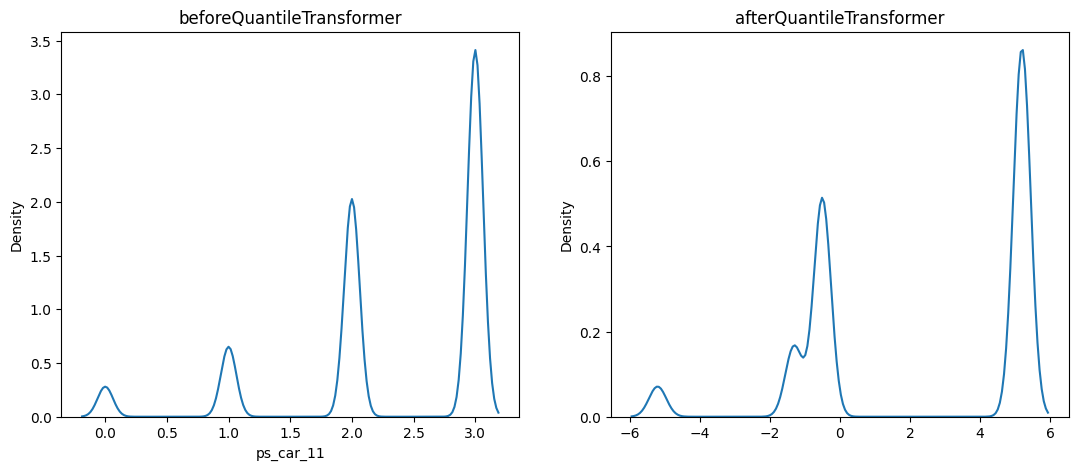

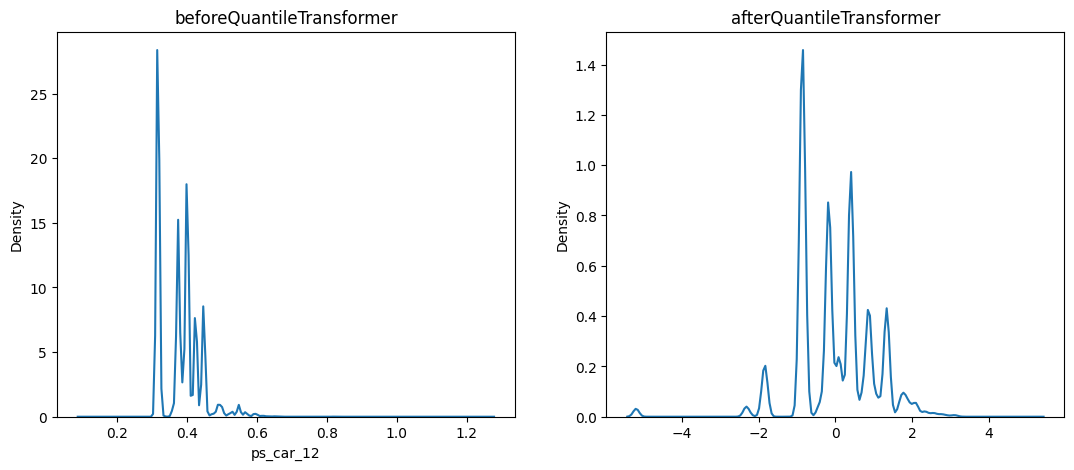

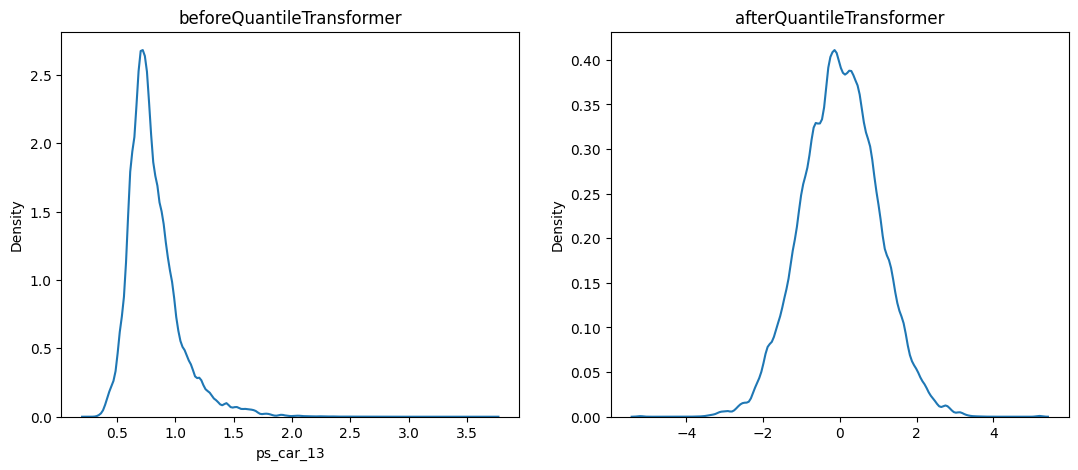

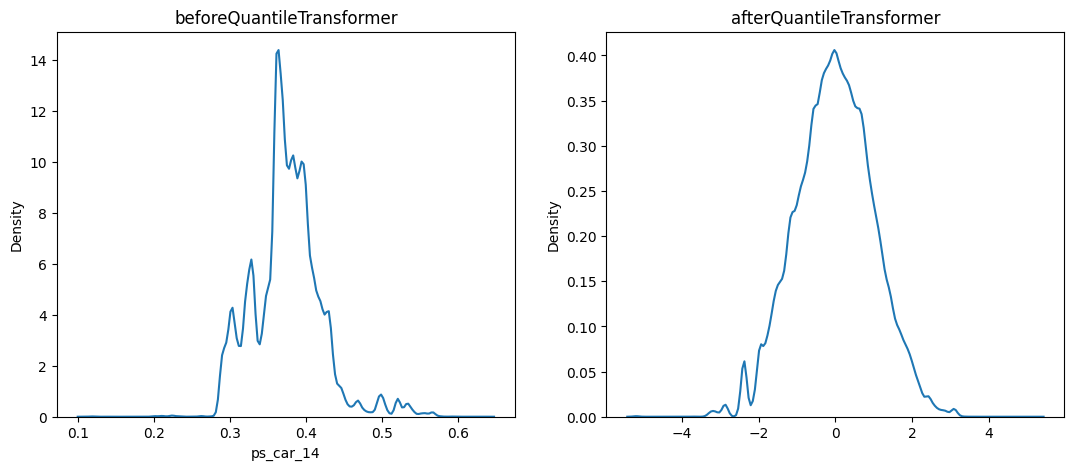

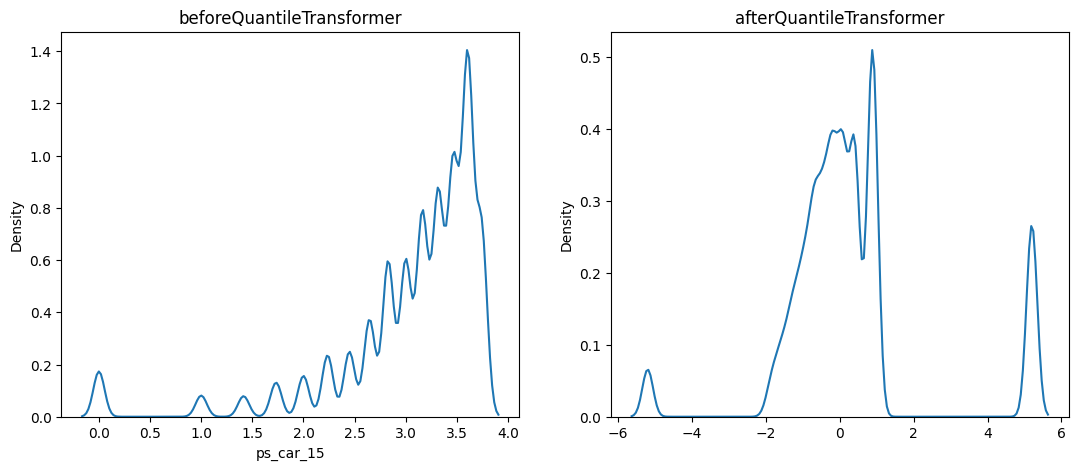

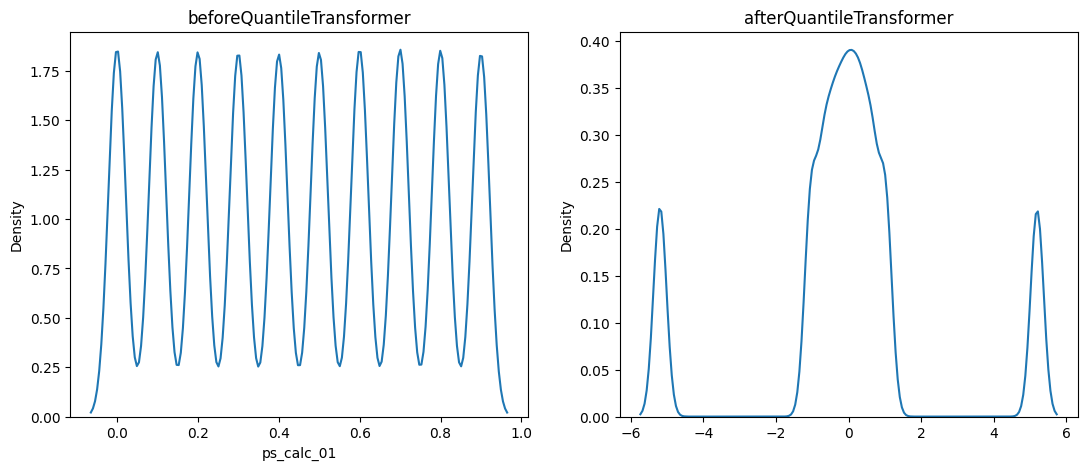

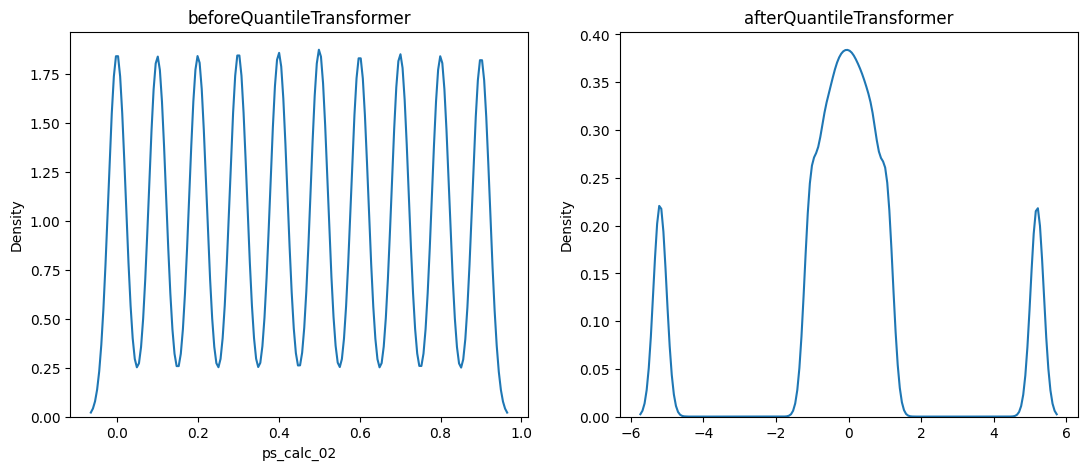

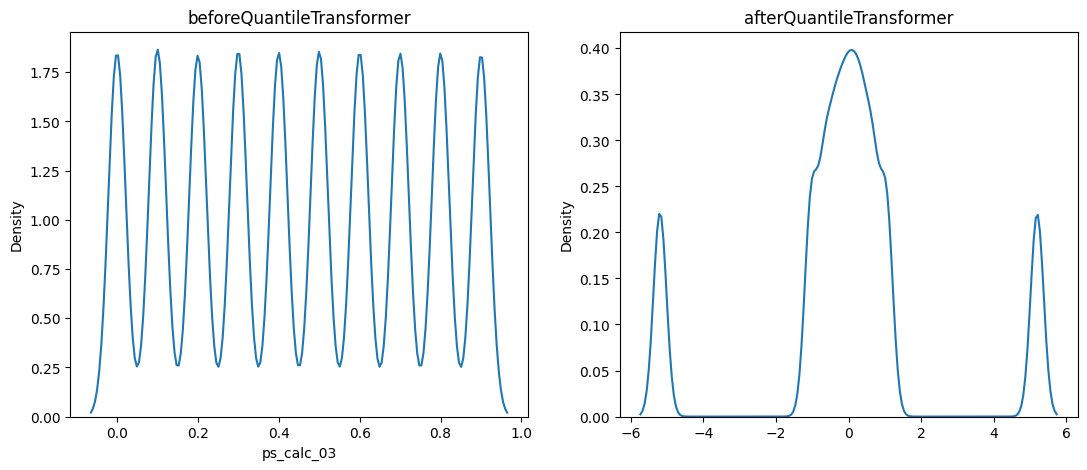

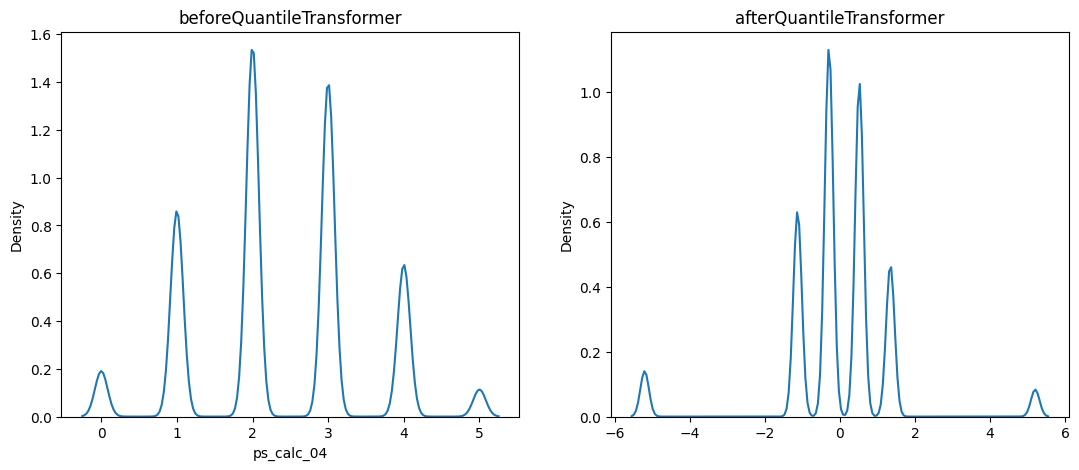

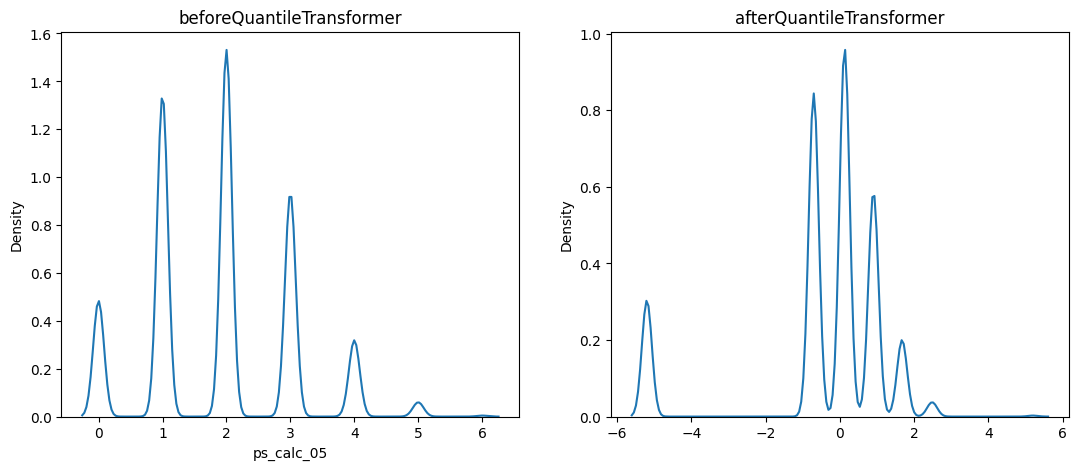

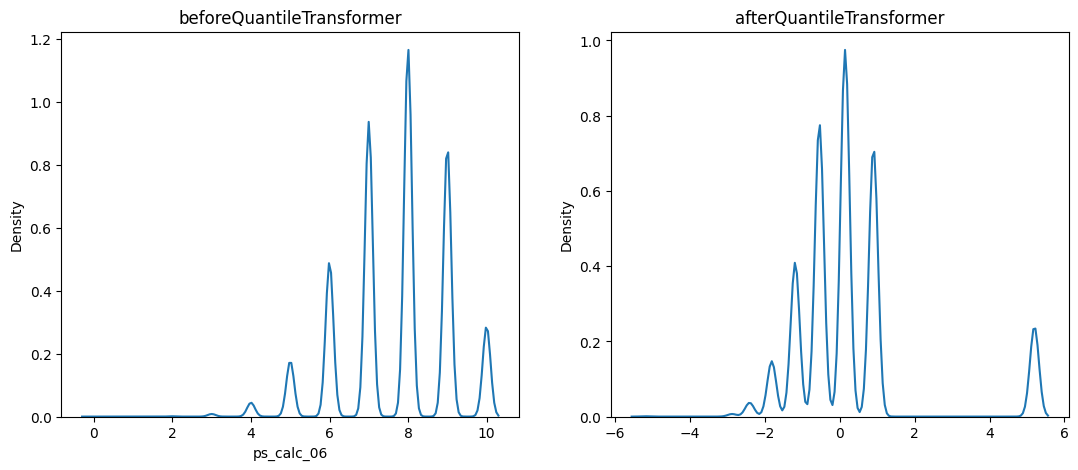

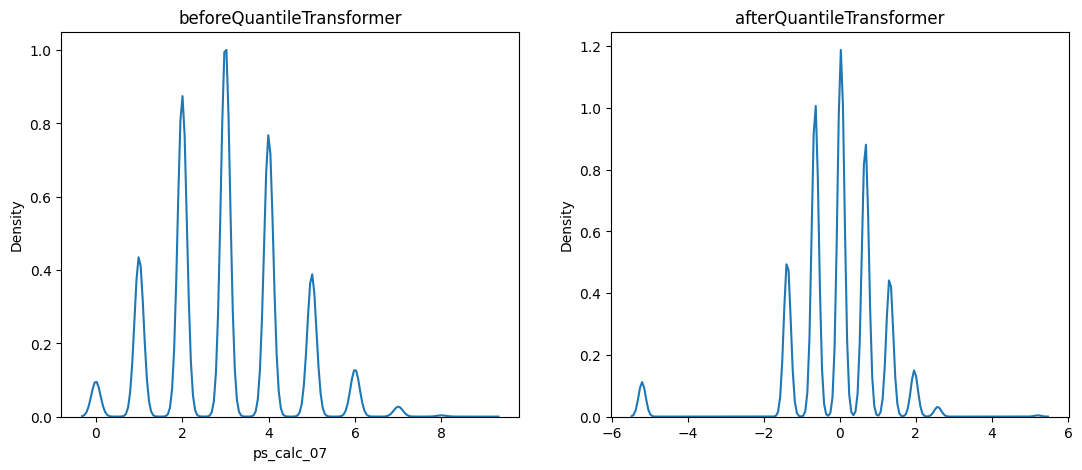

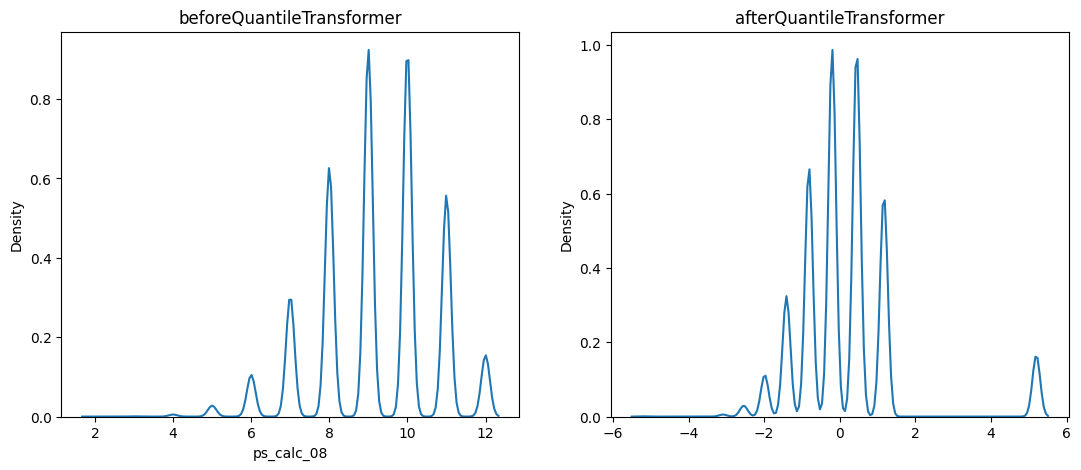

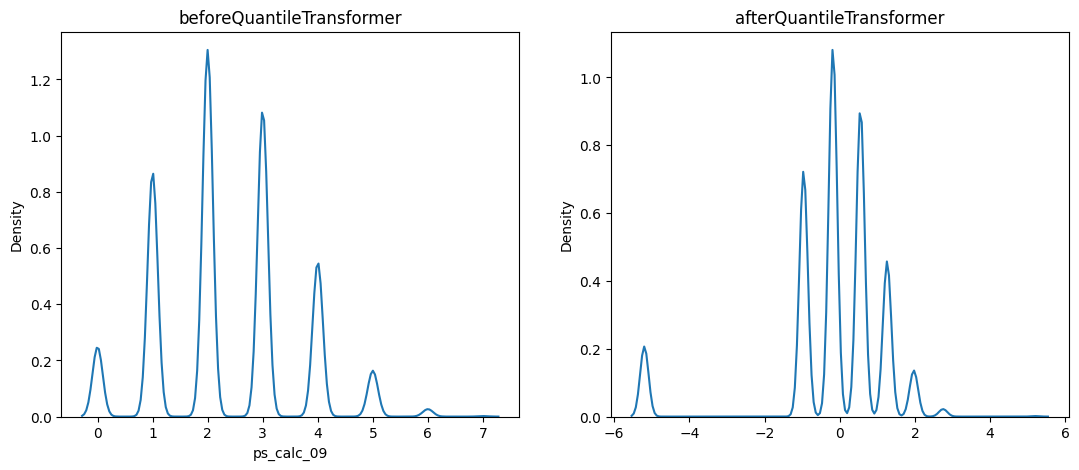

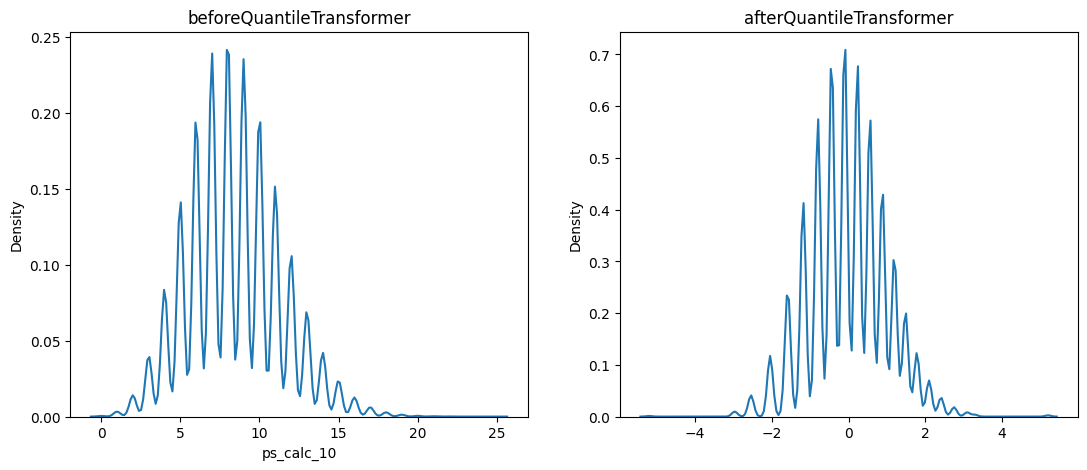

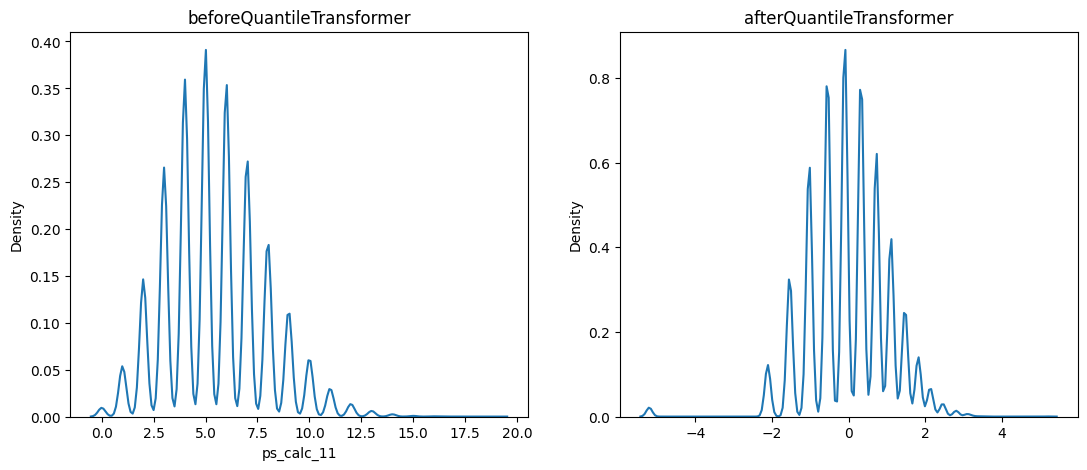

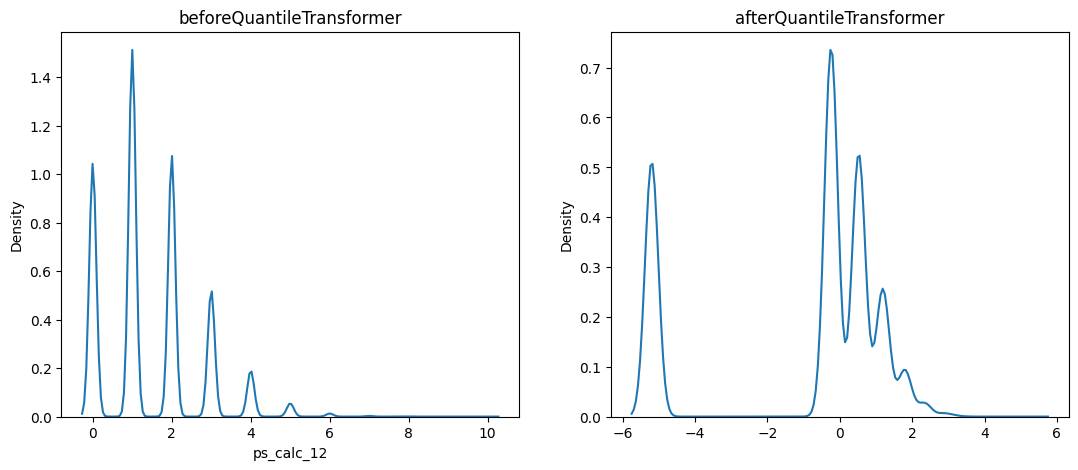

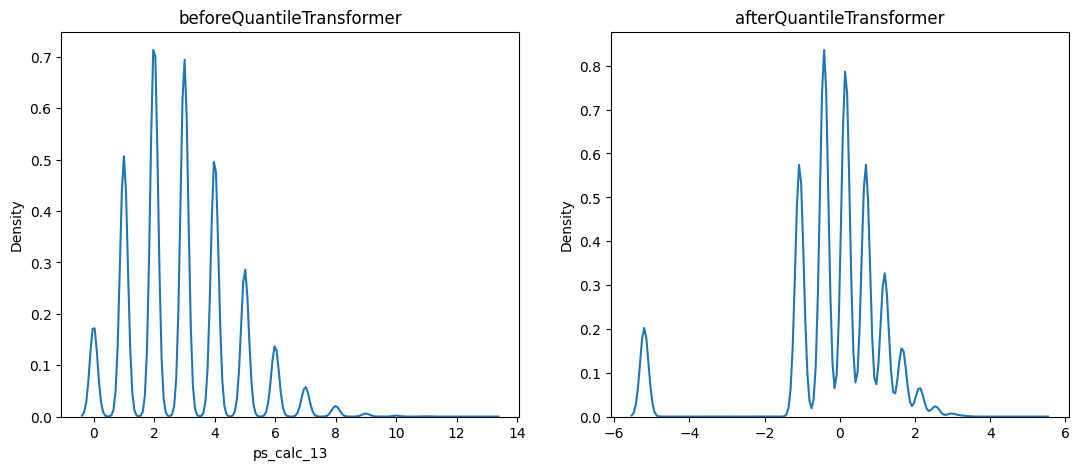

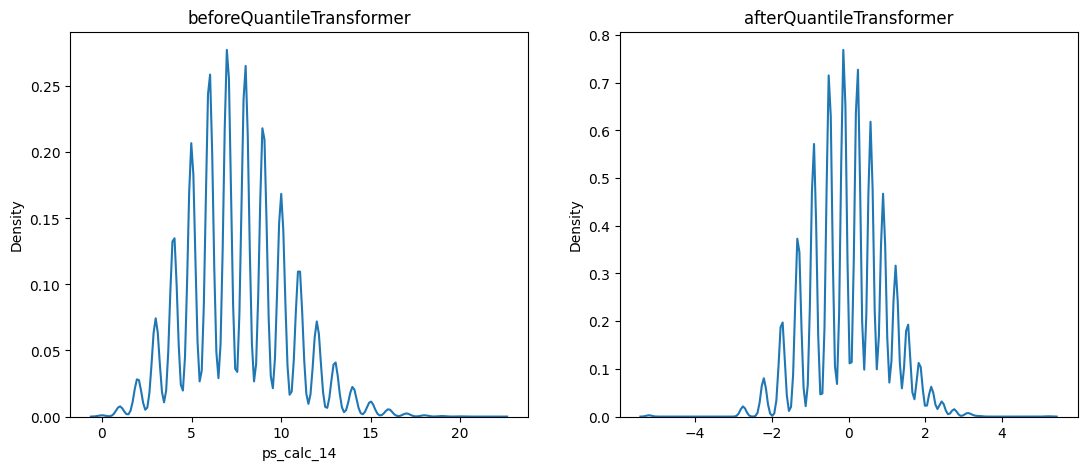

In [ ]:
for col in X_train[continuous_columns]:
  plots(X_train[continuous_columns],col,quantile_scaler)

Quelle: https://www.youtube.com/watch?v=ZrNsGJ81aP8&t=132s

# Bivariate Visualization  

Heatmap

## Target vs Features

In [ ]:
corr_train_target = train_df.corr()['target']

KeyboardInterrupt: 

In [ ]:
corr_train_target_df = corr_train_target.to_frame(name='target')

<Axes: >

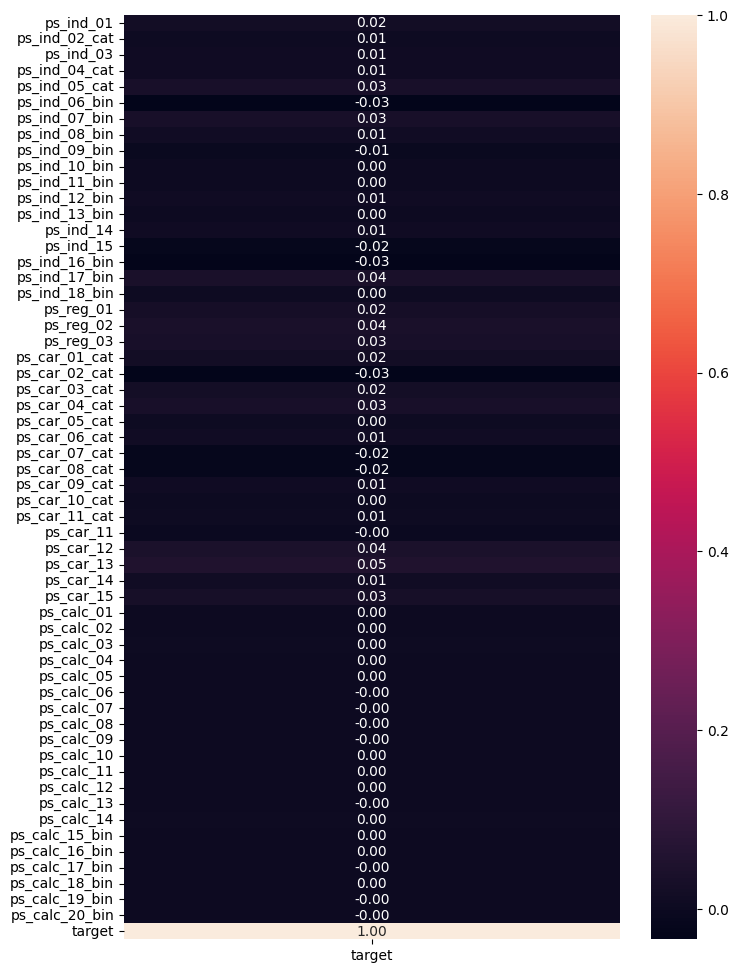

In [ ]:
# sortiert nach Korrelation s
plt.figure(figsize=(8,12))
sns.heatmap(corr_train_target_df,annot=True,fmt=".2f",annot_kws={"size": 10})

# Categorical und continous trennen

##Features vs Features

### Continous Features

In [ ]:
corr_train_cont_features=X_train[continuous_columns].corr()

<Axes: >

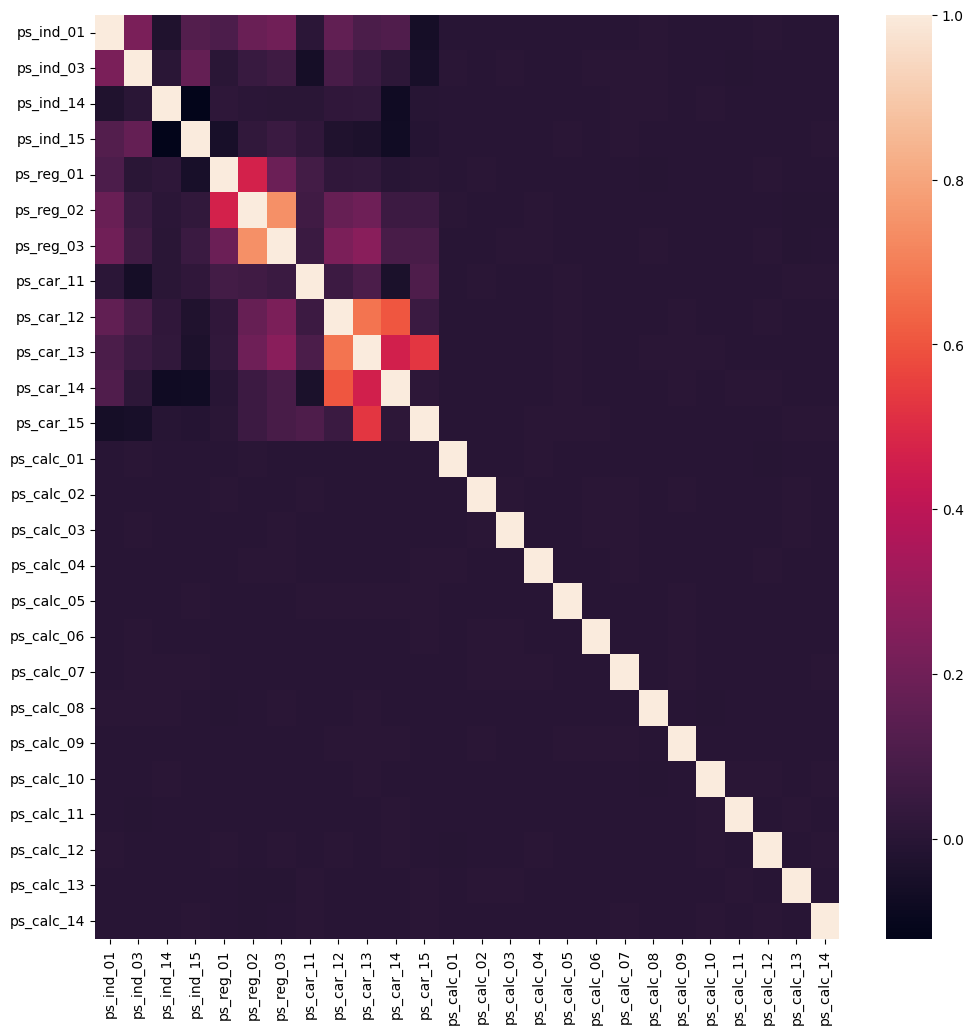

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(corr_train_cont_features)

##Values of the Heatmap

In [ ]:
for column in corr_train_features.columns:
    for row in corr_train_features.index:
        if column != row and abs(corr_train_features.loc[row, column]) > 0.1:
            print(f'{column} and {row} have the correlation {corr_train_features.loc[row, column]}')


ps_ind_01 and ps_ind_03 have the correlation 0.22466785355317298
ps_ind_01 and ps_ind_06_bin have the correlation -0.2769184780576734
ps_ind_01 and ps_ind_08_bin have the correlation 0.18853036099887938
ps_ind_01 and ps_ind_09_bin have the correlation 0.1612428376805018
ps_ind_01 and ps_ind_15 have the correlation 0.1237317775702416
ps_ind_01 and ps_ind_17_bin have the correlation 0.10176601218353323
ps_ind_01 and ps_ind_18_bin have the correlation -0.11357590772875105
ps_ind_01 and ps_reg_01 have the correlation 0.10262167476921995
ps_ind_01 and ps_reg_02 have the correlation 0.18288734192653516
ps_ind_01 and ps_reg_03 have the correlation 0.20197231796376613
ps_ind_01 and ps_car_02_cat have the correlation -0.1163865605052321
ps_ind_01 and ps_car_03_cat have the correlation 0.20077484415318633
ps_ind_01 and ps_car_05_cat have the correlation 0.20006275729894502
ps_ind_01 and ps_car_08_cat have the correlation 0.13807289492174374
ps_ind_01 and ps_car_09_cat have the correlation -0.103

###Categorical Features

In [ ]:
import scipy.stats as stats

categorical_columns = categorical_features.columns
results = []

for i in range(len(categorical_columns)):
    for j in range(i + 1, len(categorical_columns)):
        feature1 = categorical_columns[i]
        feature2 = categorical_columns[j]

        contingency_table = pd.crosstab(X_train[feature1], X_train[feature2])

        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

        results.append({
            'Feature1': feature1,
            'Feature2': feature2,
            'Chi-square Statistic': chi2,
            'P-value': p,
            'Degrees of Freedom': dof,
            'Expected Counts': expected
        })

results_df = pd.DataFrame(results)


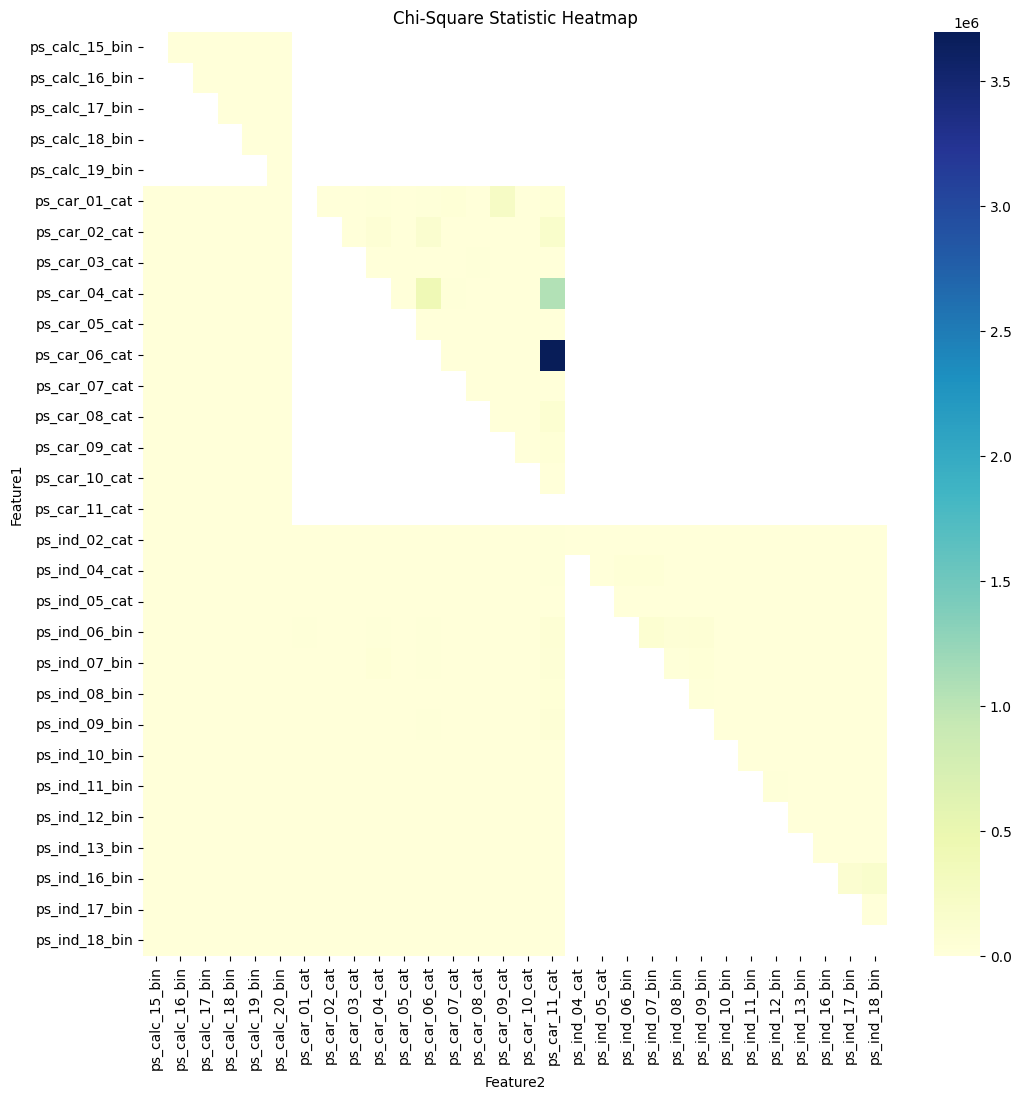

In [ ]:
heatmap_data = results_df.pivot(index='Feature1', columns='Feature2', values='Chi-square Statistic')

# Erstellen der Heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(heatmap_data, cmap='YlGnBu', vmin=0, vmax=heatmap_data.max().max())
plt.title('Chi-Square Statistic Heatmap')
plt.show()

True

**ps_car_13 höchste Korrelation mit 0.05**

## Metric vs Target


Int Features


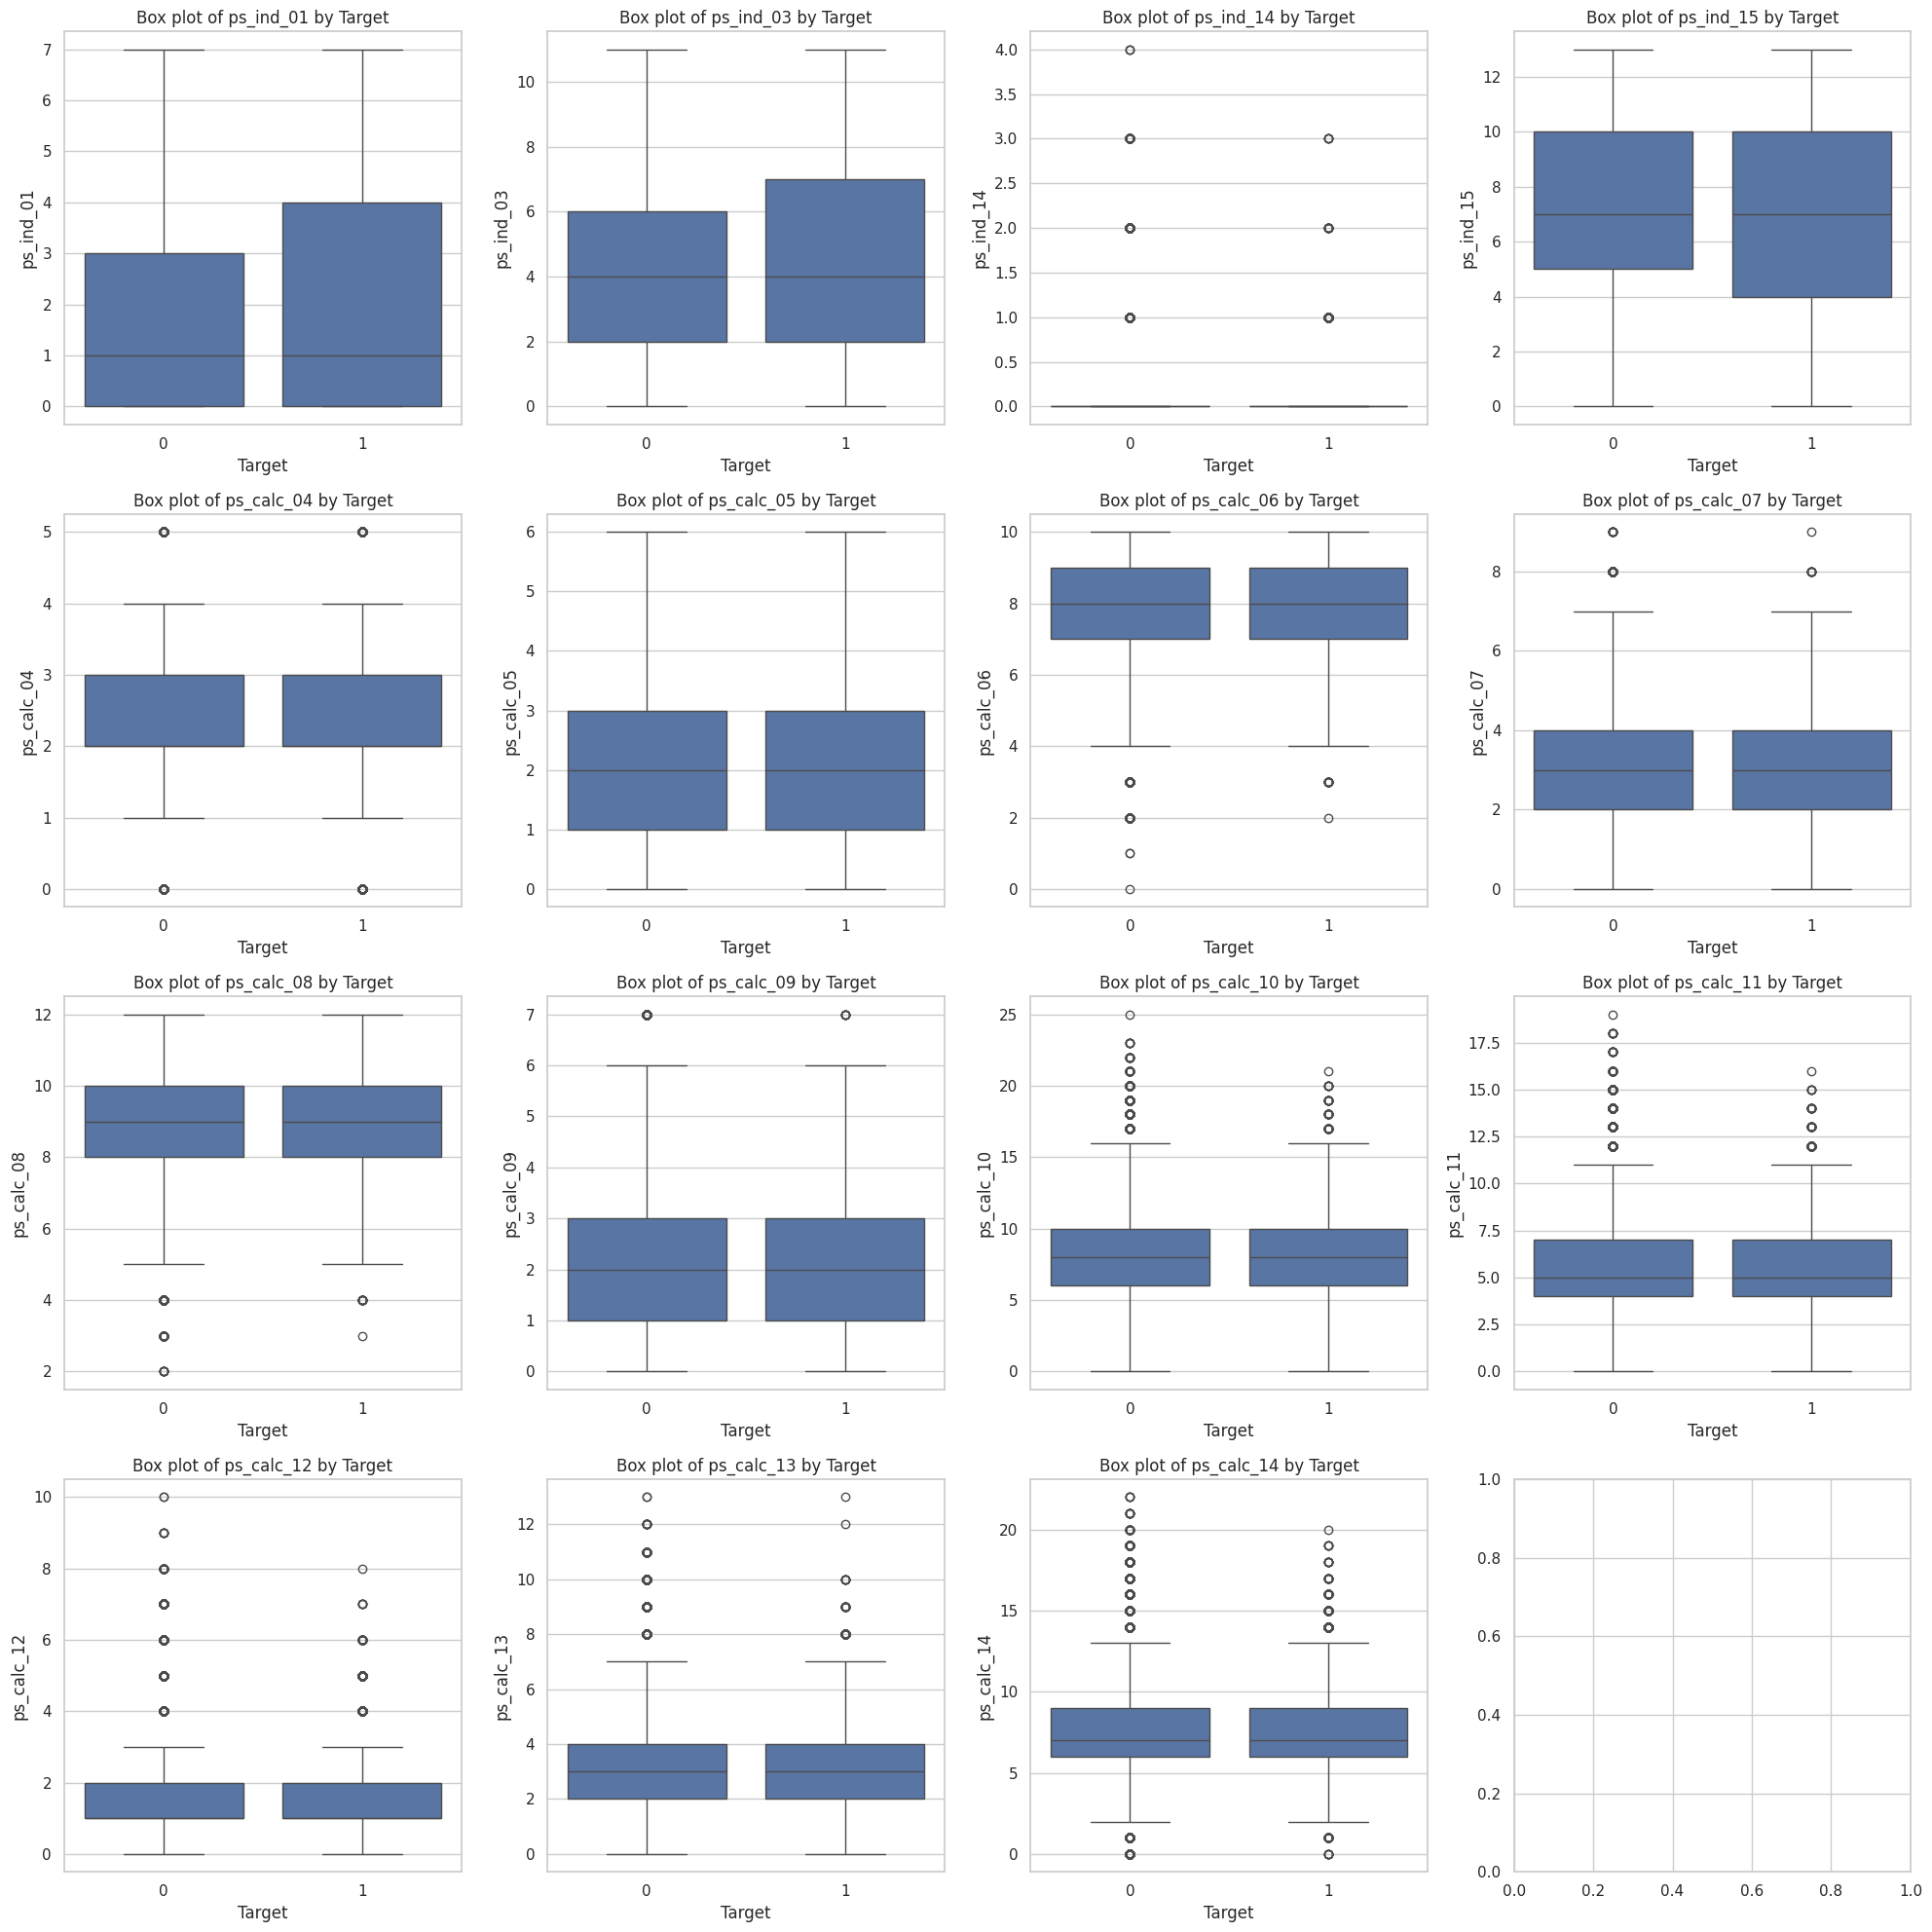

In [ ]:
#Anzahl der Subplots
num_cont = len(continuous_int_features.columns)
num_cols = 4
num_rows = math.ceil(num_cont/num_cols)

#Anpassen der Subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

#Daten in die Plots einfügen
for i,feature in enumerate(continuous_int_features.columns):
    sns.boxplot(ax=axes[i],x=y_train, y=X_train[feature])
    axes[i].set_title(f'Box plot of {feature} by Target')
    axes[i].set_xlabel('Target')
    axes[i].set_ylabel(feature)

#Plots anzeigen lassen
plt.tight_layout()
plt.show()

Float Features

In [ ]:
#Anzahl der Subplots
num_cont = len(continuous_float_features.columns)
num_cols = 4
num_rows = math.ceil(num_cont/num_cols)

#Anpassen der Subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

#Daten in die Plots einfügen
for i,feature in enumerate(continuous_float_features.columns):
    sns.boxplot(ax=axes[i],x=y_train, y=X_train[feature])
    axes[i].set_title(f'Box plot of {feature} by Target')
    axes[i].set_xlabel('Target')
    axes[i].set_ylabel(feature)

#Plots anzeigen lassen
plt.tight_layout()
plt.show()

# Basismodell

## Bibliotheken und Preprocessing

In [14]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, auc, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from category_encoders import TargetEncoder

preprocessing

In [16]:
categorical_cols = metadata_df[(metadata_df['Category'] == 'categorical') & (metadata_df['Feature Name'] != 'target')]['Feature Name'].tolist()
binary_cols = metadata_df[(metadata_df['Category'] == 'binary') & (metadata_df['Feature Name'] != 'target')]['Feature Name'].tolist()
continuous_cols = metadata_df[(metadata_df['Category'] == 'continuous') & (metadata_df['Feature Name'] != 'target')]['Feature Name'].tolist()


binary should be numerical

In [17]:
for col in binary_cols:
    X_train[col] = X_train[col].astype('category')
    X_val[col] = X_val[col].astype('category')
    X_train[col] = X_train[col].cat.codes
    X_val[col] = X_val[col].cat.codes

y_train = y_train.astype(int)
y_val = y_val.astype(int)

for col in binary_cols:
    X_train_categorical[col] = X_train_categorical[col].astype('category')
    X_val_categorical[col] =  X_val_categorical[col].astype('category')
    X_train_categorical[col] = X_train_categorical[col].cat.codes
    X_val_categorical[col] =  X_val_categorical[col].cat.codes

y_train = y_train.astype(int)
y_val = y_val.astype(int)

NameError: name 'X_train_categorical' is not defined

OneHotEncoder for categorcial

## Pipeline 1: Basis

In [72]:
# Temporal - Na Drop

X_train_original = X_train.copy()

X_train = X_train_original.dropna()
y_train = y_train[X_train.index]

X_val = X_val.dropna()
y_val = y_val[X_val.index]

X_train = pd.DataFrame(X_train)
X_val = pd.DataFrame(X_val)

In [63]:
categorical_transformer = OneHotEncoder(drop=None, handle_unknown='ignore')

In [64]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('bin', 'passthrough', binary_cols),
        ('cont', 'passthrough', continuous_cols)
    ]
)

In [65]:
# Logistische Regression
pipeline_LR = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=10_000))
])
pipeline_LR

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ps_ind_02_cat',
                                                   'ps_ind_04_cat',
                                                   'ps_ind_05_cat',
                                                   'ps_car_01_cat',
                                                   'ps_car_02_cat',
                                                   'ps_car_03_cat',
                                                   'ps_car_04_cat',
                                                   'ps_car_05_cat',
                                                   'ps_car_06_cat',
                                                   'ps_car_07_cat',
                                                   'ps_car_08_cat',
                                                   'ps_car_09_cat',
                                                   'ps_car_10_cat',
                                                   'ps_car_11_cat']),
                                                 ('bin', 'passt...
                                                   'ps_ind_14', 'ps_ind_15',
                                                   'ps_reg_01', 'ps_reg_02',
                                                   'ps_reg_03', 'ps_car_11',
                                                   'ps_car_12', 'ps_car_13',
                                                   'ps_car_14', 'ps_car_15',
                                                   'ps_calc_01', 'ps_calc_02',
                                                   'ps_calc_03', 'ps_calc_04',
                                                   'ps_calc_05', 'ps_calc_06',
                                                   'ps_calc_07', 'ps_calc_08',
                                                   'ps_calc_09', 'ps_calc_10',
                                                   'ps_calc_11', 'ps_calc_12',
                                                   'ps_calc_13',
                                                   'ps_calc_14'])])),
                ('classifier', LogisticRegression(max_iter=10000))])

In [66]:
# Random Forest
# Reasonable Defaults

pipeline_RF = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=4,
        max_features='sqrt',
        random_state=42
    ))
])
pipeline_RF

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ps_ind_02_cat',
                                                   'ps_ind_04_cat',
                                                   'ps_ind_05_cat',
                                                   'ps_car_01_cat',
                                                   'ps_car_02_cat',
                                                   'ps_car_03_cat',
                                                   'ps_car_04_cat',
                                                   'ps_car_05_cat',
                                                   'ps_car_06_cat',
                                                   'ps_car_07_cat',
                                                   'ps_car_08_cat',
                                                   'ps_car_09_cat',
                                                   'ps_car_10_cat',
                                                   'ps_car_11_cat']),
                                                 ('bin', 'passt...
                                                   'ps_reg_03', 'ps_car_11',
                                                   'ps_car_12', 'ps_car_13',
                                                   'ps_car_14', 'ps_car_15',
                                                   'ps_calc_01', 'ps_calc_02',
                                                   'ps_calc_03', 'ps_calc_04',
                                                   'ps_calc_05', 'ps_calc_06',
                                                   'ps_calc_07', 'ps_calc_08',
                                                   'ps_calc_09', 'ps_calc_10',
                                                   'ps_calc_11', 'ps_calc_12',
                                                   'ps_calc_13',
                                                   'ps_calc_14'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=4,
                                        min_samples_split=10,
                                        random_state=42))])

fit

In [67]:
pipeline_LR.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ps_ind_02_cat',
                                                   'ps_ind_04_cat',
                                                   'ps_ind_05_cat',
                                                   'ps_car_01_cat',
                                                   'ps_car_02_cat',
                                                   'ps_car_03_cat',
                                                   'ps_car_04_cat',
                                                   'ps_car_05_cat',
                                                   'ps_car_06_cat',
                                                   'ps_car_07_cat',
                                                   'ps_car_08_cat',
                                                   'ps_car_09_cat',
                                                   'ps_car_10_cat',
                                                   'ps_car_11_cat']),
                                                 ('bin', 'passt...
                                                   'ps_ind_14', 'ps_ind_15',
                                                   'ps_reg_01', 'ps_reg_02',
                                                   'ps_reg_03', 'ps_car_11',
                                                   'ps_car_12', 'ps_car_13',
                                                   'ps_car_14', 'ps_car_15',
                                                   'ps_calc_01', 'ps_calc_02',
                                                   'ps_calc_03', 'ps_calc_04',
                                                   'ps_calc_05', 'ps_calc_06',
                                                   'ps_calc_07', 'ps_calc_08',
                                                   'ps_calc_09', 'ps_calc_10',
                                                   'ps_calc_11', 'ps_calc_12',
                                                   'ps_calc_13',
                                                   'ps_calc_14'])])),
                ('classifier', LogisticRegression(max_iter=10000))])

In [68]:
pipeline_RF.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ps_ind_02_cat',
                                                   'ps_ind_04_cat',
                                                   'ps_ind_05_cat',
                                                   'ps_car_01_cat',
                                                   'ps_car_02_cat',
                                                   'ps_car_03_cat',
                                                   'ps_car_04_cat',
                                                   'ps_car_05_cat',
                                                   'ps_car_06_cat',
                                                   'ps_car_07_cat',
                                                   'ps_car_08_cat',
                                                   'ps_car_09_cat',
                                                   'ps_car_10_cat',
                                                   'ps_car_11_cat']),
                                                 ('bin', 'passt...
                                                   'ps_reg_03', 'ps_car_11',
                                                   'ps_car_12', 'ps_car_13',
                                                   'ps_car_14', 'ps_car_15',
                                                   'ps_calc_01', 'ps_calc_02',
                                                   'ps_calc_03', 'ps_calc_04',
                                                   'ps_calc_05', 'ps_calc_06',
                                                   'ps_calc_07', 'ps_calc_08',
                                                   'ps_calc_09', 'ps_calc_10',
                                                   'ps_calc_11', 'ps_calc_12',
                                                   'ps_calc_13',
                                                   'ps_calc_14'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=4,
                                        min_samples_split=10,
                                        random_state=42))])

Evaluierung

evaluate (val data)

In [69]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, auc, confusion_matrix, classification_report

#  Logistic Regression model
y_pred_LR = pipeline_LR.predict(X_val)
y_prob_LR = pipeline_LR.predict_proba(X_val)[:, 1]

accuracy_LR = accuracy_score(y_val, y_pred_LR)
roc_auc_LR = roc_auc_score(y_val, y_prob_LR)
precision_LR, recall_LR, _ = precision_recall_curve(y_val, y_prob_LR)
pr_auc_LR = auc(recall_LR, precision_LR)
conf_matrix_LR = confusion_matrix(y_val, y_pred_LR)
report_LR = classification_report(y_val, y_pred_LR)

print("Logistic Regression Model:")
print("Accuracy:", accuracy_LR)
print("ROC AUC:", roc_auc_LR)
print("PR AUC:", pr_auc_LR)
print("Confusion Matrix:\n", conf_matrix_LR)
print("Classification Report:\n", report_LR)
print("\n" + "="*50 + "\n")


#  Random Forest
y_pred_RF = pipeline_RF.predict(X_val)
y_prob_RF = pipeline_RF.predict_proba(X_val)[:, 1]

accuracy_RF = accuracy_score(y_val, y_pred_RF)
roc_auc_RF = roc_auc_score(y_val, y_prob_RF)
precision_RF, recall_RF, _ = precision_recall_curve(y_val, y_prob_RF)
pr_auc_RF = auc(recall_RF, precision_RF)
conf_matrix_RF = confusion_matrix(y_val, y_pred_RF)
report_RF = classification_report(y_val, y_pred_RF)

print("Random Forest Model:")
print("Accuracy:", accuracy_RF)
print("ROC AUC:", roc_auc_RF)
print("PR AUC:", pr_auc_RF)
print("Confusion Matrix:\n", conf_matrix_RF)
print("Classification Report:\n", report_RF)


Logistic Regression Model:
Accuracy: 0.4612616426756986
ROC AUC: 0.6103292436909487
PR AUC: 0.06550148372576407
Confusion Matrix:
 [[8103 9949]
 [ 231  613]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.45      0.61     18052
           1       0.06      0.73      0.11       844

    accuracy                           0.46     18896
   macro avg       0.52      0.59      0.36     18896
weighted avg       0.93      0.46      0.59     18896



Random Forest Model:
Accuracy: 0.9553344623200677
ROC AUC: 0.5874261480525454
PR AUC: 0.061118392117121854
Confusion Matrix:
 [[18052     0]
 [  844     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     18052
           1       0.00      0.00      0.00       844

    accuracy                           0.96     18896
   macro avg       0.48      0.50      0.49     18896
weighted avg       0.91      0.96   

c:\Users\Dennis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dennis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dennis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

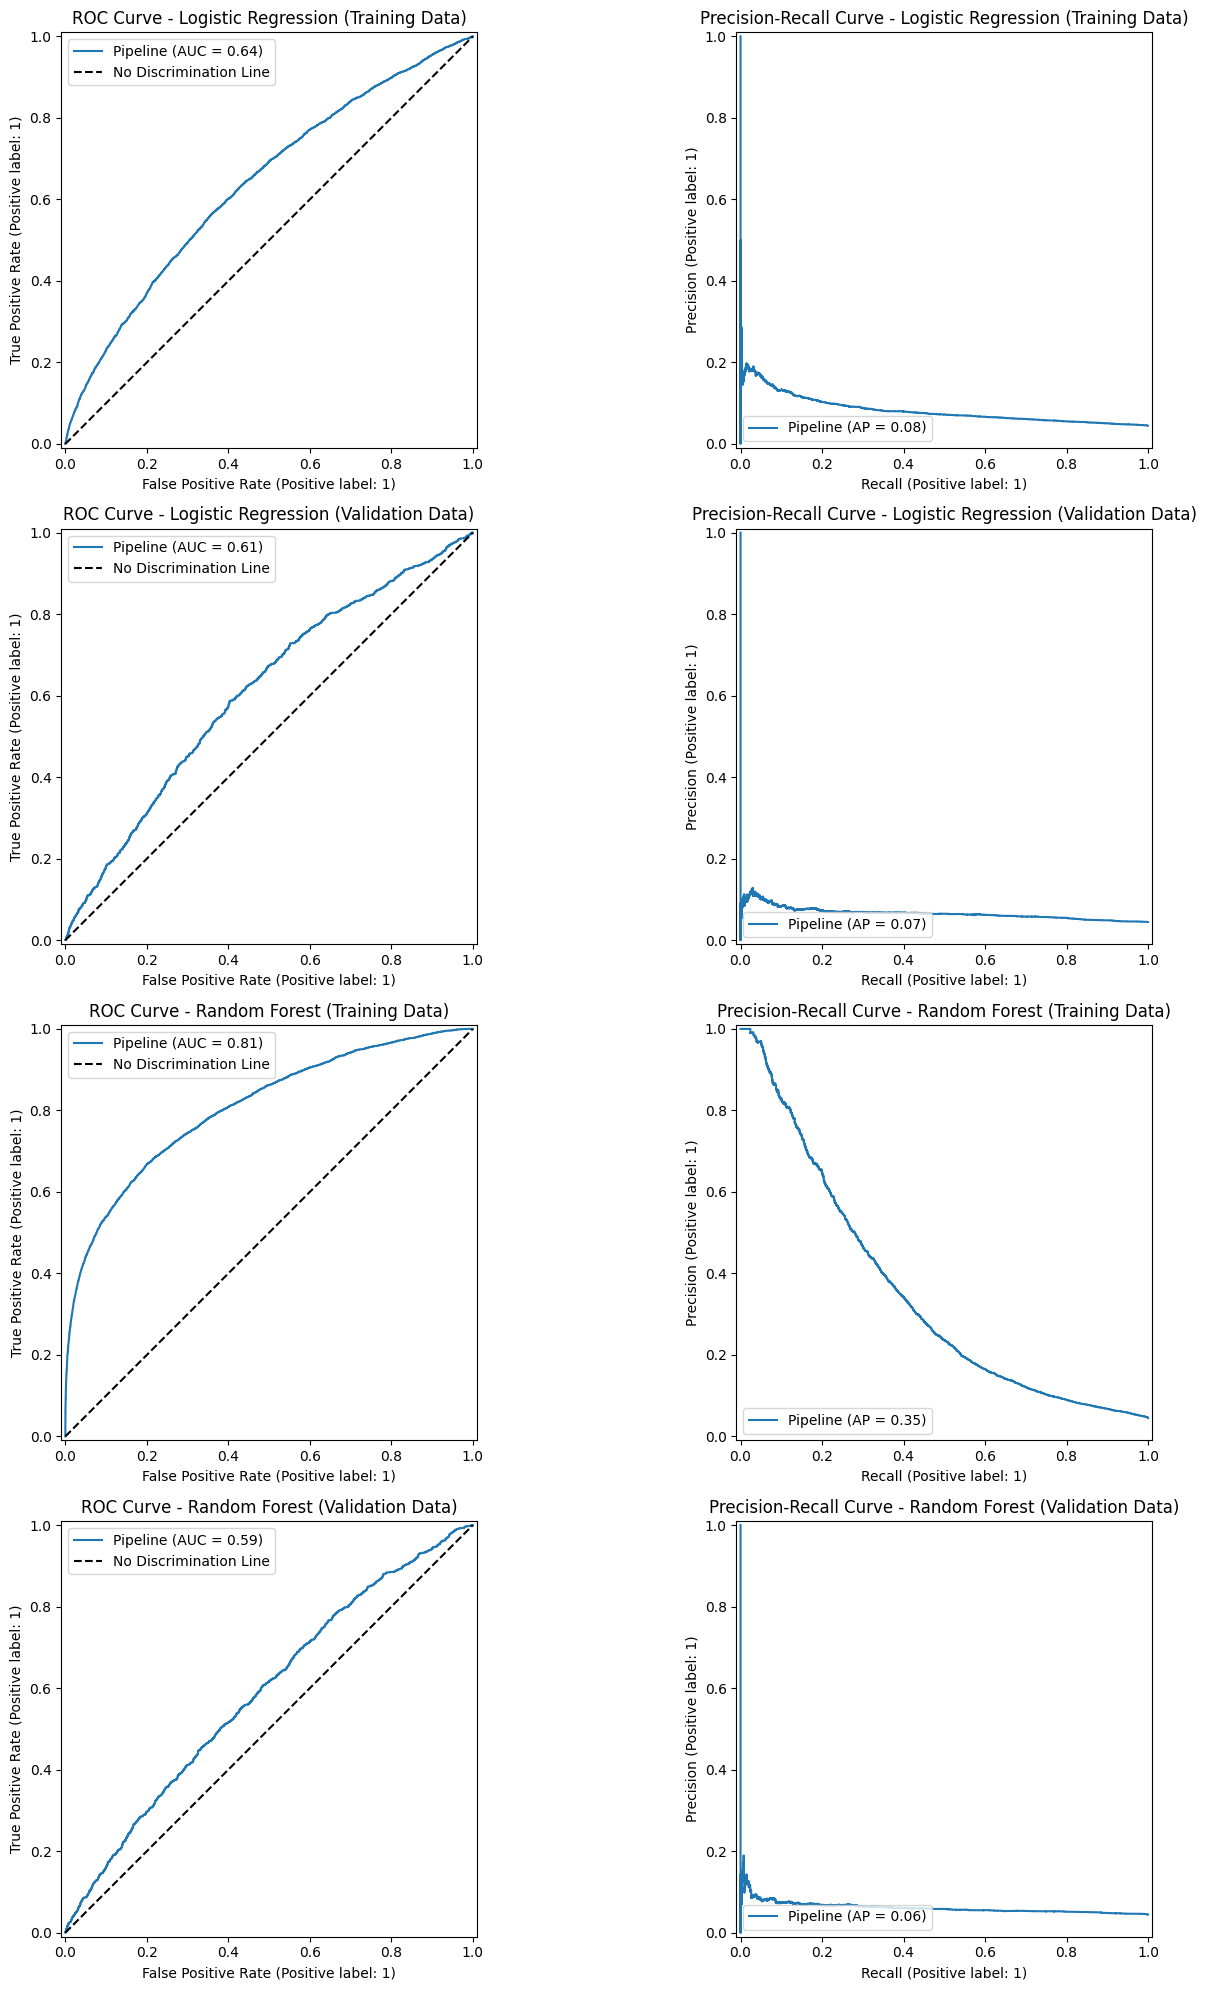

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(15, 20))

# Logistic Regression
RocCurveDisplay.from_estimator(pipeline_LR, X_train, y_train, ax=ax1)
ax1.set_title("ROC Curve - Logistic Regression (Training Data)")
ax1.plot([0, 1], [0, 1], 'k--', label='No Discrimination Line')
ax1.legend()

PrecisionRecallDisplay.from_estimator(pipeline_LR, X_train, y_train, ax=ax2)
ax2.set_title("Precision-Recall Curve - Logistic Regression (Training Data)")

RocCurveDisplay.from_estimator(pipeline_LR, X_val, y_val, ax=ax3)
ax3.set_title("ROC Curve - Logistic Regression (Validation Data)")
ax3.plot([0, 1], [0, 1], 'k--', label='No Discrimination Line')
ax3.legend()

PrecisionRecallDisplay.from_estimator(pipeline_LR, X_val, y_val, ax=ax4)
ax4.set_title("Precision-Recall Curve - Logistic Regression (Validation Data)")

# Random Forest
RocCurveDisplay.from_estimator(pipeline_RF, X_train, y_train, ax=ax5)
ax5.set_title("ROC Curve - Random Forest (Training Data)")
ax5.plot([0, 1], [0, 1], 'k--', label='No Discrimination Line')
ax5.legend()

PrecisionRecallDisplay.from_estimator(pipeline_RF, X_train, y_train, ax=ax6)
ax6.set_title("Precision-Recall Curve - Random Forest (Training Data)")

RocCurveDisplay.from_estimator(pipeline_RF, X_val, y_val, ax=ax7)
ax7.set_title("ROC Curve - Random Forest (Validation Data)")
ax7.plot([0, 1], [0, 1], 'k--', label='No Discrimination Line')
ax7.legend()

PrecisionRecallDisplay.from_estimator(pipeline_RF, X_val, y_val, ax=ax8)
ax8.set_title("Precision-Recall Curve - Random Forest (Validation Data)")

plt.tight_layout()
plt.show()


In [71]:
from sklearn.metrics import roc_auc_score

# Logistic Regression
y_prob_LR = pipeline_LR.predict_proba(X_val)[:, 1]
roc_auc_LR = roc_auc_score(y_val, y_prob_LR)
gini_LR = 2 * roc_auc_LR - 1

print("Logistic Regression Model:")
print("ROC AUC:", roc_auc_LR)
print("Normalized Gini Coefficient:", gini_LR)
print("\n" + "="*50 + "\n")

# Random Forest
y_prob_RF = pipeline_RF.predict_proba(X_val)[:, 1]
roc_auc_RF = roc_auc_score(y_val, y_prob_RF)
gini_RF = 2 * roc_auc_RF - 1

print("Random Forest Model:")
print("ROC AUC:", roc_auc_RF)
print("Normalized Gini Coefficient:", gini_RF)


Logistic Regression Model:
ROC AUC: 0.6103292436909487
Normalized Gini Coefficient: 0.2206584873818973


Random Forest Model:
ROC AUC: 0.5874261480525454
Normalized Gini Coefficient: 0.1748522961050909


# Feauture Engineering

## Anpassung Kategoriale Variablen Kardinalitäten

Neues X Train und X Val mit bestem Hyperparameter: 0.16 (siehe EDA 2)

X_train (erste 5 Zeilen):
       ps_car_11_cat
395927           104
345312           104
488480         Other
580242         Other
295540           104

X_val (erste 5 Zeilen):
       ps_car_11_cat
100781         Other
581349         Other
497347         Other
506772         Other
263957         Other

Original Category Counts in X_train:
ps_car_11_cat
104    59579
103    16855
64     15542
87     11945
28      8913
Name: count, dtype: int64

New Category Counts in X_train:
ps_car_11_cat
Other    262794
104       59579
103       16855
64        15542
87        11945
Name: count, dtype: int64

New Category Counts in X_val:
ps_car_11_cat
Other    56373
104      12748
103       3703
64        3360
87        2597
Name: count, dtype: int64


<Axes: title={'center': 'X_val Category Distribution'}, ylabel='count'>

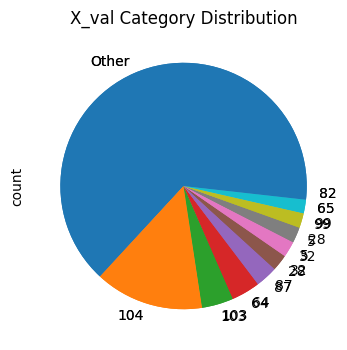

In [20]:
# Kopien der ursprünglichen Datensätze erstellen
X_train_categorical = X_train.copy()
X_val_categorical = X_val.copy()

# Definiere den relativen Schwellenwert 
relative_threshold = 0.016 

# Zähle die Kategorien in den Trainingsdaten
train_category_counts = X_train_categorical['ps_car_11_cat'].value_counts()

# Berechne den Schwellenwert für seltene Kategorien im Trainingsdatensatz
train_threshold_count = relative_threshold * len(X_train_categorical)

# Identifiziere seltene Kategorien im Trainingsdatensatz
train_rare_categories = train_category_counts[train_category_counts < train_threshold_count].index

# Ersetze die ursprüngliche Spalte 'ps_car_11_cat' durch die aggregierte Version im Trainings- und Validierungsdatensatz
X_train_categorical['ps_car_11_cat'] = X_train_categorical['ps_car_11_cat'].apply(
    lambda x: 'Other' if x in train_rare_categories else x
)

X_val_categorical['ps_car_11_cat'] = X_val_categorical['ps_car_11_cat'].apply(
    lambda x: 'Other' if x in train_rare_categories else x  # Gleiche seltene Kategorien wie im Training verwenden
)

# Ausgabe der neuen Spalten zur Überprüfung
print("X_train (erste 5 Zeilen):")
print(X_train_categorical[['ps_car_11_cat']].head())
print("\nX_val (erste 5 Zeilen):")
print(X_val_categorical[['ps_car_11_cat']].head())

# Originale Kategorie-Zählungen und neue Zählungen
print("\nOriginal Category Counts in X_train:")
print(train_category_counts.head())
print("\nNew Category Counts in X_train:")
print(X_train_categorical['ps_car_11_cat'].value_counts().head())

print("\nNew Category Counts in X_val:")
print(X_val_categorical['ps_car_11_cat'].value_counts().head())

# Optional: Pie-Charts zur Visualisierung der neuen Kategorie-Verteilungen
X_train_categorical['ps_car_11_cat'].value_counts().plot.pie(figsize=(4, 4), title='X_train Category Distribution')
X_val_categorical['ps_car_11_cat'].value_counts().plot.pie(figsize=(4, 4), title='X_val Category Distribution')


## Transformer

In [25]:
categorical_transformer_2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [26]:
categorical_transformer_3 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('target', TargetEncoder())
])

In [27]:
continuous_transformer_2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
    ])

In [28]:
continuous_transformer_3 = Pipeline(steps=[
    ('imputer', CustomNumericalImputer(method='mean')),
    ('scaler', MinMaxScaler())
    ])

## Processors

In [29]:
preprocessor_2 = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer_2, categorical_cols),
        ('bin', 'passthrough', binary_cols),
        ('cont', continuous_transformer_2, continuous_cols)
    ]
)

In [30]:
preprocessor_3 = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer_3, categorical_cols),
        ('bin', 'passthrough', binary_cols),
        ('cont', continuous_transformer_2, continuous_cols)
    ]
)

In [31]:
preprocessor_3 = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer_3, categorical_cols),
        ('bin', 'passthrough', binary_cols),
        ('cont', continuous_transformer_3, continuous_cols)
    ]
)

## NA Impuation: Custom Imputer Klassen

Custom Categorical Imputer

In [18]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class CustomCategoricalImputer(BaseEstimator, TransformerMixin):
    def __init__(self, method='most_frequent', fill_value=None):
        self.method = method
        self.fill_value = fill_value
        self.imputer = None

    def fit(self, X, y=None):
        if self.method in ['most_frequent', 'constant']:
            self.imputer = SimpleImputer(strategy=self.method, fill_value=self.fill_value)
            self.imputer.fit(X)
        return self

    def transform(self, X):
        if self.method in ['most_frequent', 'constant']:
            return pd.DataFrame(self.imputer.transform(X), columns=X.columns)
        elif self.method == 'forward_fill':
            return X.ffill()  
        elif self.method == 'backward_fill':
            return X.bfill()  
        else:
            raise ValueError(f"Unsupported method for categorical data: {self.method}")



Custom Continuous Encoder

In [19]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class CustomNumericalImputer(BaseEstimator, TransformerMixin):
    def __init__(self, method='mean'):
        self.method = method
        self.imputer = None

    def fit(self, X, y=None):
        if self.method in ['mean', 'median']:
            self.imputer = SimpleImputer(strategy=self.method)
            self.imputer.fit(X)
        return self

    def transform(self, X):
        if self.method in ['mean', 'median']:
            return pd.DataFrame(self.imputer.transform(X), columns=X.columns)
        elif self.method == 'forward_fill':
            return X.ffill()  
        elif self.method == 'backward_fill':
            return X.bfill()  
        elif self.method == 'linear_interpolation':
            return X.interpolate(method='linear')
        else:
            raise ValueError(f"Unsupported method for numerical data: {self.method}")


## Pipelines

In [38]:
pipeline_LR_3 = Pipeline(steps=[
    ('preprocessor', preprocessor_3),
    ('classifier', LogisticRegression(max_iter=10_000))
])
pipeline_LR_3

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('target',
                                                                   TargetEncoder())]),
                                                  ['ps_ind_02_cat',
                                                   'ps_ind_04_cat',
                                                   'ps_ind_05_cat',
                                                   'ps_car_01_cat',
                                                   'ps_car_02_cat',
                                                   'ps_car_03_cat',
                                                   'ps_car_04_cat',
                                                   'ps_car_05_cat',
                                                   'ps_car_06_cat',
                                                   'ps_car_07_cat',
                                                   'ps_car_08_cat',
                                                   'ps_c...
                                                   'ps_ind_14', 'ps_ind_15',
                                                   'ps_reg_01', 'ps_reg_02',
                                                   'ps_reg_03', 'ps_car_11',
                                                   'ps_car_12', 'ps_car_13',
                                                   'ps_car_14', 'ps_car_15',
                                                   'ps_calc_01', 'ps_calc_02',
                                                   'ps_calc_03', 'ps_calc_04',
                                                   'ps_calc_05', 'ps_calc_06',
                                                   'ps_calc_07', 'ps_calc_08',
                                                   'ps_calc_09', 'ps_calc_10',
                                                   'ps_calc_11', 'ps_calc_12',
                                                   'ps_calc_13',
                                                   'ps_calc_14'])])),
                ('classifier', LogisticRegression(max_iter=10000))])

In [39]:
pipeline_RF = Pipeline(steps=[
    ('preprocessor', preprocessor_2),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=4,
        max_features='sqrt',
        random_state=42
    ))
])
pipeline_RF

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ps_ind_02_cat',
                                                   'ps_ind_04_cat',
                                                   'ps_ind_05_cat',
                                                   'ps_car_01_cat',
                                                   'ps_car_02_cat',
                                                   'ps_car_03_cat',
                                                   'ps_car_04_cat',
                                                   'ps_car_05_cat',
                                                   'ps_car_06_cat',
                                                   'ps_car_07_cat...
                                                   'ps_reg_03', 'ps_car_11',
                                                   'ps_car_12', 'ps_car_13',
                                                   'ps_car_14', 'ps_car_15',
                                                   'ps_calc_01', 'ps_calc_02',
                                                   'ps_calc_03', 'ps_calc_04',
                                                   'ps_calc_05', 'ps_calc_06',
                                                   'ps_calc_07', 'ps_calc_08',
                                                   'ps_calc_09', 'ps_calc_10',
                                                   'ps_calc_11', 'ps_calc_12',
                                                   'ps_calc_13',
                                                   'ps_calc_14'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=4,
                                        min_samples_split=10,
                                        random_state=42))])

In [40]:
pipeline_RF_2 = Pipeline(steps=[
    ('preprocessor', preprocessor_2),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=4,
        max_features='sqrt',
        random_state=42
    ))
])
pipeline_RF_2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ps_ind_02_cat',
                                                   'ps_ind_04_cat',
                                                   'ps_ind_05_cat',
                                                   'ps_car_01_cat',
                                                   'ps_car_02_cat',
                                                   'ps_car_03_cat',
                                                   'ps_car_04_cat',
                                                   'ps_car_05_cat',
                                                   'ps_car_06_cat',
                                                   'ps_car_07_cat...
                                                   'ps_reg_03', 'ps_car_11',
                                                   'ps_car_12', 'ps_car_13',
                                                   'ps_car_14', 'ps_car_15',
                                                   'ps_calc_01', 'ps_calc_02',
                                                   'ps_calc_03', 'ps_calc_04',
                                                   'ps_calc_05', 'ps_calc_06',
                                                   'ps_calc_07', 'ps_calc_08',
                                                   'ps_calc_09', 'ps_calc_10',
                                                   'ps_calc_11', 'ps_calc_12',
                                                   'ps_calc_13',
                                                   'ps_calc_14'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=4,
                                        min_samples_split=10,
                                        random_state=42))])

In [41]:
# Random Forest
# Reasonable Defaults

pipeline_RF_3 = Pipeline(steps=[
    ('preprocessor', preprocessor_3),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=4,
        max_features='sqrt',
        random_state=42
    ))
])
pipeline_RF_3

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('target',
                                                                   TargetEncoder())]),
                                                  ['ps_ind_02_cat',
                                                   'ps_ind_04_cat',
                                                   'ps_ind_05_cat',
                                                   'ps_car_01_cat',
                                                   'ps_car_02_cat',
                                                   'ps_car_03_cat',
                                                   'ps_car_04_cat',
                                                   'ps_car_05_cat',
                                                   'ps_car_06_cat',
                                                   'ps_car_07_cat',
                                                   'ps_car_08_cat',
                                                   'ps_c...
                                                   'ps_reg_03', 'ps_car_11',
                                                   'ps_car_12', 'ps_car_13',
                                                   'ps_car_14', 'ps_car_15',
                                                   'ps_calc_01', 'ps_calc_02',
                                                   'ps_calc_03', 'ps_calc_04',
                                                   'ps_calc_05', 'ps_calc_06',
                                                   'ps_calc_07', 'ps_calc_08',
                                                   'ps_calc_09', 'ps_calc_10',
                                                   'ps_calc_11', 'ps_calc_12',
                                                   'ps_calc_13',
                                                   'ps_calc_14'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=4,
                                        min_samples_split=10,
                                        random_state=42))])

## Fit und Evaluierung

In [137]:
pipeline_RF_2.fit(X_train_categorical, y_train)


In [138]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, auc, confusion_matrix, classification_report

#  Random Forest mit Imutatation und Categorical Anpassung
y_pred_RF = pipeline_RF_2.predict(X_val_categorical)
y_prob_RF = pipeline_RF_2.predict_proba(X_val_categorical)[:, 1]
roc_auc_RF = roc_auc_score(y_val, y_prob_RF)
print("ROC AUC:", roc_auc_RF)



c:\Users\Dennis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dennis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dennis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Random Forest Model mit Categorical:
Accuracy: 0.9635536838332475
ROC AUC: 0.6296799738362224
PR AUC: 0.06234854936183873
Confusion Matrix:
 [[86028     0]
 [ 3254     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     86028
           1       0.00      0.00      0.00      3254

    accuracy                           0.96     89282
   macro avg       0.48      0.50      0.49     89282
weighted avg       0.93      0.96      0.95     89282

Random Forest Model ohne Categorical:
Accuracy: 0.9635536838332475
ROC AUC: 0.6293685302328205
PR AUC: 0.06243081171277899
Confusion Matrix:
 [[86028     0]
 [ 3254     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     86028
           1       0.00      0.00      0.00      3254

    accuracy                           0.96     89282
   macro avg       0.48      0.50      0.49     89282
weighted

c:\Users\Dennis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dennis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dennis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Testing threshold: 0.015
ROC AUC for threshold 0.015: 0.63006211596636
Testing threshold: 0.016
ROC AUC for threshold 0.016: 0.6307295992222655
Testing threshold: 0.017
ROC AUC for threshold 0.017: 0.6307295992222655
Testing threshold: 0.018000000000000002
ROC AUC for threshold 0.018000000000000002: 0.6291261454904593
Testing threshold: 0.019000000000000003
ROC AUC for threshold 0.019000000000000003: 0.630652913593776
Testing threshold: 0.020000000000000004
ROC AUC for threshold 0.020000000000000004: 0.630652913593776

Best threshold: 0.016 with ROC AUC: 0.6307295992222655


## Kreuzvalidierung NA Imputation, Encoder und Scaler

In [47]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Pipelines für Encoder und Scaler testen
encoders = [
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
]

scalers = [
    ('standard', StandardScaler()),  # StandardScaler
    ('minmax', MinMaxScaler())  # MinMaxScaler
]

# Mögliche NA-Imputationsmethoden für kategoriale und numerische Daten
cat_imputation_methods = ['most_frequent', 'constant', 'forward_fill', 'backward_fill']
num_imputation_methods = ['mean', 'median', 'forward_fill', 'backward_fill']

best_roc_auc = 0
best_params = None
total_runs = 0  # Zählvariable für die Gesamtanzahl der Läufe
report_interval = 5  # Anzahl der Läufe nach denen Zwischenergebnisse ausgegeben werden

# Schleife über alle Kombinationen von Encoder, Scaler und Imputation
for encoder_name, encoder in encoders:
    for scaler_name, scaler in scalers:
        for cat_imputer in cat_imputation_methods:
            for num_imputer in num_imputation_methods:
                total_runs += 1  # Inkrementiere die Anzahl der Läufe

                print(f"\n\nTesting combination: Encoder = {encoder_name}, Scaler = {scaler_name}, "
                      f"Categorical Imputer = {cat_imputer}, Numerical Imputer = {num_imputer}")
                
                # Pipeline für Kategoriale und Numerische Daten
                categorical_transformer = Pipeline(steps=[
                    ('imputer', CustomCategoricalImputer(method=cat_imputer)),  # Kategoriale Imputation
                    ('encoder', encoder)  # Encoder (OneHot oder Ordinal)
                ])

                numerical_transformer = Pipeline(steps=[
                    ('imputer', CustomNumericalImputer(method=num_imputer)),  # Numerische Imputation
                    ('scaler', scaler)  # Scaler (Standard oder MinMax)
                ])

                # ColumnTransformer: Kombiniere kategoriale und numerische Pipelines
                preprocessor = ColumnTransformer(
                    transformers=[
                        ('num', numerical_transformer, continuous_cols),
                        ('cat', categorical_transformer, categorical_cols)
                    ]
                )

                # Finaler Random Forest Classifier mit deinen spezifischen Hyperparametern
                pipeline = Pipeline(steps=[
                    ('preprocessor', preprocessor),
                    ('classifier', RandomForestClassifier(
                        n_estimators=100,
                        max_depth=10,
                        min_samples_split=10,
                        min_samples_leaf=4,
                        max_features='sqrt',
                        random_state=42
                    ))  # RandomForestClassifier mit festen Parametern
                ])

                # Training des Modells auf den Trainingsdaten
                print("Fitting the model...")
                pipeline.fit(X_train_categorical, y_train)

                # Vorhersage auf den Validierungsdaten
                y_pred = pipeline.predict(X_val_categorical)
                y_prob = pipeline.predict_proba(X_val_categorical)[:, 1]

                # Berechnung der ROC AUC
                roc_auc = roc_auc_score(y_val, y_prob)
                print(f"ROC AUC Score for {encoder_name}-{scaler_name}, Categorical Imputer = {cat_imputer}, "
                      f"Numerical Imputer = {num_imputer}: {roc_auc}\n")

                # Speichere die beste Konfiguration
                if roc_auc > best_roc_auc:
                    best_roc_auc = roc_auc
                    best_params = (encoder_name, scaler_name, cat_imputer, num_imputer)

                # Fortschritt und Zwischenergebnisse anzeigen
                if total_runs % report_interval == 0:  # Zwischenergebnisse nach jeder 'report_interval' Anzahl von Läufen
                    print(f"\n\n--- Intermediate Results after {total_runs} runs ---")
                    print(f"Current Best AUC Score: {best_roc_auc}")
                    print(f"Best combination so far: {best_params}\n")

# Endergebnis ausgeben
print(f"\n\nBest Encoder-Scaler-NA Imputer Combination: {best_params} with ROC AUC: {best_roc_auc}")




Testing combination: Encoder = ordinal, Scaler = standard, Categorical Imputer = most_frequent, Numerical Imputer = mean
Fitting the model...
ROC AUC Score for ordinal-standard, Categorical Imputer = most_frequent, Numerical Imputer = mean: 0.6234911289013292



Testing combination: Encoder = ordinal, Scaler = standard, Categorical Imputer = most_frequent, Numerical Imputer = median
Fitting the model...
ROC AUC Score for ordinal-standard, Categorical Imputer = most_frequent, Numerical Imputer = median: 0.6232960515506893



Testing combination: Encoder = ordinal, Scaler = standard, Categorical Imputer = most_frequent, Numerical Imputer = forward_fill
Fitting the model...
ROC AUC Score for ordinal-standard, Categorical Imputer = most_frequent, Numerical Imputer = forward_fill: 0.6223401978955752



Testing combination: Encoder = ordinal, Scaler = standard, Categorical Imputer = most_frequent, Numerical Imputer = backward_fill
Fitting the model...
ROC AUC Score for ordinal-standard, Ca

--> Best Encoder-Scaler-NA Imputer Combination: ('ordinal', 'minmax', 'forward_fill', 'median') with ROC AUC: 0.6240066662305657

Loop for Best Random Forest Hyperparameters

In [48]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Beste Kombination aus vorheriger Pipeline
best_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
best_scaler = MinMaxScaler()
cat_imputer = 'forward_fill'
num_imputer = 'median'

# Hyperparameter für Random Forest Tuning
n_estimators_list = [100, 200, 300]  
max_depth_list = [10, 20]  
min_samples_split_list = [5, 10]  
min_samples_leaf_list = [2, 4]  
max_features_list = ['sqrt', 'log2']  

best_roc_auc = 0
best_params = None

# Pipeline für Kategoriale und Numerische Daten
categorical_transformer = Pipeline(steps=[
    ('imputer', CustomCategoricalImputer(method=cat_imputer)), 
    ('encoder', best_encoder)  
])

numerical_transformer = Pipeline(steps=[
    ('imputer', CustomNumericalImputer(method=num_imputer)),  
    ('scaler', best_scaler)  
])

# ColumnTransformer: Kombiniere kategoriale und numerische Pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, continuous_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Schleife über alle Kombinationen von Random Forest Hyperparametern
for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        for min_samples_split in min_samples_split_list:
            for min_samples_leaf in min_samples_leaf_list:
                for max_features in max_features_list:
                    print(f"\nTesting combination: n_estimators = {n_estimators}, max_depth = {max_depth}, "
                          f"min_samples_split = {min_samples_split}, min_samples_leaf = {min_samples_leaf}, "
                          f"max_features = {max_features}")
                    
                    # Finaler Random Forest Classifier mit aktuellen Hyperparametern
                    pipeline = Pipeline(steps=[
                        ('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(
                            n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            max_features=max_features,
                            random_state=42
                        ))
                    ])

                    # Training des Modells auf den Trainingsdaten
                    pipeline.fit(X_train_categorical, y_train)

                    # Vorhersage auf den Validierungsdaten
                    y_pred = pipeline.predict(X_val_categorical)
                    y_prob = pipeline.predict_proba(X_val_categorical)[:, 1]

                    # Berechnung der ROC AUC auf den Validierungsdaten
                    roc_auc = roc_auc_score(y_val, y_prob)
                    print(f"ROC AUC Score: {roc_auc}")

                    # Speichere die beste Konfiguration
                    if roc_auc > best_roc_auc:
                        best_roc_auc = roc_auc
                        best_params = {
                            'n_estimators': n_estimators,
                            'max_depth': max_depth,
                            'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf,
                            'max_features': max_features
                        }

                    # Ausgabe des aktuellen besten Modells
                    print(f"Current Best ROC AUC: {best_roc_auc}")
                    print(f"Best Hyperparameters so far: {best_params}\n")

# Endergebnis ausgeben
print(f"\nBest Hyperparameters: {best_params} with ROC AUC: {best_roc_auc}")



Testing combination: n_estimators = 100, max_depth = 10, min_samples_split = 5, min_samples_leaf = 2, max_features = sqrt
ROC AUC Score: 0.6220981918123941
Current Best ROC AUC: 0.6220981918123941
Best Hyperparameters so far: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt'}


Testing combination: n_estimators = 100, max_depth = 10, min_samples_split = 5, min_samples_leaf = 2, max_features = log2
ROC AUC Score: 0.621143995684257
Current Best ROC AUC: 0.6220981918123941
Best Hyperparameters so far: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt'}


Testing combination: n_estimators = 100, max_depth = 10, min_samples_split = 5, min_samples_leaf = 4, max_features = sqrt
ROC AUC Score: 0.622923290165901
Current Best ROC AUC: 0.622923290165901
Best Hyperparameters so far: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features'

Best Hyperparameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt'} with ROC AUC: 0.624136214109504

## Correlation Analysis

In [ ]:
from scipy.stats import pearsonr, chi2_contingency, pointbiserialr
from sklearn.impute import SimpleImputer

In [ ]:
# Temporal

X_train[continuous_cols] = X_train[continuous_cols].astype('float64')
y_train = y_train.astype(int)
for col in binary_cols:
    X_train[col] = X_train[col].astype(int)

# Impute continuous features with mean
imputer_continuous = SimpleImputer(strategy='mean')
X_train[continuous_cols] = imputer_continuous.fit_transform(X_train[continuous_cols])

# Impute binary features with most frequent value
imputer_binary = SimpleImputer(strategy='most_frequent')
X_train[binary_cols] = imputer_binary.fit_transform(X_train[binary_cols])

In [ ]:
# Pearson for continous

continuous_correlations = {}
for col in continuous_cols:
    corr, _ = pearsonr(X_train[col], y_train)
    continuous_correlations[col] = corr

continuous_corr_df = pd.DataFrame(list(continuous_correlations.items()), columns=['Feature', 'Correlation'])
continuous_corr_df = continuous_corr_df.reindex(continuous_corr_df['Correlation'].abs().sort_values(ascending=False).index)

print(continuous_corr_df)

       Feature  Correlation
9    ps_car_13     0.053308
8    ps_car_12     0.038900
5    ps_reg_02     0.035001
6    ps_reg_03     0.031389
11   ps_car_15     0.027338
4    ps_reg_01     0.023369
3    ps_ind_15    -0.021336
0    ps_ind_01     0.018132
10   ps_car_14     0.012192
1    ps_ind_03     0.008492
2    ps_ind_14     0.007385
14  ps_calc_03     0.003515
7    ps_car_11    -0.003016
25  ps_calc_14     0.002797
22  ps_calc_11     0.001994
12  ps_calc_01     0.001971
13  ps_calc_02     0.001869
21  ps_calc_10     0.001271
19  ps_calc_08    -0.001259
24  ps_calc_13    -0.001205
23  ps_calc_12     0.000703
15  ps_calc_04     0.000523
20  ps_calc_09    -0.000435
16  ps_calc_05     0.000378
18  ps_calc_07    -0.000202
17  ps_calc_06    -0.000146


In [ ]:
# Point Biserial for binary

binary_correlations = {}
for col in binary_cols:
    corr, _ = pointbiserialr(X_train[col], y_train)
    binary_correlations[col] = corr

binary_corr_df = pd.DataFrame(list(binary_correlations.items()), columns=['Feature', 'Correlation'])
binary_corr_df = binary_corr_df.reindex(binary_corr_df['Correlation'].abs().sort_values(ascending=False).index)

print(binary_corr_df)

           Feature  Correlation
9    ps_ind_17_bin     0.036283
0    ps_ind_06_bin    -0.033999
1    ps_ind_07_bin     0.032750
8    ps_ind_16_bin    -0.026949
2    ps_ind_08_bin     0.013876
6    ps_ind_12_bin     0.008345
3    ps_ind_09_bin    -0.007331
10   ps_ind_18_bin     0.004415
5    ps_ind_11_bin     0.001703
7    ps_ind_13_bin     0.001603
13  ps_calc_17_bin    -0.000950
16  ps_calc_20_bin    -0.000881
11  ps_calc_15_bin     0.000771
15  ps_calc_19_bin    -0.000767
12  ps_calc_16_bin     0.000764
4    ps_ind_10_bin     0.000686
14  ps_calc_18_bin     0.000111


In [ ]:
# Chi2 for categorical
categorical_chi2 = {}
for col in categorical_cols:
    contingency_table = pd.crosstab(X_train[col], y_train)

    chi2, p, _, _ = chi2_contingency(contingency_table)
    categorical_chi2[col] = chi2

categorical_chi2_df = pd.DataFrame(list(categorical_chi2.items()), columns=['Feature', 'Chi-Square'])
categorical_chi2_df = categorical_chi2_df.reindex(categorical_chi2_df['Chi-Square'].sort_values(ascending=False).index)

print(categorical_chi2_df)

          Feature   Chi-Square
13  ps_car_11_cat  1060.871016
6   ps_car_04_cat   603.522809
8   ps_car_06_cat   581.508920
2   ps_ind_05_cat   537.414041
3   ps_car_01_cat   527.124112
4   ps_car_02_cat   442.764531
11  ps_car_09_cat   297.340757
9   ps_car_07_cat   151.792429
10  ps_car_08_cat   141.830725
5   ps_car_03_cat    50.045080
1   ps_ind_04_cat    36.657589
0   ps_ind_02_cat    13.645943
7   ps_car_05_cat     2.347291
12  ps_car_10_cat     0.410768


### Pairwise Correlations

Continuous vs Continuous

In [ ]:
continuous_correlation_matrix = X_train[continuous_cols].corr()

np.fill_diagonal(continuous_correlation_matrix.values, np.nan)

# Unstack
continuous_correlation_pairs = continuous_correlation_matrix.unstack()

# Filter > 0.8
high_corr_pairs = continuous_correlation_pairs[continuous_correlation_pairs.abs() > 0.8].dropna()

# Convert to DataFrame for better readability
high_corr_pairs_df = pd.DataFrame(high_corr_pairs).reset_index()
high_corr_pairs_df.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Sort the DataFrame by the absolute correlation values
high_corr_pairs_df = high_corr_pairs_df.reindex(high_corr_pairs_df['Correlation'].abs().sort_values(ascending=False).index)

# Display the results
print(high_corr_pairs_df)

Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []


no pairwise multicollinearity

### Variance Inflation Factor for multicollinearity



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Apply Label Encoding to all categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    label_encoders[col] = le

# Check if all columns are numeric now
print(X_train.dtypes)

ps_ind_01         float64
ps_ind_02_cat       int64
ps_ind_03         float64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14         float64
ps_ind_15         float64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11         float64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15         float64
ps_calc_01        float64
ps_calc_02  

In [ ]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Display the VIF values
print(vif_data.sort_values(by="VIF", ascending=False))

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


           Feature         VIF
13       ps_ind_14         inf
9    ps_ind_10_bin         inf
12   ps_ind_13_bin         inf
11   ps_ind_12_bin         inf
10   ps_ind_11_bin         inf
5    ps_ind_06_bin  217.748264
6    ps_ind_07_bin  146.518923
8    ps_ind_09_bin  105.238139
7    ps_ind_08_bin   93.399404
34       ps_car_13    5.732584
15   ps_ind_16_bin    3.852365
35       ps_car_14    3.464077
33       ps_car_12    3.217776
17   ps_ind_18_bin    3.211757
23   ps_car_03_cat    2.819425
19       ps_reg_02    2.818423
16   ps_ind_17_bin    2.620862
20       ps_reg_03    2.307557
24   ps_car_04_cat    2.158822
36       ps_car_15    2.130421
25   ps_car_05_cat    2.061660
29   ps_car_09_cat    1.604152
18       ps_reg_01    1.532151
22   ps_car_02_cat    1.492784
28   ps_car_08_cat    1.441302
14       ps_ind_15    1.388435
0        ps_ind_01    1.306804
3    ps_ind_04_cat    1.271492
26   ps_car_06_cat    1.161293
2        ps_ind_03    1.144169
21   ps_car_01_cat    1.127946
32      

In [ ]:
inf_vif_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin']
corr_matrix_inf = X_train[inf_vif_features].corr()
corr_matrix_inf

ps_ind_14  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
ps_ind_14       1.000000       0.274648       0.558246       0.891214   
ps_ind_10_bin   0.274648       1.000000       0.064339       0.103003   
ps_ind_11_bin   0.558246       0.064339       1.000000       0.246145   
ps_ind_12_bin   0.891214       0.103003       0.246145       1.000000   
ps_ind_13_bin   0.419186       0.086821       0.167485       0.148272   

               ps_ind_13_bin  
ps_ind_14           0.419186  
ps_ind_10_bin       0.086821  
ps_ind_11_bin       0.167485  
ps_ind_12_bin       0.148272  
ps_ind_13_bin       1.000000

In [ ]:
for feature_to_drop in inf_vif_features:
    X_train_reduced = X_train.drop(columns=[feature_to_drop])

    # Ensure all columns are numeric
    X_train_reduced = X_train_reduced.apply(pd.to_numeric, errors='coerce')

    vif_data_reduced = pd.DataFrame()
    vif_data_reduced["Feature"] = X_train_reduced.columns
    vif_data_reduced["VIF"] = [variance_inflation_factor(X_train_reduced.values, i) for i in range(X_train_reduced.shape[1])]
    print(f"VIF after dropping {feature_to_drop}:")
    print(vif_data_reduced.sort_values(by="VIF", ascending=False))
    print("\n")

VIF after dropping ps_ind_14:
           Feature         VIF
5    ps_ind_06_bin  217.748264
6    ps_ind_07_bin  146.518923
8    ps_ind_09_bin  105.238139
7    ps_ind_08_bin   93.399404
33       ps_car_13    5.732584
14   ps_ind_16_bin    3.852365
34       ps_car_14    3.464077
32       ps_car_12    3.217776
16   ps_ind_18_bin    3.211757
22   ps_car_03_cat    2.819425
18       ps_reg_02    2.818423
15   ps_ind_17_bin    2.620862
19       ps_reg_03    2.307557
23   ps_car_04_cat    2.158822
35       ps_car_15    2.130421
24   ps_car_05_cat    2.061660
28   ps_car_09_cat    1.604152
17       ps_reg_01    1.532151
21   ps_car_02_cat    1.492784
27   ps_car_08_cat    1.441302
13       ps_ind_15    1.388435
0        ps_ind_01    1.306804
3    ps_ind_04_cat    1.271492
25   ps_car_06_cat    1.161293
2        ps_ind_03    1.144169
20   ps_car_01_cat    1.127946
11   ps_ind_12_bin    1.124149
31       ps_car_11    1.120538
26   ps_car_07_cat    1.118396
10   ps_ind_11_bin    1.089137
30   ps_c

potential multicollinearity ==> VIF > 10




In [ ]:
high_vif_features = ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_09_bin', 'ps_ind_08_bin']
corr_matrix_high_vif_features = X_train[high_vif_features].corr()
corr_matrix_high_vif_features

ps_ind_06_bin  ps_ind_07_bin  ps_ind_09_bin  ps_ind_08_bin
ps_ind_06_bin       1.000000      -0.473411      -0.384131      -0.356577
ps_ind_07_bin      -0.473411       1.000000      -0.280996      -0.260840
ps_ind_09_bin      -0.384131      -0.280996       1.000000      -0.211648
ps_ind_08_bin      -0.356577      -0.260840      -0.211648       1.000000

In [ ]:
corr_with_others = X_train.corr().loc[high_vif_features]
print(corr_with_others)

               ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
ps_ind_06_bin  -0.276918      -0.124344  -0.045295      -0.298582   
ps_ind_07_bin   0.006187       0.015334  -0.060362       0.305034   
ps_ind_09_bin   0.161243       0.109511   0.111573      -0.012890   
ps_ind_08_bin   0.188530       0.030892   0.013828       0.047255   

               ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
ps_ind_06_bin       0.015628       1.000000      -0.473411      -0.356577   
ps_ind_07_bin      -0.008812      -0.473411       1.000000      -0.260840   
ps_ind_09_bin      -0.009552      -0.384131      -0.280996      -0.211648   
ps_ind_08_bin      -0.000181      -0.356577      -0.260840       1.000000   

               ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
ps_ind_06_bin      -0.384131      -0.008708      -0.003408      -0.017543   
ps_ind_07_bin      -0.280996       0.011127       0.008666       0.036785   
ps_ind_09_bin       1.000000      -0.

In [ ]:
corr_above_05 = corr_with_others[corr_with_others.abs() > 0.8].dropna(how='all', axis=1)
print(corr_above_05)

               ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin
ps_ind_06_bin            1.0            NaN            NaN            NaN
ps_ind_07_bin            NaN            1.0            NaN            NaN
ps_ind_09_bin            NaN            NaN            NaN            1.0
ps_ind_08_bin            NaN            NaN            1.0            NaN


only global Multicollinearity!

## Data Compresion (PCA)

## Importance Feature Analysis



### SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2

In [ ]:
# Temporal
imputer_categorical = SimpleImputer(strategy='most_frequent')
X_train[categorical_features.columns] = imputer_categorical.fit_transform(X_train[categorical_features.columns])

In [ ]:
# f_classif
selector_f_classif = SelectKBest(score_func=f_classif, k='all')
selector_f_classif.fit(X_train, y_train)
scores_f_classif = selector_f_classif.scores_

# mutual_info_classif
selector_mutual_info = SelectKBest(score_func=mutual_info_classif, k='all')
selector_mutual_info.fit(X_train, y_train)
scores_mutual_info = selector_mutual_info.scores_

# Chi2
selector_chi2 = SelectKBest(score_func=chi2, k='all')
selector_chi2.fit(X_train, y_train)
scores_chi2 = selector_chi2.scores_

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'f_classif Score': scores_f_classif,
    'Mutual Info Score': scores_mutual_info,
    'chi2 Score': scores_chi2
})

feature_importance_f_classif = feature_importance.sort_values(by='f_classif Score', ascending=False)
feature_importance_mutual_info = feature_importance.sort_values(by='Mutual Info Score', ascending=False)
feature_importance_chi2 = feature_importance.sort_values(by='chi2 Score', ascending=False)


In [ ]:
# Rangs for Importance by Category

continuous_importance = feature_importance[feature_importance['Feature'].isin(continuous_cols)]
continuous_importance['f_classif Rank'] = continuous_importance['f_classif Score'].rank(ascending=False)
continuous_ranks = continuous_importance[['Feature', 'f_classif Rank']]


binary_importance = feature_importance[feature_importance['Feature'].isin(binary_cols)]
binary_importance['Mutual Info Rank'] = binary_importance['Mutual Info Score'].rank(ascending=False)
binary_ranks = binary_importance[['Feature', 'Mutual Info Rank']]

categorical_importance = feature_importance[feature_importance['Feature'].isin(categorical_cols)]
categorical_importance['chi2 Rank'] = categorical_importance['chi2 Score'].rank(ascending=False)
categorical_ranks = categorical_importance[['Feature', 'chi2 Rank']]

feature_ranks = pd.concat([continuous_ranks, binary_ranks, categorical_ranks], axis=0).reset_index(drop=True)

feature_ranks

C:\Users\carlo\AppData\Local\Temp\ipykernel_37384\3026675491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continuous_importance['f_classif Rank'] = continuous_importance['f_classif Score'].rank(ascending=False)
C:\Users\carlo\AppData\Local\Temp\ipykernel_37384\3026675491.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_importance['Mutual Info Rank'] = binary_importance['Mutual Info Score'].rank(ascending=False)
C:\Users\carlo\AppData\Local\Temp\ipykernel_37384\3026675491.py:12: SettingWithC

Feature  f_classif Rank  Mutual Info Rank  chi2 Rank
0        ps_ind_01             6.0               NaN        NaN
1        ps_ind_03             9.0               NaN        NaN
2        ps_ind_14            15.0               NaN        NaN
3        ps_ind_15             7.0               NaN        NaN
4        ps_reg_01            10.0               NaN        NaN
5        ps_reg_02             4.0               NaN        NaN
6        ps_reg_03             5.0               NaN        NaN
7        ps_car_11            11.0               NaN        NaN
8        ps_car_12             2.0               NaN        NaN
9        ps_car_13             1.0               NaN        NaN
10       ps_car_14             3.0               NaN        NaN
11       ps_car_15             8.0               NaN        NaN
12      ps_calc_01            20.0               NaN        NaN
13      ps_calc_02            24.0               NaN        NaN
14      ps_calc_03            13.0               NaN        NaN
15      ps_calc_04            16.0               NaN        NaN
16      ps_calc_05            17.0               NaN        NaN
17      ps_calc_06            18.0               NaN        NaN
18      ps_calc_07            23.0               NaN        NaN
19      ps_calc_08            19.0               NaN        NaN
20      ps_calc_09            22.0               NaN        NaN
21      ps_calc_10            25.0               NaN        NaN
22      ps_calc_11            21.0               NaN        NaN
23      ps_calc_12            26.0               NaN        NaN
24      ps_calc_13            12.0               NaN        NaN
25      ps_calc_14            14.0               NaN        NaN
26   ps_ind_06_bin             NaN               4.0        NaN
27   ps_ind_07_bin             NaN               7.0        NaN
28   ps_ind_08_bin             NaN               9.0        NaN
29   ps_ind_09_bin             NaN              10.0        NaN
30   ps_ind_10_bin             NaN              16.0        NaN
31   ps_ind_11_bin             NaN              13.0        NaN
32   ps_ind_12_bin             NaN              14.0        NaN
33   ps_ind_13_bin             NaN              16.0        NaN
34   ps_ind_16_bin             NaN               1.0        NaN
35   ps_ind_17_bin             NaN               8.0        NaN
36   ps_ind_18_bin             NaN              11.0        NaN
37  ps_calc_15_bin             NaN              16.0        NaN
38  ps_calc_16_bin             NaN               2.0        NaN
39  ps_calc_17_bin             NaN               3.0        NaN
40  ps_calc_18_bin             NaN               6.0        NaN
41  ps_calc_19_bin             NaN               5.0        NaN
42  ps_calc_20_bin             NaN              12.0        NaN
43   ps_ind_02_cat             NaN               NaN       12.0
44   ps_ind_04_cat             NaN               NaN        8.0
45   ps_ind_05_cat             NaN               NaN        1.0
46   ps_car_01_cat             NaN               NaN        6.0
47   ps_car_02_cat             NaN               NaN        5.0
48   ps_car_03_cat             NaN               NaN        7.0
49   ps_car_04_cat             NaN               NaN        2.0
50   ps_car_05_cat             NaN               NaN       13.0
51   ps_car_06_cat             NaN               NaN        3.0
52   ps_car_07_cat             NaN               NaN        9.0
53   ps_car_08_cat             NaN               NaN       10.0
54   ps_car_09_cat             NaN               NaN       11.0
55   ps_car_10_cat             NaN               NaN       14.0
56   ps_car_11_cat             NaN               NaN        4.0

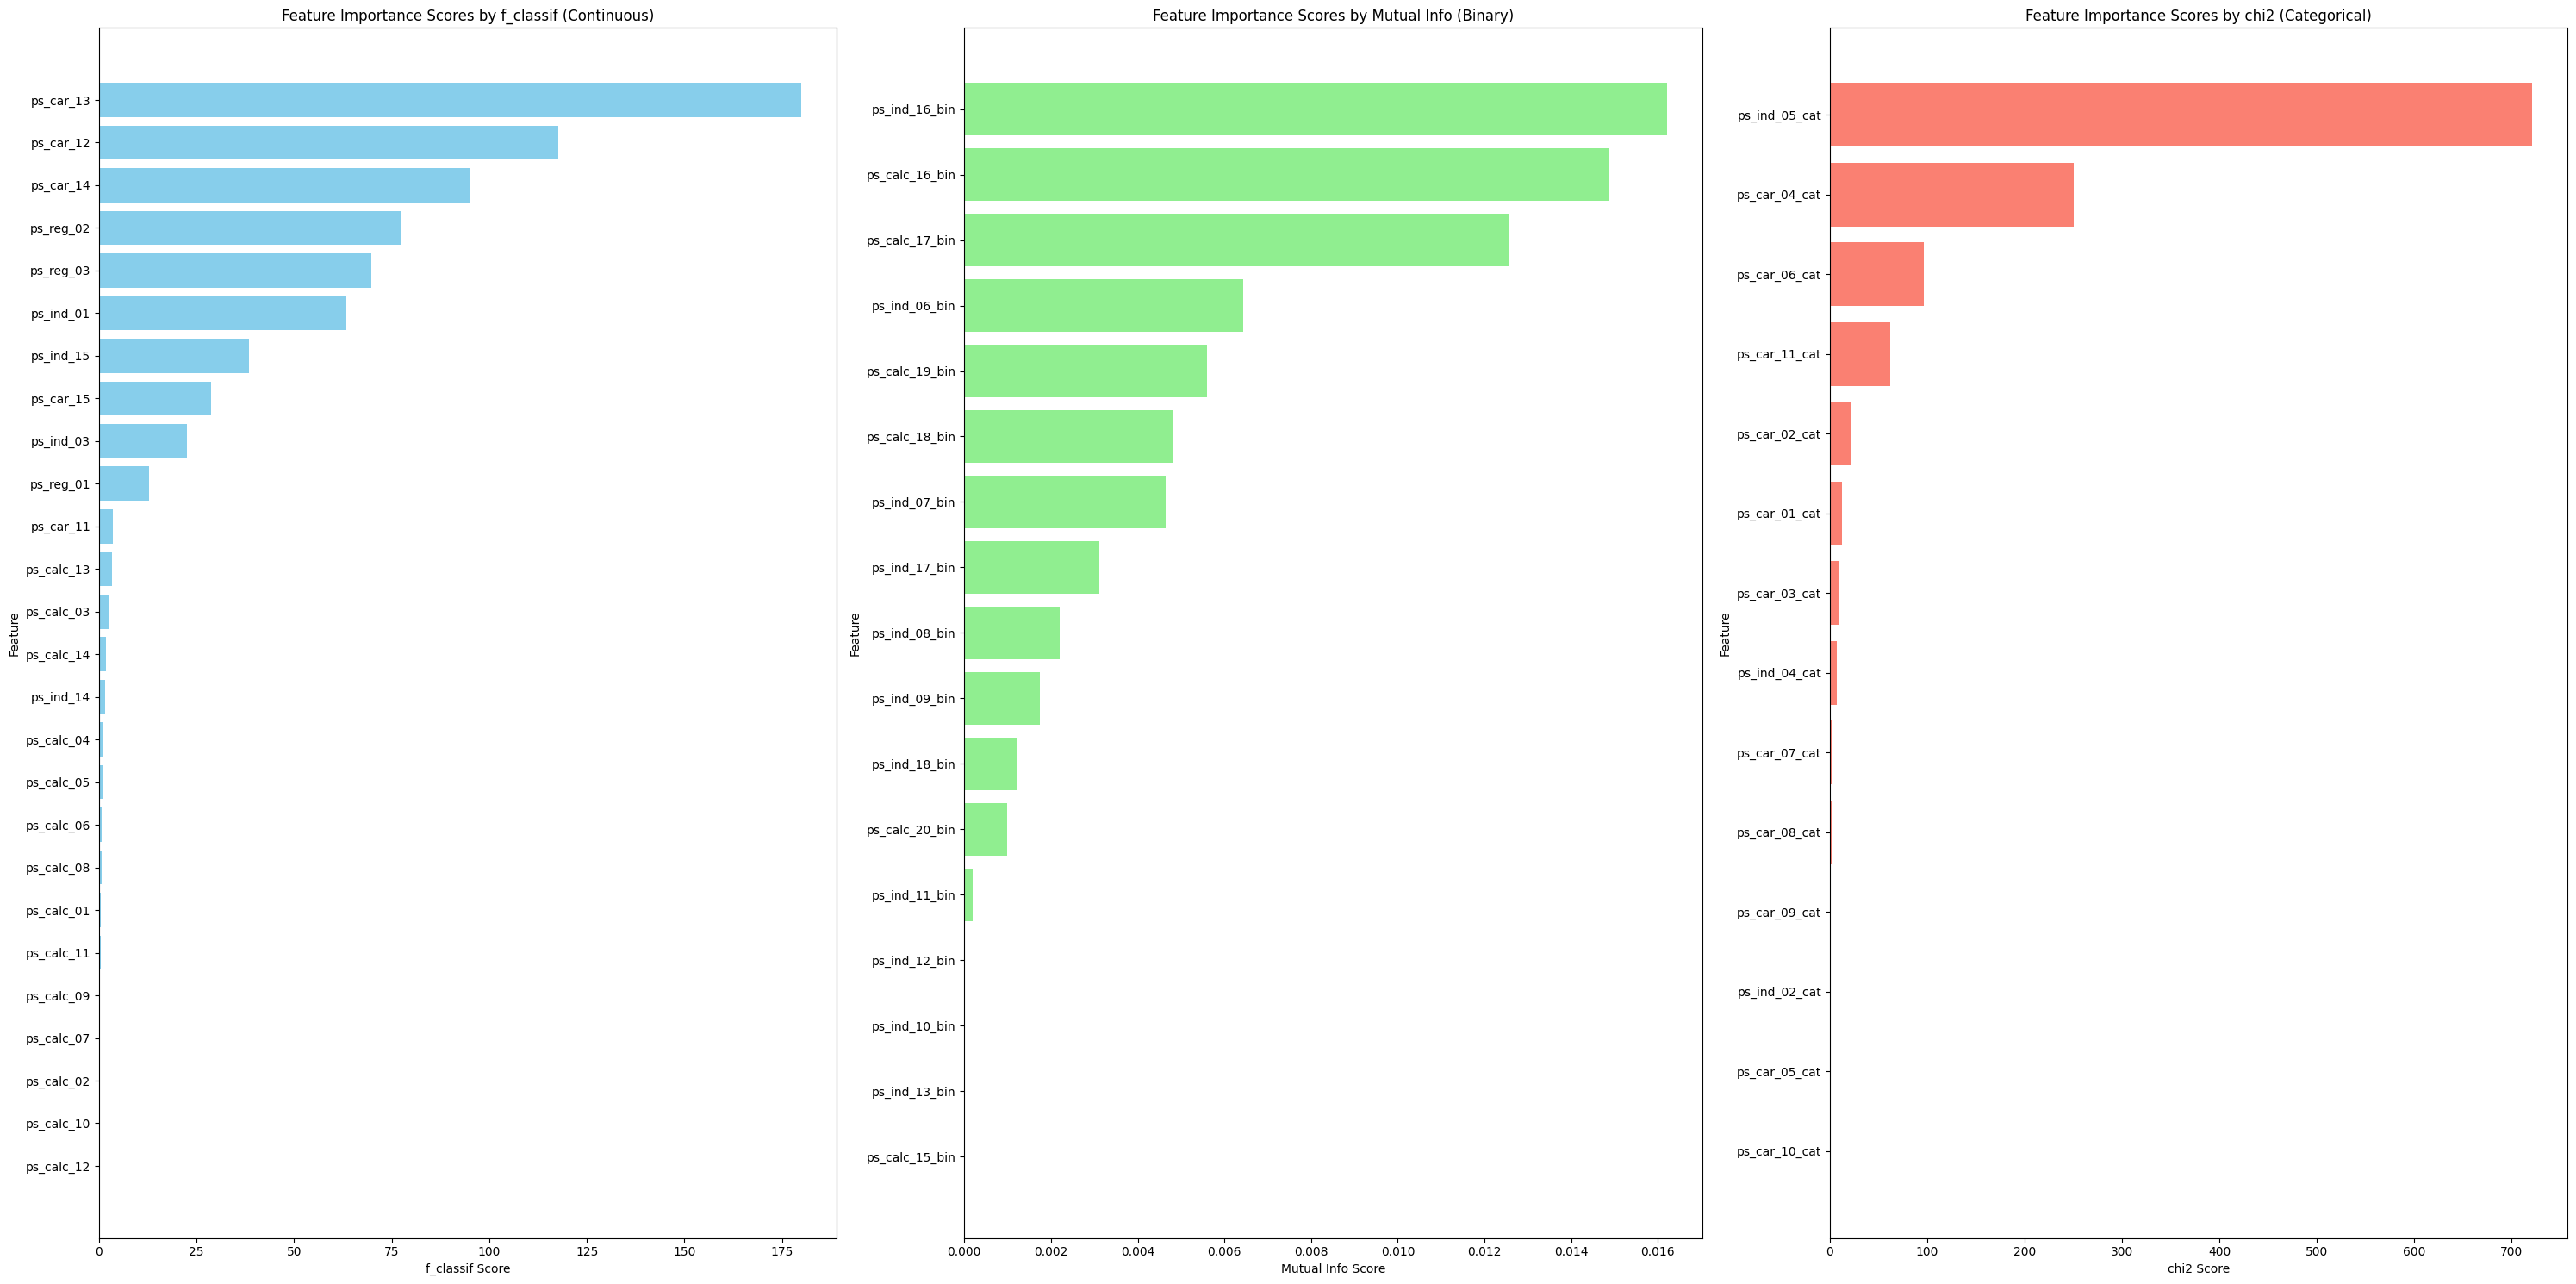

In [ ]:
import matplotlib.pyplot as plt

feature_importance_f_classif_filtered = feature_importance_f_classif[feature_importance_f_classif['Feature'].isin(continuous_cols)]
feature_importance_mutual_info_filtered = feature_importance_mutual_info[feature_importance_mutual_info['Feature'].isin(binary_cols)]
feature_importance_chi2_filtered = feature_importance_chi2[feature_importance_chi2['Feature'].isin(categorical_cols)]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 15))

# Subplot for f_classif (Continuous Features)
axes[0].barh(feature_importance_f_classif_filtered['Feature'], feature_importance_f_classif_filtered['f_classif Score'], color='skyblue')
axes[0].set_xlabel('f_classif Score')
axes[0].set_ylabel('Feature')
axes[0].set_title('Feature Importance Scores by f_classif (Continuous)')
axes[0].invert_yaxis()

# Subplot for Mutual Info (Binary Features)
axes[1].barh(feature_importance_mutual_info_filtered['Feature'], feature_importance_mutual_info_filtered['Mutual Info Score'], color='lightgreen')
axes[1].set_xlabel('Mutual Info Score')
axes[1].set_ylabel('Feature')
axes[1].set_title('Feature Importance Scores by Mutual Info (Binary)')
axes[1].invert_yaxis()

# Subplot for chi2 (Categorical Features)
axes[2].barh(feature_importance_chi2_filtered['Feature'], feature_importance_chi2_filtered['chi2 Score'], color='salmon')
axes[2].set_xlabel('chi2 Score')
axes[2].set_ylabel('Feature')
axes[2].set_title('Feature Importance Scores by chi2 (Categorical)')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()


### ExtraTreesClassifier

### Variance Selection

### embedded method

### Wrapper methods

Forward Selection

In [35]:
pipeline_RF_3.fit(X_train, y_train)
transformed_feature_names = pipeline_RF_3.named_steps['preprocessor'].get_feature_names_out()


In [ ]:
from sklearn.metrics import roc_auc_score
from joblib import Parallel, delayed

# Transform the data once outside the loop
X_train_transformed = pipeline_RF_3.named_steps['preprocessor'].transform(X_train)
X_val_transformed = pipeline_RF_3.named_steps['preprocessor'].transform(X_val)

def evaluate_feature(feature, selected_features, X_train_transformed, X_val_transformed, y_train, y_val):
    candidate_features = selected_features + [feature]
    candidate_indices = [i for i, col in enumerate(transformed_feature_names) if col in candidate_features]

    X_train_subset = X_train_transformed[:, candidate_indices]
    X_val_subset = X_val_transformed[:, candidate_indices]

    pipeline_RF_3.named_steps['classifier'].fit(X_train_subset, y_train)
    y_val_pred = pipeline_RF_3.named_steps['classifier'].predict_proba(X_val_subset)[:, 1]

    roc_auc = roc_auc_score(y_val, y_val_pred)

    return roc_auc, feature

selected_features = []
remaining_features = list(transformed_feature_names)
best_roc_auc = 0
history = []

while remaining_features:
    # Evaluate multiple features in parallel
    results = Parallel(n_jobs=-1)(
        delayed(evaluate_feature)(feature, selected_features, X_train_transformed, X_val_transformed, y_train, y_val)
        for feature in remaining_features
    )

    if results:
        results.sort(reverse=True, key=lambda x: x[0])
        best_feature = results[0][1]
        best_roc_auc_candidate = results[0][0]

        if best_roc_auc_candidate > best_roc_auc:
            best_roc_auc = best_roc_auc_candidate
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)

            history.append((list(selected_features), best_roc_auc))

            print(f"Selected Feature: {best_feature}, ROC AUC: {best_roc_auc}")
        else:
            break
    else:
        print("No valid feature found in this iteration.")
        break

print(f"Final selected features: {selected_features}")


Selected Feature: cont__ps_car_13, ROC AUC: 0.56455301456666
Selected Feature: bin__ps_ind_06_bin, ROC AUC: 0.5727825972467112
Selected Feature: bin__ps_ind_09_bin, ROC AUC: 0.585857680234982
Selected Feature: cat__2, ROC AUC: 0.5915556415221745
Selected Feature: cont__ps_ind_03, ROC AUC: 0.6030285533734561
Selected Feature: bin__ps_ind_17_bin, ROC AUC: 0.6126805014581362
Selected Feature: cont__ps_ind_15, ROC AUC: 0.6199214315568611
Selected Feature: cat__12, ROC AUC: 0.6238959291378356
Final selected features: ['cont__ps_car_13', 'bin__ps_ind_06_bin', 'bin__ps_ind_09_bin', 'cat__2', 'cont__ps_ind_03', 'bin__ps_ind_17_bin', 'cont__ps_ind_15', 'cat__12']


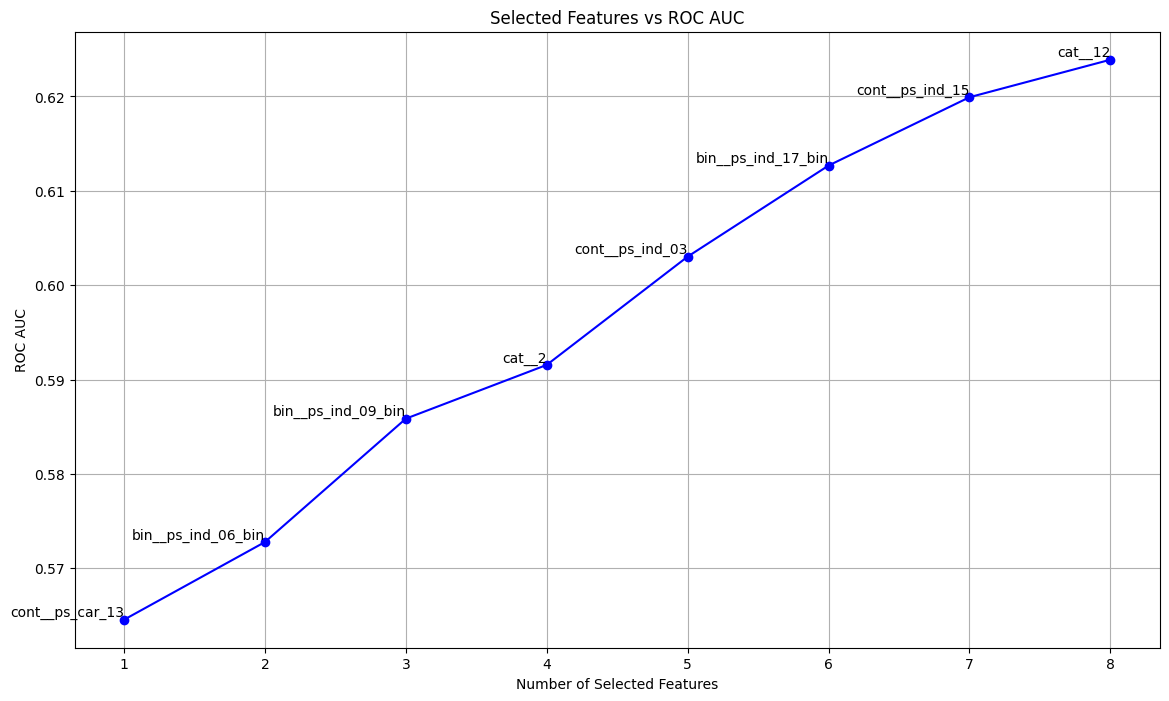

In [ ]:
feature_history, roc_auc_history = zip(*history)

plt.figure(figsize=(14, 8))
plt.plot(range(1, len(feature_history) + 1), roc_auc_history, marker='o', linestyle='-', color='b')
plt.title('Selected Features vs ROC AUC')
plt.xlabel('Number of Selected Features')
plt.ylabel('ROC AUC')
plt.grid(True)

for i, (features, roc_auc) in enumerate(zip(feature_history, roc_auc_history), start=1):
    plt.text(i, roc_auc, f"{features[-1]}", fontsize=10, ha='right', va='bottom')

plt.xticks(ticks=range(1, len(feature_history) + 1), labels=[str(len(f)) for f in feature_history])

plt.show()


Backward Selection

In [ ]:
from sklearn.metrics import roc_auc_score
from joblib import Parallel, delayed

X_train_transformed = pipeline_RF_3.named_steps['preprocessor'].transform(X_train)
X_val_transformed = pipeline_RF_3.named_steps['preprocessor'].transform(X_val)

def evaluate_feature_removal(feature_to_remove, current_features, X_train_transformed, X_val_transformed, y_train, y_val):
    candidate_features = [f for f in current_features if f != feature_to_remove]
    candidate_indices = [i for i, col in enumerate(transformed_feature_names) if col in candidate_features]

    X_train_subset = X_train_transformed[:, candidate_indices]
    X_val_subset = X_val_transformed[:, candidate_indices]

    pipeline_RF_3.named_steps['classifier'].fit(X_train_subset, y_train)
    y_val_pred = pipeline_RF_3.named_steps['classifier'].predict_proba(X_val_subset)[:, 1]

    roc_auc = roc_auc_score(y_val, y_val_pred)

    return roc_auc, feature_to_remove

selected_features = list(transformed_feature_names)
best_roc_auc = 0
history = []

X_train_subset = X_train_transformed[:, :]
X_val_subset = X_val_transformed[:, :]

pipeline_RF_3.named_steps['classifier'].fit(X_train_subset, y_train)
y_val_pred = pipeline_RF_3.named_steps['classifier'].predict_proba(X_val_subset)[:, 1]

best_roc_auc = roc_auc_score(y_val, y_val_pred)
history.append((list(selected_features), best_roc_auc))
print(f"Initial ROC AUC with all features: {best_roc_auc}")

while len(selected_features) > 1:
    results = Parallel(n_jobs=-1)(
        delayed(evaluate_feature_removal)(feature, selected_features, X_train_transformed, X_val_transformed, y_train, y_val)
        for feature in selected_features
    )

    if results:
        results.sort(reverse=True, key=lambda x: x[0])
        worst_feature_to_remove = results[-1][1]
        best_roc_auc_candidate = results[-1][0]

        if best_roc_auc_candidate >= best_roc_auc:
            best_roc_auc = best_roc_auc_candidate
            selected_features.remove(worst_feature_to_remove)

            history.append((list(selected_features), best_roc_auc))

            print(f"Removed Feature: {worst_feature_to_remove}, ROC AUC: {best_roc_auc}")
        else:
            break
    else:
        print("No valid feature removal found in this iteration.")
        break

print(f"Final selected features after backward selection: {selected_features}")


Initial ROC AUC with all features: 0.6096050981734704
Final selected features after backward selection: ['cat__0', 'cat__1', 'cat__2', 'cat__3', 'cat__4', 'cat__5', 'cat__6', 'cat__7', 'cat__8', 'cat__9', 'cat__10', 'cat__11', 'cat__12', 'cat__13', 'bin__ps_ind_06_bin', 'bin__ps_ind_07_bin', 'bin__ps_ind_08_bin', 'bin__ps_ind_09_bin', 'bin__ps_ind_10_bin', 'bin__ps_ind_11_bin', 'bin__ps_ind_12_bin', 'bin__ps_ind_13_bin', 'bin__ps_ind_16_bin', 'bin__ps_ind_17_bin', 'bin__ps_ind_18_bin', 'bin__ps_calc_15_bin', 'bin__ps_calc_16_bin', 'bin__ps_calc_17_bin', 'bin__ps_calc_18_bin', 'bin__ps_calc_19_bin', 'bin__ps_calc_20_bin', 'cont__ps_ind_01', 'cont__ps_ind_03', 'cont__ps_ind_14', 'cont__ps_ind_15', 'cont__ps_reg_01', 'cont__ps_reg_02', 'cont__ps_reg_03', 'cont__ps_car_11', 'cont__ps_car_12', 'cont__ps_car_13', 'cont__ps_car_14', 'cont__ps_car_15', 'cont__ps_calc_01', 'cont__ps_calc_02', 'cont__ps_calc_03', 'cont__ps_calc_04', 'cont__ps_calc_05', 'cont__ps_calc_06', 'cont__ps_calc_07', 'co

Mögliches lokales Minimum

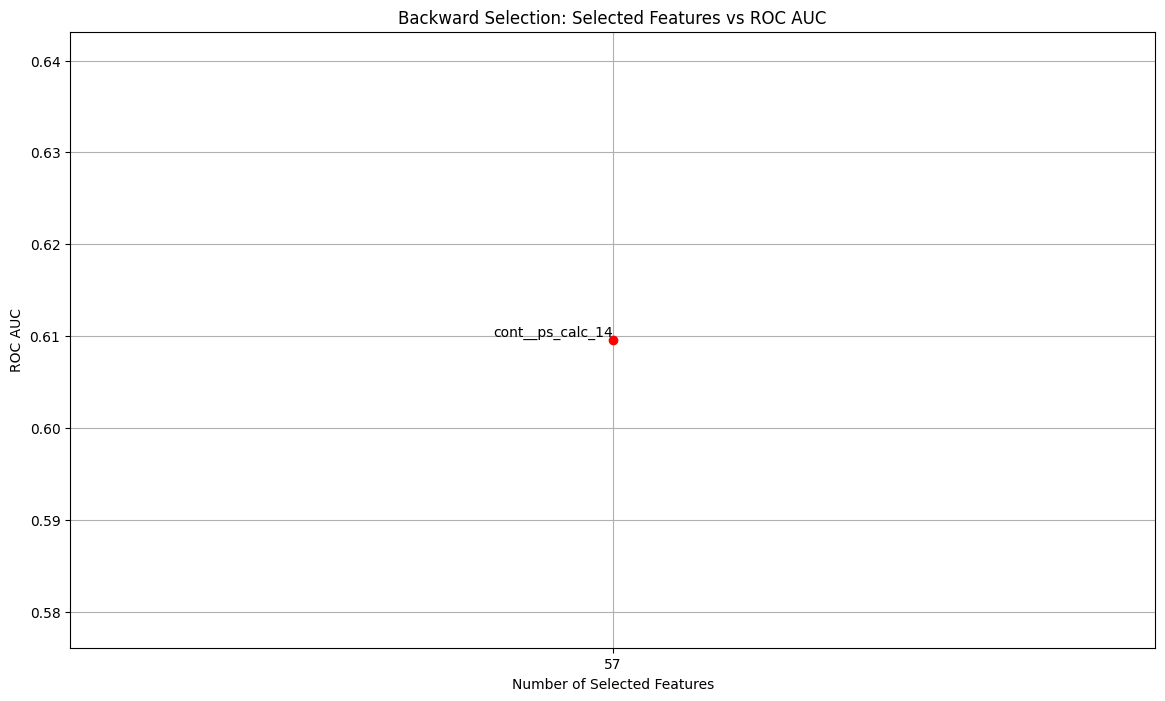

In [ ]:
backward_feature_history, backward_roc_auc_history = zip(*history)

# Create a plot for backward selection
plt.figure(figsize=(14, 8))
plt.plot(range(1, len(backward_feature_history) + 1), backward_roc_auc_history, marker='o', linestyle='-', color='r')
plt.title('Backward Selection: Selected Features vs ROC AUC')
plt.xlabel('Number of Selected Features')
plt.ylabel('ROC AUC')
plt.grid(True)

# Annotate the plot with the feature names
for i, (features, roc_auc) in enumerate(zip(backward_feature_history, backward_roc_auc_history), start=1):
    plt.text(i, roc_auc, f"{features[-1]}", fontsize=10, ha='right', va='bottom')

# Customize x-axis labels to show the count of selected features
plt.xticks(ticks=range(1, len(backward_feature_history) + 1), labels=[str(len(f)) for f in backward_feature_history])

plt.show()

Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score

X_train_transformed = pipeline_RF_3.named_steps['preprocessor'].transform(X_train)
X_val_transformed = pipeline_RF_3.named_steps['preprocessor'].transform(X_val)

classifier = pipeline_RF_3.named_steps['classifier']

# Perform Recursive Feature Elimination
rfe = RFE(estimator=classifier, n_features_to_select=1, step=1)
rfe.fit(X_train_transformed, y_train)

history = []
selected_features = transformed_feature_names

for i in range(len(selected_features), 1, -1):  # Start the loop from len(selected_features) to 1 (not 0)
    selected = [f for f, support in zip(selected_features, rfe.support_) if support]
    selected_indices = [i for i, col in enumerate(transformed_feature_names) if col in selected]

    X_train_subset = X_train_transformed[:, selected_indices]
    X_val_subset = X_val_transformed[:, selected_indices]

    classifier.fit(X_train_subset, y_train)
    y_val_pred = classifier.predict_proba(X_val_subset)[:, 1]

    roc_auc = roc_auc_score(y_val, y_val_pred)

    history.append((list(selected), roc_auc))

    print(f"Iteration {len(selected_features) - i + 1}: Selected Features: {len(selected)}, ROC AUC: {roc_auc:.4f}")

    if i > 1:
        rfe = RFE(estimator=classifier, n_features_to_select=i-1, step=1)
        rfe.fit(X_train_transformed, y_train)

final_selected_features = history[-1][0]
print(f"Final selected features after RFE: {final_selected_features}")

Iteration 1: Selected Features: 1, ROC AUC: 0.5646
Iteration 2: Selected Features: 56, ROC AUC: 0.6096
Iteration 3: Selected Features: 55, ROC AUC: 0.6049
Iteration 4: Selected Features: 54, ROC AUC: 0.6086
Iteration 5: Selected Features: 53, ROC AUC: 0.6052
Iteration 6: Selected Features: 52, ROC AUC: 0.6117
Iteration 7: Selected Features: 51, ROC AUC: 0.6171
Iteration 8: Selected Features: 50, ROC AUC: 0.6025
Iteration 9: Selected Features: 49, ROC AUC: 0.6032
Iteration 10: Selected Features: 48, ROC AUC: 0.6063
Iteration 11: Selected Features: 47, ROC AUC: 0.6085
Iteration 12: Selected Features: 46, ROC AUC: 0.6079
Iteration 13: Selected Features: 45, ROC AUC: 0.6066
Iteration 14: Selected Features: 44, ROC AUC: 0.6086
Iteration 15: Selected Features: 43, ROC AUC: 0.6031
Iteration 16: Selected Features: 42, ROC AUC: 0.6074
Iteration 17: Selected Features: 41, ROC AUC: 0.5987
Iteration 18: Selected Features: 40, ROC AUC: 0.6043
Iteration 19: Selected Features: 39, ROC AUC: 0.6001
Ite

InvalidParameterError: The 'n_features_to_select' parameter of RFE must be None, a float in the range (0.0, 1.0] or an int in the range (0, inf). Got 0 instead.

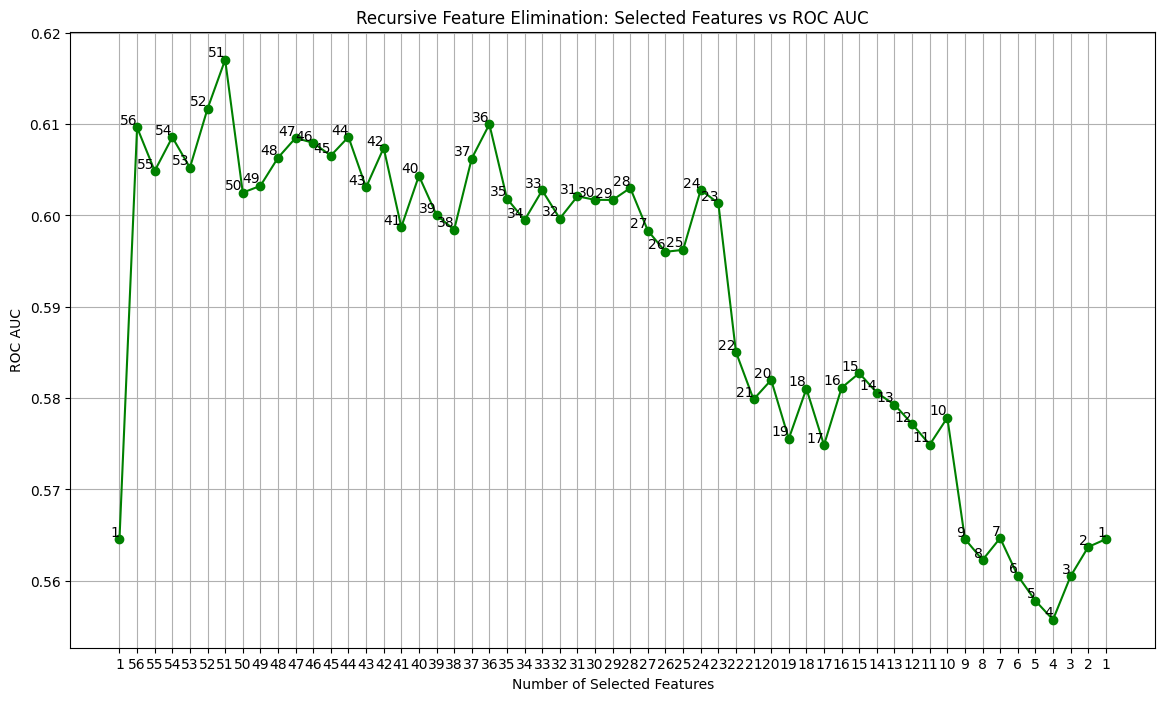

In [ ]:
history_df = pd.DataFrame(history, columns=['Selected Features', 'ROC AUC'])

plt.figure(figsize=(14, 8))
plt.plot(range(1, len(history_df) + 1), history_df['ROC AUC'], marker='o', linestyle='-', color='g')
plt.title('Recursive Feature Elimination: Selected Features vs ROC AUC')
plt.xlabel('Number of Selected Features')
plt.ylabel('ROC AUC')
plt.grid(True)

for i, (features, roc_auc) in enumerate(history, start=1):
    plt.text(i, roc_auc, f"{len(features)}", fontsize=10, ha='right', va='bottom')

plt.xticks(ticks=range(1, len(history_df) + 1), labels=[str(len(f)) for f in history_df['Selected Features']])

plt.show()

    Forward selection is often better at finding combinations of features that work well together, as it optimizes step-by-step, while RFE might retain or eliminate features based on their standalone importance, possibly missing critical interactions.

Exhaustive Feature Search

In [37]:
from sklearn.metrics import roc_auc_score
from itertools import combinations
from joblib import Parallel, delayed
import pandas as pd

X_train_transformed = pipeline_RF_3.named_steps['preprocessor'].transform(X_train)
X_val_transformed = pipeline_RF_3.named_steps['preprocessor'].transform(X_val)

classifier = pipeline_RF_3.named_steps['classifier']

history = []

def evaluate_combination(combo):
    """Evaluate a single combination of features."""
    selected_indices = [i for i, col in enumerate(transformed_feature_names) if col in combo]

    X_train_subset = X_train_transformed[:, selected_indices]
    X_val_subset = X_val_transformed[:, selected_indices]

    classifier.fit(X_train_subset, y_train)
    y_val_pred = classifier.predict_proba(X_val_subset)[:, 1]

    roc_auc = roc_auc_score(y_val, y_val_pred)

    print(f"Evaluating combination: {combo}, ROC AUC: {roc_auc:.4f}")

    return list(combo), roc_auc

for n_features in range(1, len(transformed_feature_names) + 1):
    combos = list(combinations(transformed_feature_names, n_features))

    results = Parallel(n_jobs=-1)(delayed(evaluate_combination)(combo) for combo in combos)

    history.extend(results)

    best_for_size = max(results, key=lambda x: x[1])
    print(f"Best combination for {n_features} features: {best_for_size[0]}, ROC AUC: {best_for_size[1]:.4f}")

    print(f"Finished evaluating all {n_features}-feature combinations.")

# Convert the history to a DataFrame for easier analysis
history_df = pd.DataFrame(history, columns=['Selected Features', 'ROC AUC'])

# Identify the overall best combination of features
best_combination = history_df.loc[history_df['ROC AUC'].idxmax()]

# Print the overall best combination and its ROC AUC
print(f"Best Feature Combination: {best_combination['Selected Features']}, ROC AUC: {best_combination['ROC AUC']:.4f}")


Best combination for 1 features: ['cont__ps_car_13'], ROC AUC: 0.5646
Finished evaluating all 1-feature combinations.
Best combination for 2 features: ['bin__ps_ind_17_bin', 'cont__ps_car_12'], ROC AUC: 0.5845
Finished evaluating all 2-feature combinations.


KeyboardInterrupt: 

Exhaustive Feature Search nicht sinvoll ==> 144 quadrillion Kombinationen

## Optimization for imbalanced data

### SMOTE: Synthetic Minority Over-sampling

first One Hot Encode

In [46]:
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Transform X_train
X_train_encoded = column_transformer.fit_transform(X_train)

In [47]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train_encoded, y_train)

In [48]:
from collections import Counter
print(f"Original y_train class distribution: {Counter(y_train)}")
print(f"Resampled y_train_res class distribution: {Counter(y_train_res)}")


Original y_train class distribution: Counter({0: 83508, 1: 3947})
Resampled y_train_res class distribution: Counter({0: 83508, 1: 83508})


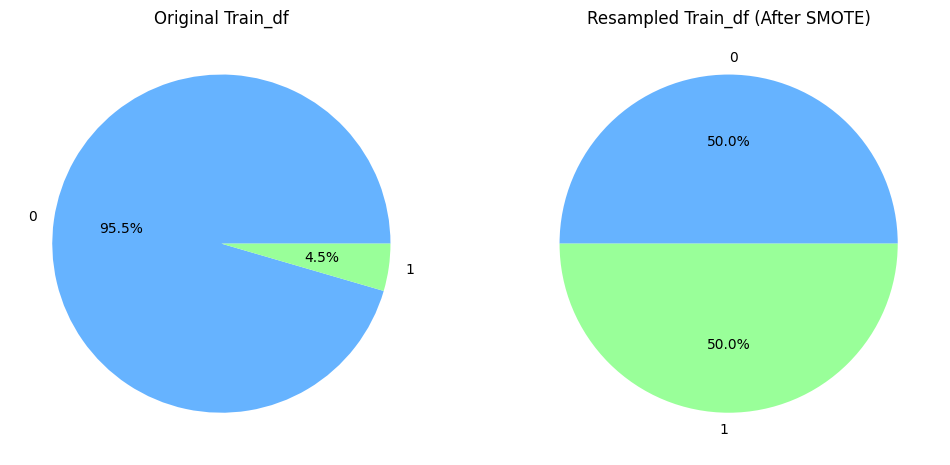

In [49]:
train_target_dist = pd.Series(Counter(y_train))
train_res_target_dist = pd.Series(Counter(y_train_res))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the distribution before SMOTE
axs[0].pie(train_target_dist, labels=train_target_dist.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
axs[0].set_title('Original Train_df')

# Plot the distribution after SMOTE
axs[1].pie(train_res_target_dist, labels=train_res_target_dist.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
axs[1].set_title('Resampled Train_df (After SMOTE)')

plt.show()

In [53]:
from imblearn.pipeline import Pipeline

pipeline_RF_SMOTE = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=4,
        max_features='sqrt',
        random_state=42
    ))
])

pipeline_RF_SMOTE

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ps_ind_02_cat',
                                                   'ps_ind_04_cat',
                                                   'ps_ind_05_cat',
                                                   'ps_car_01_cat',
                                                   'ps_car_02_cat',
                                                   'ps_car_03_cat',
                                                   'ps_car_04_cat',
                                                   'ps_car_05_cat',
                                                   'ps_car_06_cat',
                                                   'ps_car_07_cat',
                                                   'ps_car_08_cat',
                                                   'ps_car_09_cat',
                                                   'ps_car_10_cat',
                                                   'ps_car_11_cat']),
                                                 ('bin', 'passt...
                                                   'ps_car_14', 'ps_car_15',
                                                   'ps_calc_01', 'ps_calc_02',
                                                   'ps_calc_03', 'ps_calc_04',
                                                   'ps_calc_05', 'ps_calc_06',
                                                   'ps_calc_07', 'ps_calc_08',
                                                   'ps_calc_09', 'ps_calc_10',
                                                   'ps_calc_11', 'ps_calc_12',
                                                   'ps_calc_13',
                                                   'ps_calc_14'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=4,
                                        min_samples_split=10,
                                        random_state=42))])

In [54]:
pipeline_RF_SMOTE.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ps_ind_02_cat',
                                                   'ps_ind_04_cat',
                                                   'ps_ind_05_cat',
                                                   'ps_car_01_cat',
                                                   'ps_car_02_cat',
                                                   'ps_car_03_cat',
                                                   'ps_car_04_cat',
                                                   'ps_car_05_cat',
                                                   'ps_car_06_cat',
                                                   'ps_car_07_cat',
                                                   'ps_car_08_cat',
                                                   'ps_car_09_cat',
                                                   'ps_car_10_cat',
                                                   'ps_car_11_cat']),
                                                 ('bin', 'passt...
                                                   'ps_car_14', 'ps_car_15',
                                                   'ps_calc_01', 'ps_calc_02',
                                                   'ps_calc_03', 'ps_calc_04',
                                                   'ps_calc_05', 'ps_calc_06',
                                                   'ps_calc_07', 'ps_calc_08',
                                                   'ps_calc_09', 'ps_calc_10',
                                                   'ps_calc_11', 'ps_calc_12',
                                                   'ps_calc_13',
                                                   'ps_calc_14'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=4,
                                        min_samples_split=10,
                                        random_state=42))])

In [55]:
y_pred_RF = pipeline_RF_SMOTE.predict(X_val)
y_prob_RF = pipeline_RF_SMOTE.predict_proba(X_val)[:, 1]

accuracy_RF = accuracy_score(y_val, y_pred_RF)
roc_auc_RF = roc_auc_score(y_val, y_prob_RF)
precision_RF, recall_RF, _ = precision_recall_curve(y_val, y_prob_RF)
pr_auc_RF = auc(recall_RF, precision_RF)
conf_matrix_RF = confusion_matrix(y_val, y_pred_RF)
report_RF = classification_report(y_val, y_pred_RF)

print("Random Forest Model:")
print("Accuracy:", accuracy_RF)
print("ROC AUC:", roc_auc_RF)
print("PR AUC:", pr_auc_RF)
print("Confusion Matrix:\n", conf_matrix_RF)
print("Classification Report:\n", report_RF)

Random Forest Model:
Accuracy: 0.9541172734970365
ROC AUC: 0.5930367826279637
PR AUC: 0.0621405200686886
Confusion Matrix:
 [[18027    25]
 [  842     2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     18052
           1       0.07      0.00      0.00       844

    accuracy                           0.95     18896
   macro avg       0.51      0.50      0.49     18896
weighted avg       0.92      0.95      0.93     18896



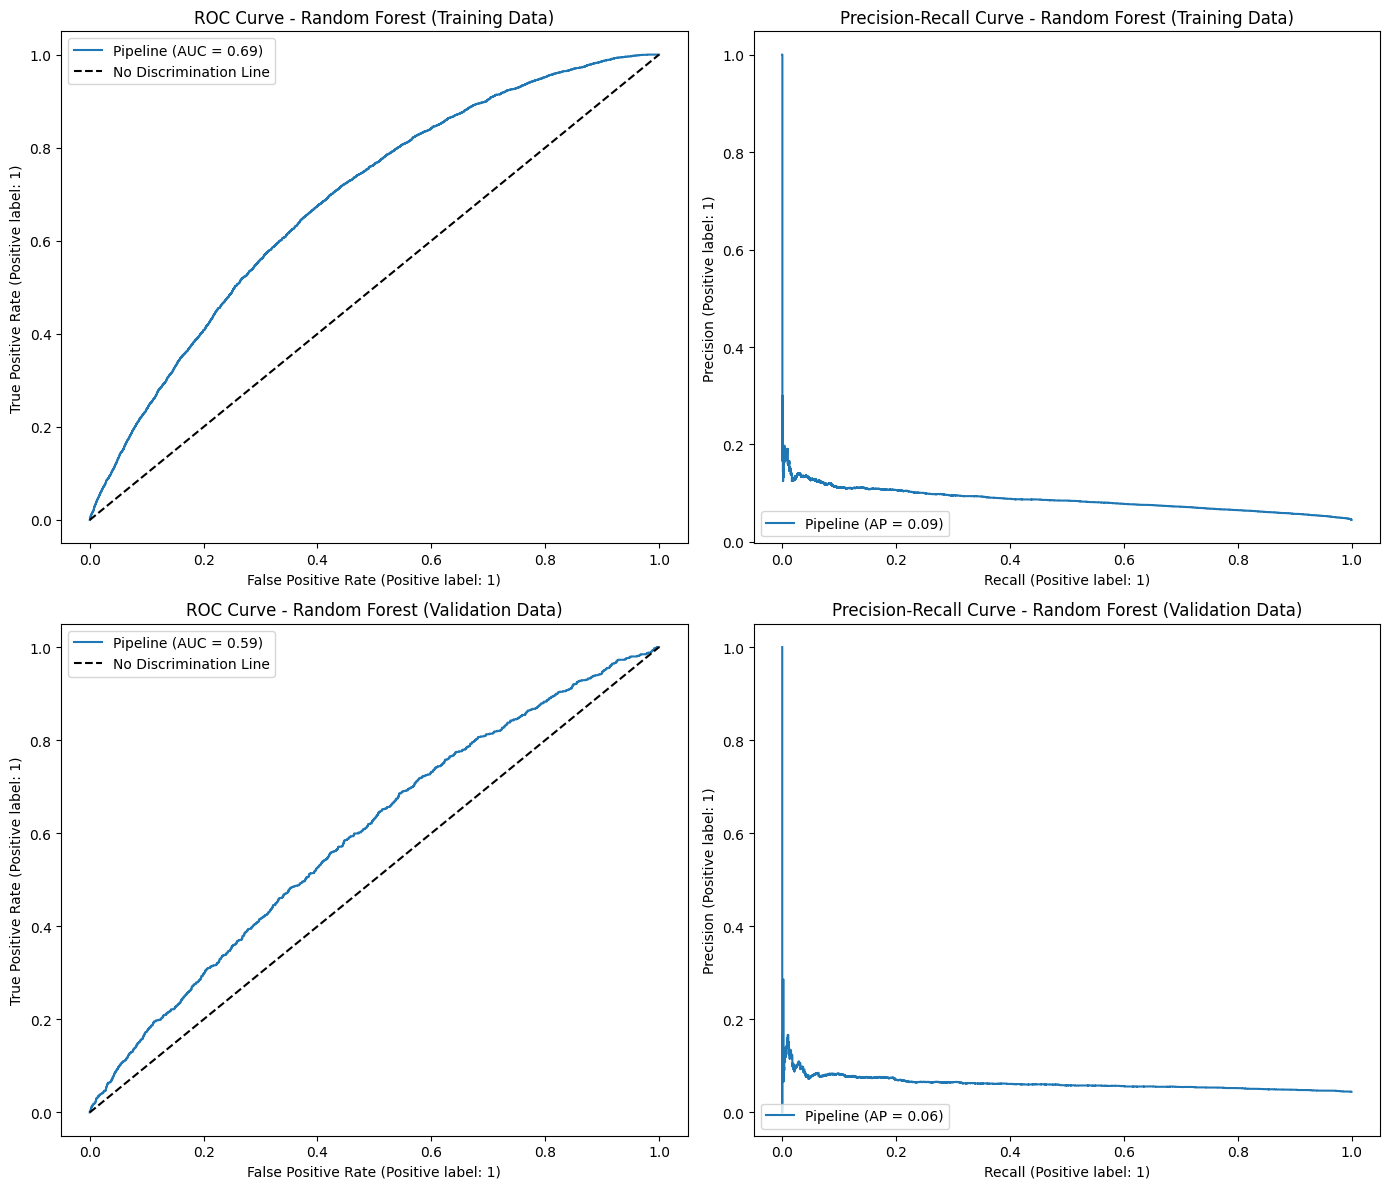

In [57]:
fig, ((ax5, ax6), (ax7, ax8)) = plt.subplots(2, 2, figsize=(14, 12))

RocCurveDisplay.from_estimator(pipeline_RF_SMOTE, X_train, y_train, ax=ax5)
ax5.set_title("ROC Curve - Random Forest (Training Data)")
ax5.plot([0, 1], [0, 1], 'k--', label='No Discrimination Line')
ax5.legend()

PrecisionRecallDisplay.from_estimator(pipeline_RF_SMOTE, X_train, y_train, ax=ax6)
ax6.set_title("Precision-Recall Curve - Random Forest (Training Data)")

RocCurveDisplay.from_estimator(pipeline_RF_SMOTE, X_val, y_val, ax=ax7)
ax7.set_title("ROC Curve - Random Forest (Validation Data)")
ax7.plot([0, 1], [0, 1], 'k--', label='No Discrimination Line')
ax7.legend()

PrecisionRecallDisplay.from_estimator(pipeline_RF_SMOTE, X_val, y_val, ax=ax8)
ax8.set_title("Precision-Recall Curve - Random Forest (Validation Data)")

plt.tight_layout()
plt.show()

Random Forest ist ein Ensemblemethode und daher Rebist gegen inbalanced Data. SMOTE bringt an der Stelle nicht viel Gewinn. Eher schlechter wegen syntetische Data

## Ergebnisse

## Ergebniss II